# Exploring larval _Drosophila_ anemotaxis behaviour from CHore program (MWT)
Written by Sharbatanu CHATTERJEE with help of notebooks written by Timothee SANCHEZ and from GitHub Copilot 2025 (Claude 3.5 Sonnet, Gemini 2.0 Flash, and GPT 4.0)

This notebook explores the larval _Drosophila_ behaviour. It is arranged in two parts -
- The first explores larval _Drosophila_ behavioural parameters recorded from the Chore (choreography) program from MWT (MultiWormTracker)

- The second part explores the same but using the `trx.mat` file generated by the Institut Pasteur analysis pipeline.

In [1]:
import os
import numpy as np
import pandas as pd
import h5py
from scipy import stats
from pprint import pprint
from matplotlib import cm 
import matplotlib.pyplot as plt 
import src.parse_data as anm_parse
import src.plot_data as anm_plot
from matplotlib import animation
plt.style.use('../anemotaxis.mplstyle')
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib.collections import LineCollection

In [2]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

# Part I : Analysing data generated by the Chore program (MWT)
These analyses are based on using the `.dat` files generated by the Chore program. To know how to use the Chore program, look at the documentation in the `eq-jovanic` directory.

In [3]:
# LOAD DATA
# Note : the column names should be known from the way it was generated from the Chore program (by the -o option)

data_folder = "/Users/sharbat/Projects/anemotaxis/data/20240219_140808/"
columns = ["time","id","persistence","speed","midline","loc_x","loc_y","vel_x","vel_y","orient","pathlen"]
# data_folder = "/Users/sharbat/Projects/20250409_162408/"
# columns = ["time","x", "y"]

larvae_data = anm_parse.extract_all_larvae(data_folder, columns)


/Users/sharbat/Projects/anemotaxis/src/parse_data.py:122: RuntimeWarning: Mean of empty slice
  "mean": np.nanmean(df[column]),  # Handle potential NaNs
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:123: RuntimeWarning: All-NaN axis encountered
  "max": np.nanmax(df[column]),
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:124: RuntimeWarning: All-NaN axis encountered
  "min": np.nanmin(df[column])
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:122: RuntimeWarning: Mean of empty slice
  "mean": np.nanmean(df[column]),  # Handle potential NaNs
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:123: RuntimeWarning: All-NaN axis encountered
  "max": np.nanmax(df[column]),
/Users/sharbat/Projects/anemotaxis/src/parse_data.py:124: RuntimeWarning: All-NaN axis encountered
  "min": np.nanmin(df[column])


In [4]:
# larva_id = 'test01'  # Example larva ID
larva_id = '30.00001'  # Example larva ID

# Accessing metadata, data, and summary for larva
pprint(larvae_data[larva_id]["metadata"])  # Experiment details
# pprint(larvae_data[larva_id]["summary"])   # Summary statistics
# pprint(larvae_data["30.00001"]["data"])     # Extracted raw data (commented out)


{'date': '20240219_140808',
 'effector': 'UAS_TNT_2_0003',
 'genotype': 'GMR_SS01948',
 'interval_between_repetitions': '0s',
 'number_of_repetitions': 1,
 'prestimulus_duration': '2s',
 'raw_protocol': 'p_5gradient2_2s1x600s0s#n#n#n',
 'stimulus_duration': '600s',
 'stimulus_specifications': '5gradient2',
 'stimulus_type': 'p',
 'tracker': 't7'}


## Single larva parameter plots

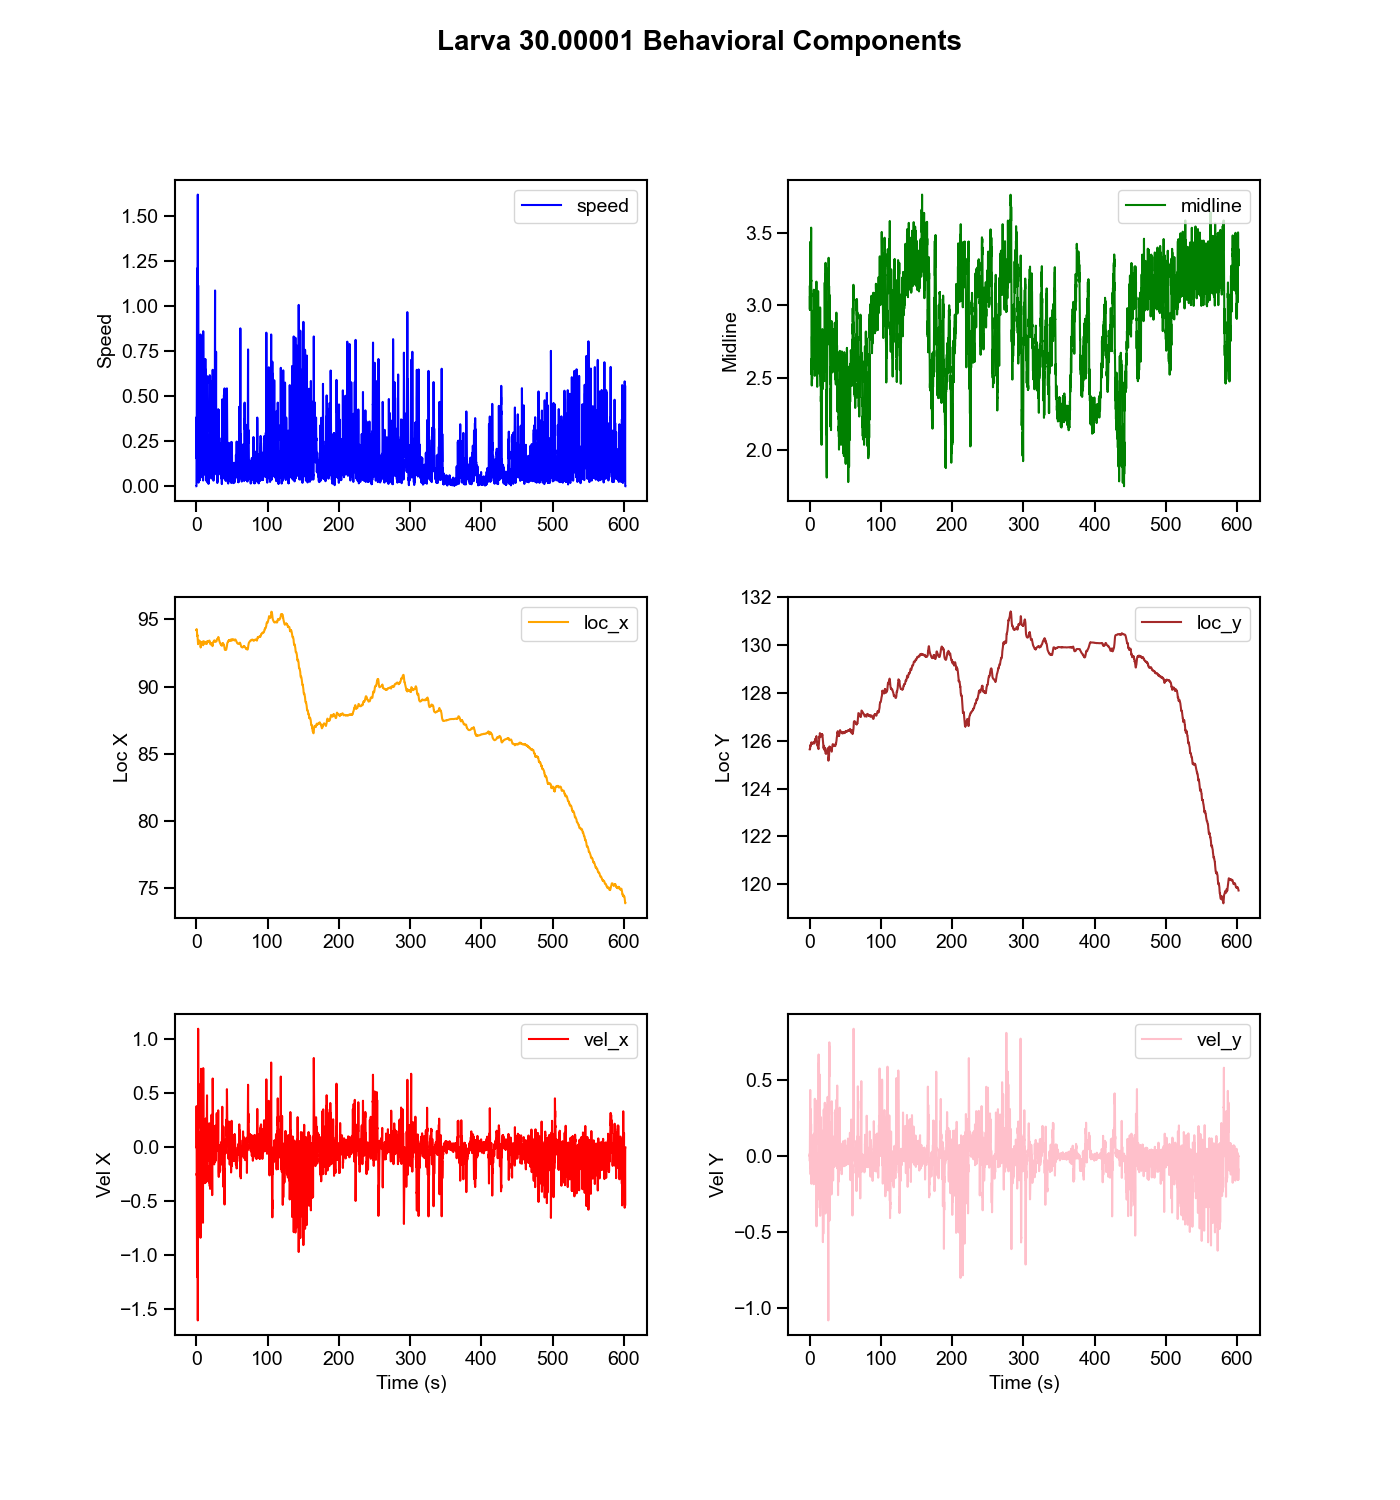

In [5]:
# # Plot specific columns
selected_columns = ["speed", "midline", "loc_x", "loc_y", "vel_x", "vel_y"]
data = larvae_data[larva_id]['data']
fig, axes = anm_plot.plot_larva_data(data=data, columns=selected_columns, larva_id=larva_id)

# # Plot all available columns
# fig, axes = anm_plot.plot_larva_data(larvae_data[larva_id]['data'], larva_id=larva_id)

plt.show()

## Single larva trajectory plots

FloatSlider(value=0.007, description='Time (s):', layout=Layout(width='1200px'), max=602.17, min=0.007, readou…

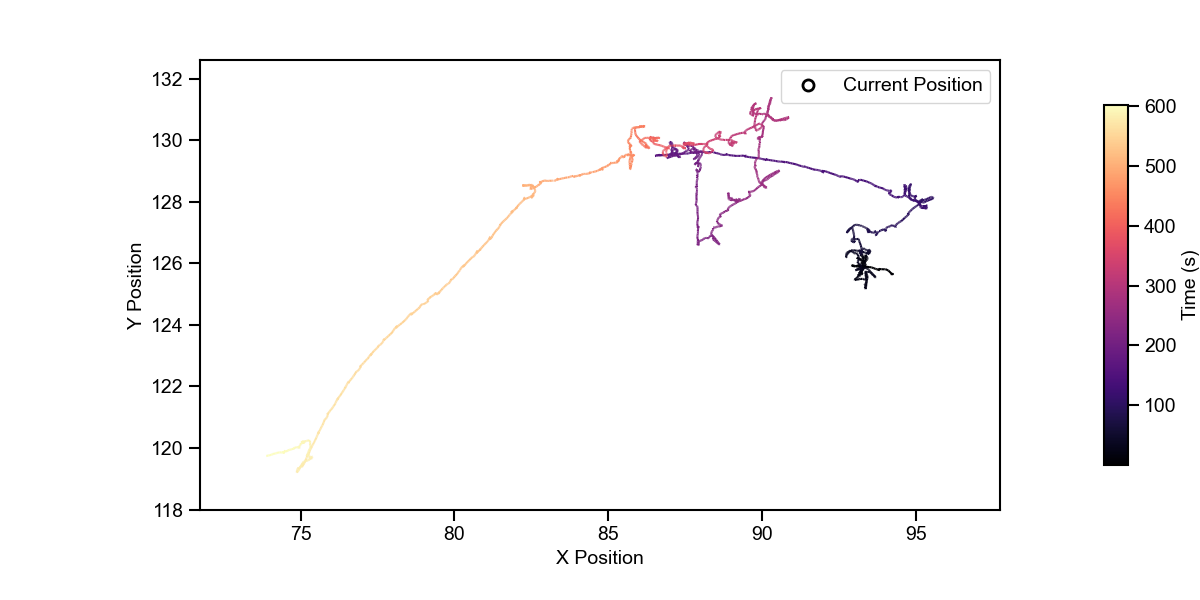

In [6]:
# Display interactive plot
anm_plot.plot_single_trajectory(larvae_data, larva_id)

## Multiple larva trajectory plots

In [25]:
# # Plot all larvae
# plot_multiple_trajectories(larvae_data)

# Plot specific larvae
selected_larvae = ['30.00001', '30.00002', '30.00003','30.00005']
anm_plot.plot_multiple_trajectories(larvae_data, larva_ids=selected_larvae)

Animation saved to trajectory_animation.mp4


## K-means clustering on PCA dimension-reduced behaviour data

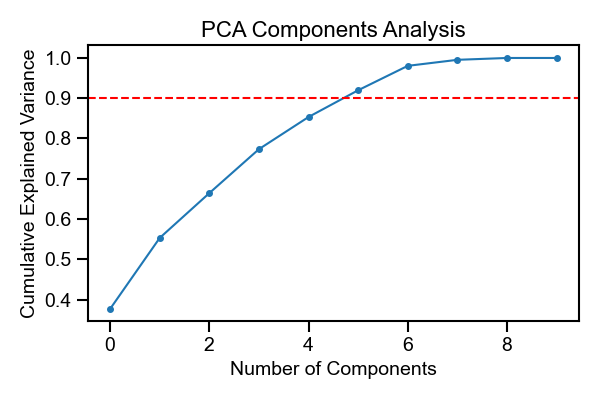

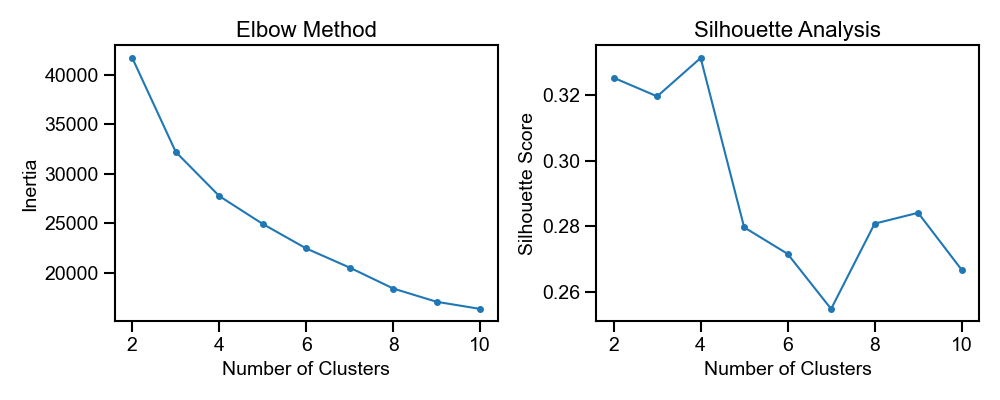

Optimal number of PCA components: 6
Optimal number of clusters: 4


In [8]:
clustered_data, optimal_components, optimal_clusters = anm_parse.cluster_behaviors(larvae_data[larva_id]["data"], variance_threshold=0.90, max_clusters=10)
print(f'Optimal number of PCA components: {optimal_components}')
print(f'Optimal number of clusters: {optimal_clusters}')

In [9]:
clustered_data

time  persistence  speed  midline   loc_x    loc_y  vel_x  vel_y  \
0       0.007        602.2  0.000    3.130  94.210  125.643  0.000  0.000   
1       0.062        602.2  0.000    3.088  94.219  125.655  0.000  0.000   
2       0.116        602.2  0.247    2.972  94.186  125.654  0.247  0.015   
3       0.171        602.2  0.384    3.032  94.252  125.649  0.382 -0.034   
4       0.226        602.2  0.231    2.972  94.262  125.647  0.229  0.028   
...       ...          ...    ...      ...     ...      ...    ...    ...   
7013  601.811        602.2  0.504    3.273  74.054  119.782 -0.478 -0.158   
7014  601.901        602.2  0.558    3.392  74.004  119.768 -0.539 -0.143   
7015  601.989        602.2  0.000    3.317  73.959  119.757  0.000  0.000   
7016  602.076        602.2  0.000    3.289  73.895  119.742  0.000  0.000   
7017  602.170        602.2  0.000    3.281  73.912  119.741  0.000  0.000   

      orient  pathlen  cluster     pca_1     pca_2     pca_3     pca_4  \
0      173.6    0.000        2  2.662935  0.445205 -0.180521 -0.829590   
1      173.2    0.000        2  2.686698  0.390985 -0.220193 -0.817779   
2      173.3    0.000        2  2.920024  0.569611  0.073767 -1.668280   
3      173.8    0.000        2  2.921890  0.872629  0.055262 -2.052598   
4      174.1    0.000        2  2.933485  0.547240  0.118974 -1.632565   
...      ...      ...      ...       ...       ...       ...       ...   
7013  -168.8   25.948        1 -5.066866  2.967738 -0.773049 -0.746400   
7014  -169.2   25.948        1 -5.150930  3.507885 -0.633360 -0.709129   
7015  -169.4   25.948        1 -4.706401 -0.574287  0.435362 -1.760770   
7016  -169.5   25.948        1 -4.699459 -0.609546  0.408290 -1.758904   
7017  -169.3   25.948        1 -4.693041 -0.619058  0.401188 -1.756587   

         pca_5     pca_6  
0     0.741830  1.661111  
1     0.687024  1.674863  
2     1.404118  1.089870  
3     2.157394  0.746921  
4     1.294696  1.129496  
...        ...       ...  
7013 -1.312138  0.690266  
7014 -1.427280  0.559032  
7015 -0.126019  1.274720  
7016 -0.164449  1.290958  
7017 -0.174233  1.295845  

[7018 rows x 17 columns]

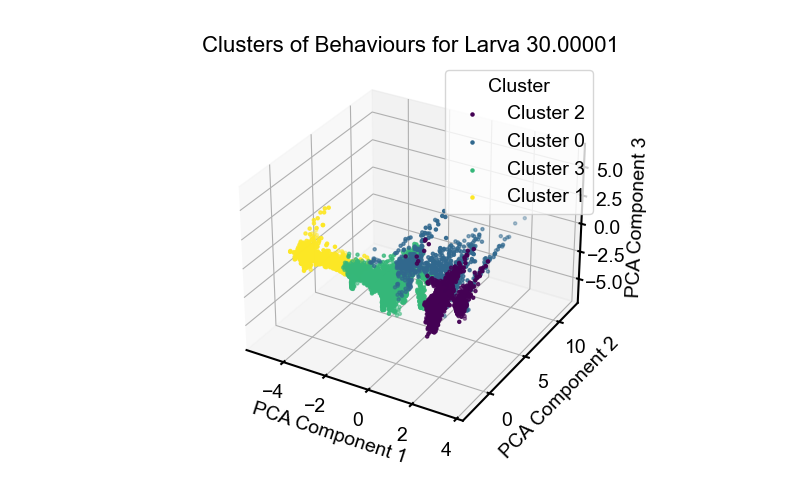

In [10]:
anm_plot.plot_clusters(clustered_data, larva_id, n_components=3)

FloatSlider(value=0.007, description='Time (s):', layout=Layout(width='1200px'), max=602.17, min=0.007, readou…

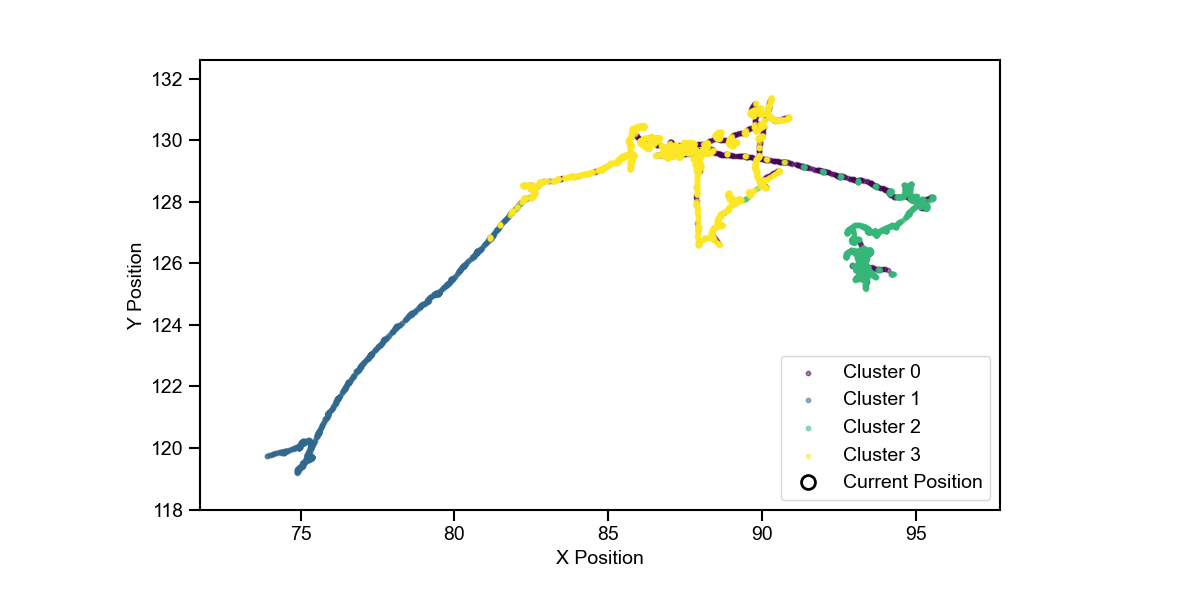

In [11]:
larva_id = '30.00001'
anm_plot.plot_trajectory_with_clusters(larvae_data[larva_id]["data"], clustered_data, larva_id)

## Calculation of $N_i$
Check the code in `parse_data.py` for calculation of $N_i$ along both X-axis and Y-axis

In [12]:
ni_dict_x = anm_parse.compute_navigational_index(larvae_data, ax="x")
ni_dict_y = anm_parse.compute_navigational_index(larvae_data, ax="y")
# for larva_id, ni in ni_dict_x.items():
#     print(f"Larva {larva_id} - Navigational Index: {ni['NI_mean']}, Normalized Navigational Index: {ni['NI_norm']}")

### Histogram mean X-axis and Y-axis $N_i$ across larvae

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:440: RuntimeWarning: Mean of empty slice
  ni_means_x = np.array([x for x in [np.nanmean(df["NI"]) for df in ni_dict_x.values()]
/Users/sharbat/Projects/anemotaxis/src/plot_data.py:442: RuntimeWarning: Mean of empty slice
  ni_means_y = np.array([y for y in [np.nanmean(df["NI"]) for df in ni_dict_y.values()]


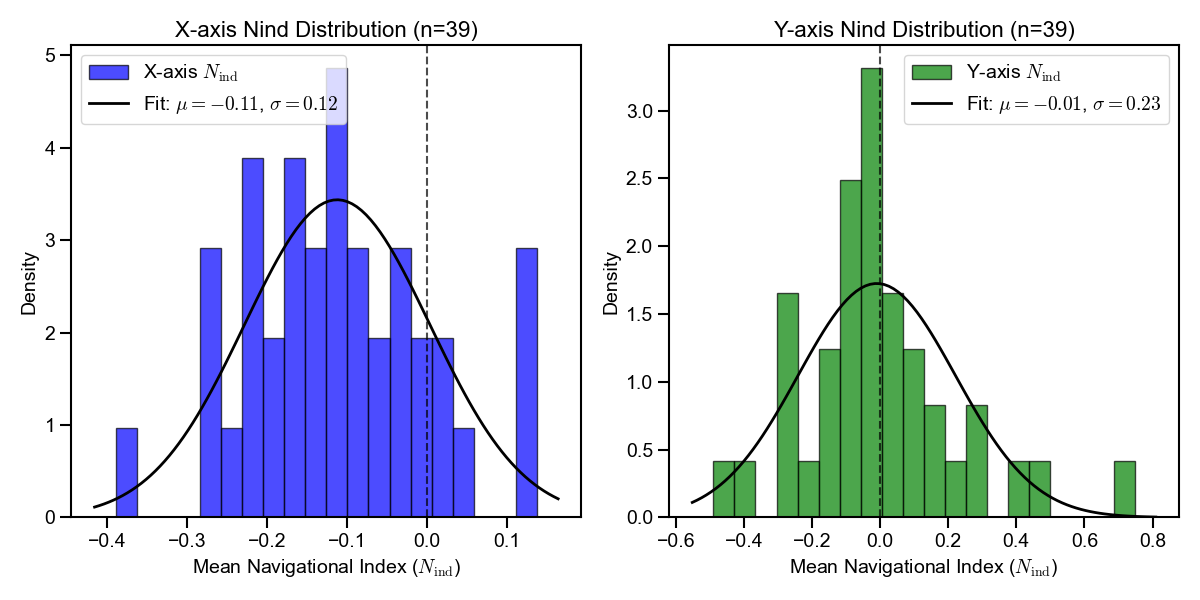

Summary Statistics:
X-axis - Mean: -0.11, Std: 0.12
Y-axis - Mean: -0.01, Std: 0.23


In [13]:
# Plot both x and y navigational indices
anm_plot.plot_navigational_indices_comparison(ni_dict_x, ni_dict_y, 
                                            bins=20, 
                                            density=True, 
                                            fit_distribution=True)

### Individual X- and Y-axis $N_i$ time-series 

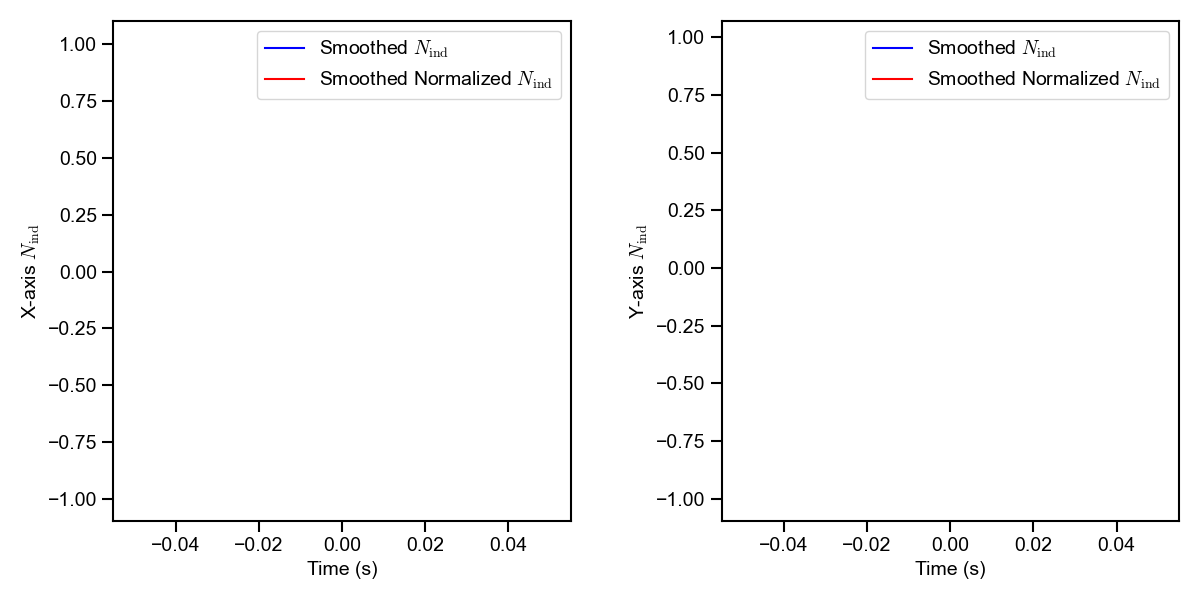

Processing larva 41/41
Video saved successfully!


In [14]:
# For interactive visualization
anm_plot.plot_ni_interactive(ni_dict_x, ni_dict_y)

# For saving animation
anm_plot.save_ni_animation(ni_dict_x, ni_dict_y, '../results/navigational_indices.mp4')

### Normalised X-axis $N_{ind}$ across individuals

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:520: RuntimeWarning: Mean of empty slice
  
/Users/sharbat/miniconda3/envs/anemotaxis/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


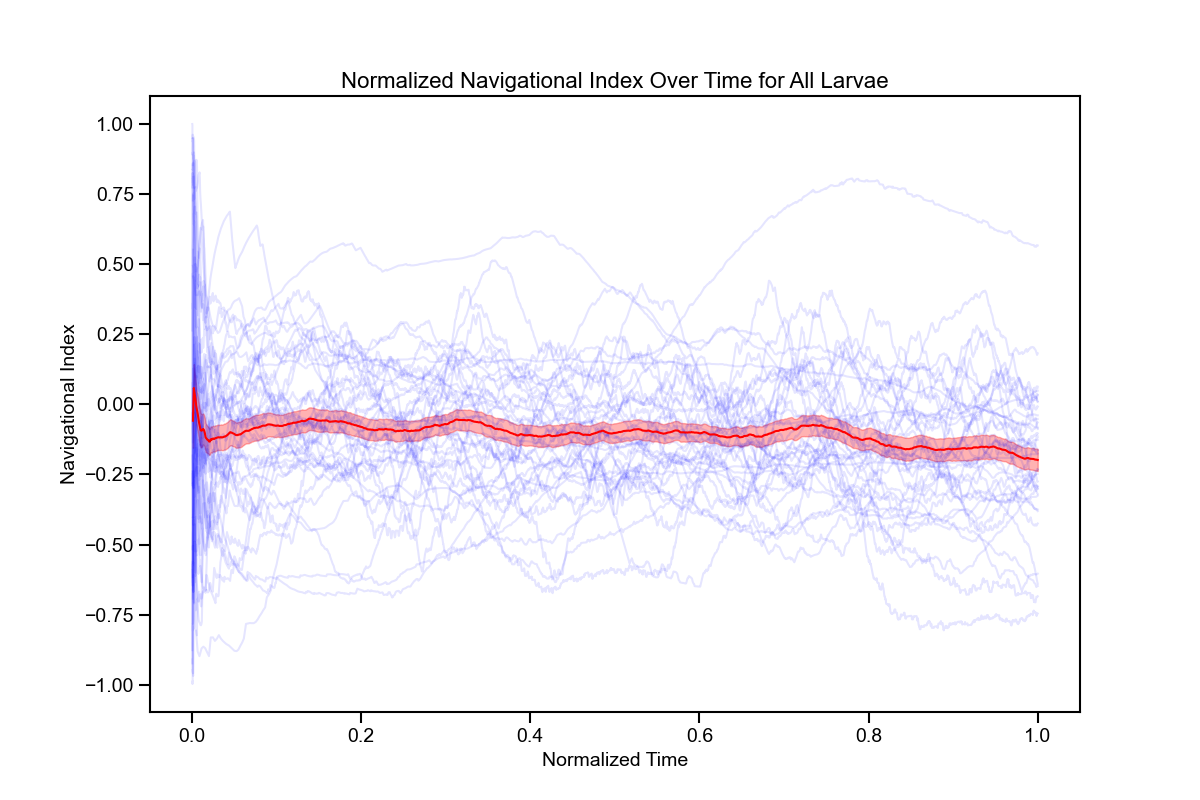

In [18]:
window_size = 500
anm_plot.plot_normalized_navigational_index_time_series(ni_dict_x, window_size=window_size)

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:560: RuntimeWarning: Mean of empty slice
  # Subtract the least time value so they all start at zero


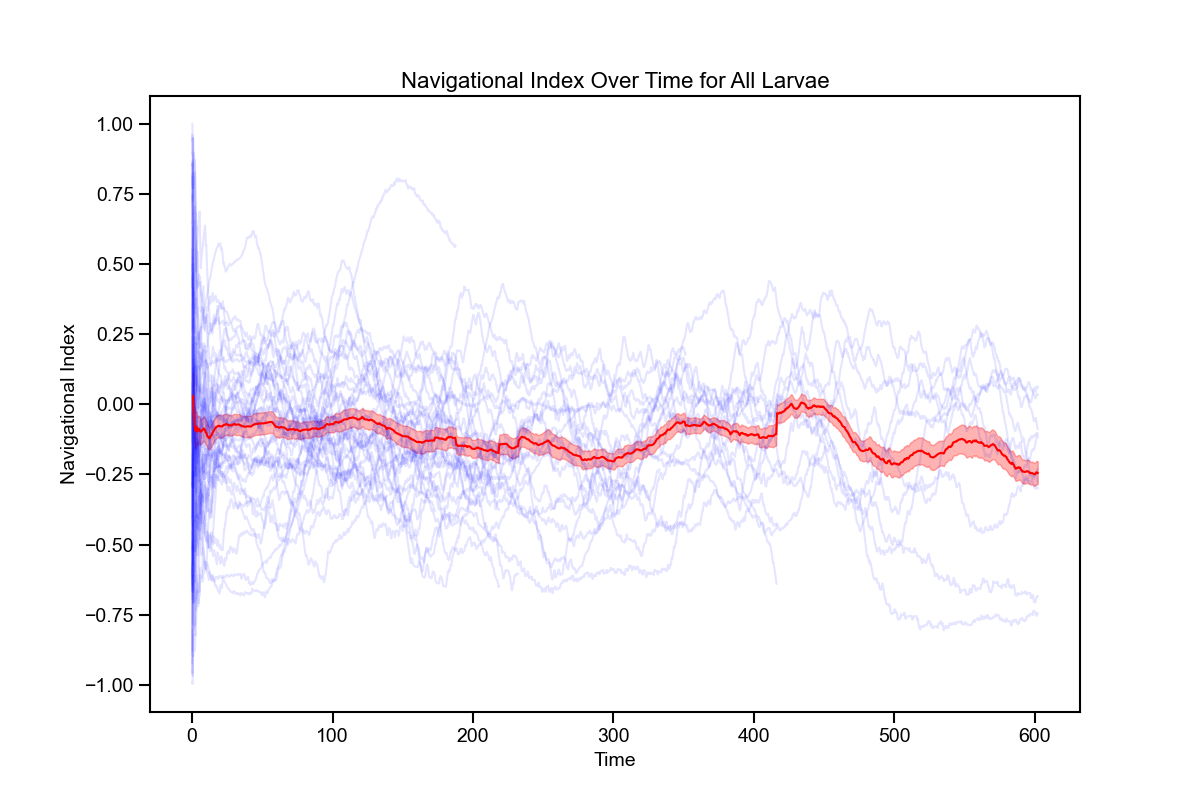

In [19]:
anm_plot.plot_navigational_index_time_series_together(ni_dict_x, window_size=window_size)

### Normalised Y-axis $N_{ind}$ across individuals

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:520: RuntimeWarning: Mean of empty slice
  
/Users/sharbat/miniconda3/envs/anemotaxis/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2019: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


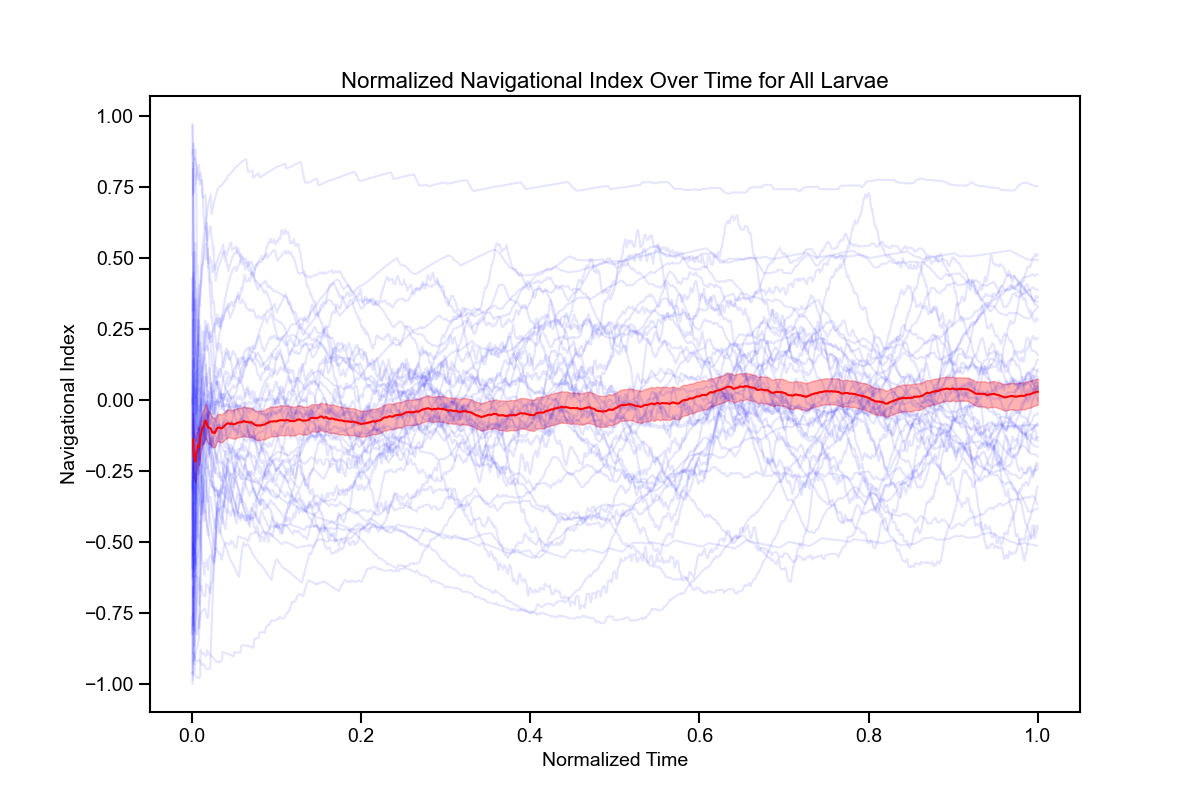

In [26]:
window_size = 500
anm_plot.plot_normalized_navigational_index_time_series(ni_dict_y, window_size=window_size)

/Users/sharbat/Projects/anemotaxis/src/plot_data.py:560: RuntimeWarning: Mean of empty slice
  # Subtract the least time value so they all start at zero


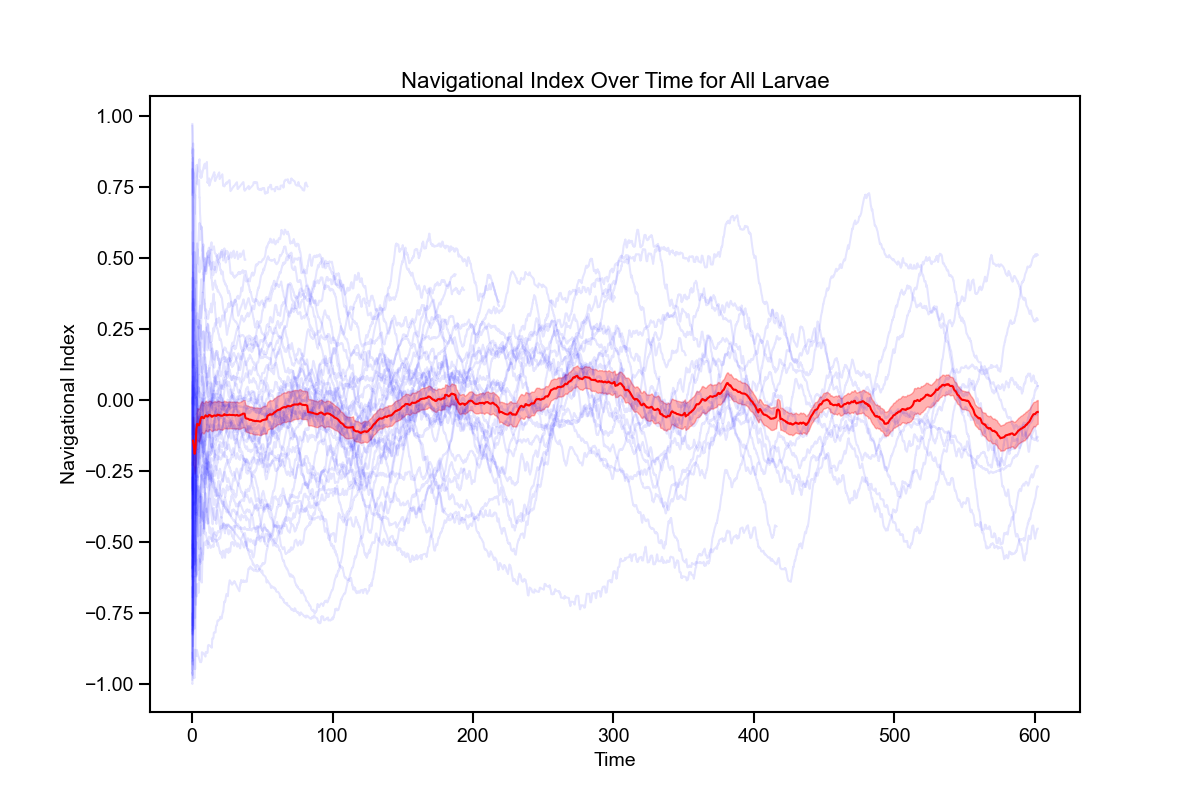

In [27]:
anm_plot.plot_navigational_index_time_series_together(ni_dict_y, window_size=window_size)

## Discussion, TO DO
- Test how each larvae (or track) moves across time
- Write unit tests

# Part II : Analysing via `trx.mat` data

In [28]:
# trx_path = "/Users/sharbat/Projects/anemotaxis/data/20240219_140808/trx.mat"
# trx_sharbat = anm_parse.import_trx_sharbat(trx_path)
# trx_tim = anm_parse.import_trx(trx_path)

In [29]:
# import h5py
# def print_trx_structure(filepath):
#     """
#     Print the detailed structure of 'trx' group in a .mat file including nested references.
    
#     Args:
#         filepath (str): Path to the .mat file
#     """
#     with h5py.File(filepath, 'r') as f:
#         print("\n=== TRX Structure ===")
#         if 'trx' not in f:
#             print("No 'trx' group found in file")
#             return
            
#         trx = f['trx']
        
#         def explore_reference(obj):
#             """Helper function to explore object references"""
#             if isinstance(obj, h5py.Reference):
#                 referenced_obj = f[obj]
#                 if isinstance(referenced_obj, h5py.Dataset):
#                     return f"Referenced Dataset - Shape: {referenced_obj.shape}, Type: {referenced_obj.dtype}"
#                 else:
#                     return "Referenced Group"
#             return None
        
#         # Print all fields in trx
#         for field_name, field_obj in trx.items():
#             print(f"\n=== {field_name} ===")
            
#             # Handle dataset case
#             if isinstance(field_obj, h5py.Dataset):
#                 print(f"Shape: {field_obj.shape}")
#                 print(f"Type: {field_obj.dtype}")
                
#                 # If it's an array of objects, explore each element
#                 if field_obj.dtype == np.dtype('object'):
#                     for i in range(min(field_obj.shape[0], 5)):  # Look at first 5 elements
#                         try:
#                             ref_info = explore_reference(field_obj[i])
#                             if ref_info:
#                                 print(f"Element {i}: {ref_info}")
#                         except Exception as e:
#                             print(f"Could not explore element {i}: {str(e)}")
            
#             # Handle group case
#             elif isinstance(field_obj, h5py.Group):
#                 print("Group containing:")
#                 for subfield_name, subfield_obj in field_obj.items():
#                     print(f"  └── {subfield_name}")
#                     print(f"      ├── Shape: {subfield_obj.shape}")
#                     print(f"      └── Type: {subfield_obj.dtype}")


In [30]:


# Use the function
# path = "/Users/sharbat/Projects/anemotaxis/data/20240219_140808/trx.mat"
path = "/Users/sharbat/Projects/anemotaxis/data/20240308_124423/trx.mat" #CONTROL 'FCF_attP2-40'
# path = "/Users/sharbat/Projects/anemotaxis/data/20240308_115957/trx.mat" #SS01948
# path = "/Users/sharbat/Projects/anemotaxis/data/20240308_125815/trx.mat" #SS01696
# path = "/Users/sharbat/Projects/anemotaxis/data/20240308_131239/trx.mat" #MB143b

# print_trx_structure(path)


In [31]:
# def import_trx(path):
#     """Import trx file and calculate behavior durations.
    
#     Handles -1/1 encoded behaviors and calculates durations for all behavioral states
#     including their variations (large, strong, weak).
    
#     Args:
#         path (str): Path to the .trx file
#     Returns:
#         dict: Data dictionary with behavior durations
#     """
#     with h5py.File(path, 'r') as f:
#         fields = list(f['trx'].keys())
#         trx_extracted = {}
        
#         nb_larvae = f['trx'][fields[0]].shape[1]
#         print(f"Number of larvae: {nb_larvae}")
        
#         # Define all behavior types
#         base_behaviors = ['run', 'cast', 'back', 'hunch', 'roll', 'stop']
#         behavior_variants = ['', '_large', '_strong', '_weak']
#         behaviors = [f"{b}{v}" for b in base_behaviors for v in behavior_variants]
        
#         for i in range(nb_larvae):
#             larva = {}
#             for field in fields:
#                 try:
#                     ref = f['trx'][field][0][i]
#                     data = np.array(f[ref])
#                     data = data.tolist()
#                     data = data[0] if len(data) == 1 else data
#                     larva[field] = data
#                 except Exception as e:
#                     print(f"Warning: Could not process field '{field}' for larva {i}: {str(e)}")
#                     larva[field] = None
            
#             # Calculate number of timesteps
#             larva["nb_timestep"] = len(larva["t"]) if "t" in larva else 0
            
#             # Calculate durations for all behavioral states
#             for behavior in behaviors:
#                 if behavior in larva and larva[behavior] is not None:
#                     # Convert -1/1 to 0/1 and sum
#                     behavior_data = np.array(larva[behavior])
#                     active_frames = np.sum((behavior_data + 1) / 2)
#                     total_frames = len(behavior_data)
                    
#                     # Store both absolute and relative durations
#                     larva[f"{behavior}_duration"] = active_frames
#                     larva[f"{behavior}_fraction"] = active_frames / total_frames if total_frames > 0 else 0
#                 else:
#                     larva[f"{behavior}_duration"] = 0
#                     larva[f"{behavior}_fraction"] = 0
            
#             # Calculate total active time (any behavior)
#             all_behaviors = [b for b in behaviors if b in larva and larva[b] is not None]
#             if all_behaviors:
#                 behavior_arrays = [(np.array(larva[b]) + 1) / 2 for b in all_behaviors]
#                 total_active = np.maximum.reduce(behavior_arrays)
#                 larva['total_active_duration'] = np.sum(total_active)
#                 larva['total_active_fraction'] = np.mean(total_active)
            
#             # Extract larva ID
#             larva_id = larva.pop("numero_larva_num") if "numero_larva_num" in larva else i
#             if isinstance(larva_id, list):
#                 larva_id = "_".join(map(str, larva_id))
            
#             trx_extracted[str(larva_id)] = larva
            
#             # Print summary for this larva
#             # print(f"\nLarva {larva_id} behavior durations:")
#             # for behavior in base_behaviors:
#             #     if f"{behavior}_duration" in larva:
#             #         print(f"{behavior}: {larva[f'{behavior}_duration']:.1f} frames "
#             #               f"({larva[f'{behavior}_fraction']:.1%} of time)")

#     return {"data": trx_extracted}

# # Example usage:
# # path = "/Users/sharbat/Projects/anemotaxis/data/20240219_140808/trx.mat"
# trx_data = import_trx(path)

In [32]:
base_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n"

In [33]:
def import_trx(path):
    """Import trx file data.
    
    Args:
        path (str): Path to the .trx file
    Returns:
        dict: Data dictionary containing raw behavioral data
    """
    with h5py.File(path, 'r') as f:
        fields = list(f['trx'].keys())
        trx_extracted = {}
        nb_larvae = f['trx'][fields[0]].shape[1]
        
        for i in range(nb_larvae):
            larva = {}
            for field in fields:
                try:
                    ref = f['trx'][field][0][i]
                    data = np.array(f[ref]).flatten()
                    larva[field] = data.tolist() if len(data) > 1 else data[0]
                except:
                    larva[field] = None
            
            # Extract larva ID
            larva_id = str(larva.pop("numero_larva_num", i))
            trx_extracted[larva_id] = larva
    
    return {"data": trx_extracted}

In [34]:
def process_all_trx_files(base_path):
    """Process all trx.mat files found in the base path and its subdirectories.
    
    Args:
        base_path (str): Base directory path to search for trx.mat files
        
    Returns:
        dict: Combined dictionary of all processed trx data
        dict: Metadata including file paths and experiment info
    """
    import os
    from datetime import datetime
    
    all_data = {}
    metadata = {
        'files_processed': [],
        'total_larvae': 0,
        'experiments': {}
    }
    
    # Walk through all subdirectories
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file == 'trx.mat':
                file_path = os.path.join(root, file)
                print(f"\nProcessing: {file_path}")
                
                try:
                    # Extract experiment date from path
                    date_str = os.path.basename(os.path.dirname(file_path))
                    try:
                        exp_date = datetime.strptime(date_str.split('_')[0], '%Y%m%d')
                    except:
                        exp_date = None
                    
                    # Process the file
                    trx_result = import_trx(file_path)
                    
                    # Count larvae in this file
                    n_larvae = len(trx_result['data'])
                    
                    # Add metadata
                    exp_info = {
                        'path': file_path,
                        'date': exp_date,
                        'n_larvae': n_larvae,
                        'date_str': date_str
                    }
                    metadata['experiments'][date_str] = exp_info
                    metadata['files_processed'].append(file_path)
                    metadata['total_larvae'] += n_larvae
                    
                    # Add unique identifier to each larva
                    for larva_id, larva_data in trx_result['data'].items():
                        unique_id = f"{date_str}_{larva_id}"
                        larva_data['experiment_date'] = date_str
                        all_data[unique_id] = larva_data
                    
                    print(f"Successfully processed {n_larvae} larvae from {date_str}")
                    
                except Exception as e:
                    print(f"Error processing {file_path}: {str(e)}")
                    continue
    
    print(f"\nSummary:")
    print(f"Total files processed: {len(metadata['files_processed'])}")
    print(f"Total larvae processed: {metadata['total_larvae']}")
    
    return {
        'data': all_data,
        'metadata': metadata
    }

# Usage
base_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n"
all_trx_data = process_all_trx_files(base_path)

# Print summary of processed data
print("\nExperiments processed:")
# for date_str, exp_info in sorted(all_trx_data['metadata']['experiments'].items()):
#     print(f"{date_str}: {exp_info['n_larvae']} larvae")


Processing: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240226_145653/trx.mat
Successfully processed 80 larvae from 20240226_145653

Processing: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240301_105819/trx.mat
Successfully processed 71 larvae from 20240301_105819

Processing: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240301_121446/trx.mat
Successfully processed 57 larvae from 20240301_121446

Processing: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240219_143334/trx.mat
Successfully processed 65 larvae from 20240219_143334

Processing: /Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n/20240308_124423/trx.mat
Successfully processed 39 larvae from 20240308_124423

Processing: /Users/sharbat/Projects/anemotaxis/data/FC

In [36]:
# Get list of available experiment dates
exp_dates = sorted(all_trx_data['metadata']['experiments'].keys())
print("Available experiments:")
for date_str in exp_dates:
    n_larvae = all_trx_data['metadata']['experiments'][date_str]['n_larvae']
    print(f"{date_str}: {n_larvae} larvae")

Available experiments:
20240219_143334: 65 larvae
20240223_112627: 41 larvae
20240226_145653: 80 larvae
20240226_163646: 44 larvae
20240301_105819: 71 larvae
20240301_121446: 57 larvae
20240304_151714: 47 larvae
20240304_162010: 57 larvae
20240308_104430: 38 larvae
20240308_124423: 39 larvae


In [37]:
def get_experiment_data(all_trx_data, date_str):
    """Extract data for a specific experiment date.
    
    Args:
        all_trx_data (dict): Combined trx data dictionary
        date_str (str): Experiment date string to filter
        
    Returns:
        dict: Data dictionary containing only the specified experiment's data
    """
    exp_data = {
        'data': {},
        'metadata': all_trx_data['metadata']['experiments'][date_str]
    }
    
    # Filter larvae by experiment date
    for larva_id, larva_data in all_trx_data['data'].items():
        if larva_data['experiment_date'] == date_str:
            # Remove experiment date prefix from larva_id
            clean_id = larva_id.split('_', 1)[1]
            exp_data['data'][clean_id] = larva_data
            
    return exp_data

In [38]:
# Get list of available experiment dates
exp_dates = sorted(all_trx_data['metadata']['experiments'].keys())
print("Available experiments:")
for date_str in exp_dates:
    n_larvae = all_trx_data['metadata']['experiments'][date_str]['n_larvae']
    print(f"{date_str}: {n_larvae} larvae")

# Get data for a specific experiment
date_str = exp_dates[0]  # First experiment
exp_data = get_experiment_data(all_trx_data, date_str)

# Access larvae from this experiment
print(f"\nLarvae in experiment {date_str}:")
print(f"Total larvae: {len(exp_data['data'])}")

# Process each larva in this experiment
for larva_id, larva_data in exp_data['data'].items():
    # Access larva-specific data
    x_center = np.array(larva_data['x_center'])
    y_center = np.array(larva_data['y_center'])
    runs = np.array(larva_data['run'])
    casts = np.array(larva_data['cast'])
    
    # Example: calculate basic statistics
    track_duration = len(x_center) / 16  # assuming 16 fps
    run_fraction = np.mean(runs)
    cast_fraction = np.mean(casts)
    
    print(f"Larva {larva_id}: {track_duration:.1f}s, "
          f"run: {run_fraction:.2f}, cast: {cast_fraction:.2f}")

Available experiments:
20240219_143334: 65 larvae
20240223_112627: 41 larvae
20240226_145653: 80 larvae
20240226_163646: 44 larvae
20240301_105819: 71 larvae
20240301_121446: 57 larvae
20240304_151714: 47 larvae
20240304_162010: 57 larvae
20240308_104430: 38 larvae
20240308_124423: 39 larvae

Larvae in experiment 20240219_143334:
Total larvae: 65
Larva 143334_2.0: 422.6s, run: -0.25, cast: 0.21
Larva 143334_3.0: 330.2s, run: 0.31, cast: -0.36
Larva 143334_5.0: 159.9s, run: 0.02, cast: -0.04
Larva 143334_6.0: 279.1s, run: -0.69, cast: 0.55
Larva 143334_7.0: 203.6s, run: -0.79, cast: 0.66
Larva 143334_9.0: 422.6s, run: -0.01, cast: -0.07
Larva 143334_10.0: 133.2s, run: -0.75, cast: 0.63
Larva 143334_11.0: 59.0s, run: -0.65, cast: -0.13
Larva 143334_16.0: 59.0s, run: -0.57, cast: -0.17
Larva 143334_18.0: 65.4s, run: -0.72, cast: 0.24
Larva 143334_21.0: 249.2s, run: -0.34, cast: 0.19
Larva 143334_23.0: 422.6s, run: -0.80, cast: -0.17
Larva 143334_24.0: 142.2s, run: -0.21, cast: -0.09
Larva

In [39]:
# def summarize_trx_data(trx_data):
#     """
#     Provide comprehensive summary of trx_data including experiment dates, 
#     larvae counts, and basic statistics for each experiment.
    
#     Args:
#         trx_data (dict): Dictionary of processed trx data
#     """
#     # Initialize data structures
#     experiment_stats = {}
    
#     # Collect statistics for each experiment
#     for larva_id, larva_data in trx_data['data'].items():
#         date = larva_data.get('experiment_date', 'Unknown')
        
#         if date not in experiment_stats:
#             experiment_stats[date] = {
#                 'count': 0,
#                 'total_frames': [],
#                 'run_fraction': [],
#                 'cast_fraction': [],
#                 'track_duration': []
#             }
        
#         # Update basic counts
#         experiment_stats[date]['count'] += 1
        
#         # Calculate behavioral statistics
#         n_frames = len(larva_data['x_center'])
#         run_frac = np.mean(larva_data['run']) if 'run' in larva_data else np.nan
#         cast_frac = np.mean(larva_data['cast']) if 'cast' in larva_data else np.nan
#         duration = n_frames / 16  # Assuming 16 fps
        
#         experiment_stats[date]['total_frames'].append(n_frames)
#         experiment_stats[date]['run_fraction'].append(run_frac)
#         experiment_stats[date]['cast_fraction'].append(cast_frac)
#         experiment_stats[date]['track_duration'].append(duration)
    
#     # Print detailed summary
#     print("\nDetailed Summary of Larval Tracking Data")
#     print("=" * 80)
    
#     # Print per-experiment statistics
#     total_larvae = 0
#     print("\nPer-Experiment Statistics:")
#     print("-" * 80)
#     print(f"{'Date':15} {'Larvae':>8} {'Duration (s)':>12} {'Run %':>8} {'Cast %':>8} {'Frames':>10}")
#     print("-" * 80)
    
#     for date in sorted(experiment_stats.keys()):
#         stats = experiment_stats[date]
#         total_larvae += stats['count']
        
#         # Calculate mean statistics
#         mean_duration = np.mean(stats['track_duration'])
#         mean_run = np.nanmean(stats['run_fraction']) * 100
#         mean_cast = np.nanmean(stats['cast_fraction']) * 100
#         mean_frames = np.mean(stats['total_frames'])
        
#         print(f"{date:15} {stats['count']:8d} {mean_duration:12.1f} "
#               f"{mean_run:8.1f} {mean_cast:8.1f} {mean_frames:10.0f}")
    
#     print("-" * 80)
    
#     # Print overall statistics
#     print("\nOverall Statistics:")
#     print("-" * 40)
#     print(f"Total experiments: {len(experiment_stats)}")
#     print(f"Total larvae: {total_larvae}")
    
#     # Calculate grand means
#     all_durations = [d for stats in experiment_stats.values() 
#                     for d in stats['track_duration']]
#     all_runs = [r for stats in experiment_stats.values() 
#                 for r in stats['run_fraction'] if not np.isnan(r)]
#     all_casts = [c for stats in experiment_stats.values() 
#                  for c in stats['cast_fraction'] if not np.isnan(c)]
    
#     print(f"\nMean track duration: {np.mean(all_durations):.1f} ± "
#           f"{np.std(all_durations):.1f} s")
#     print(f"Mean run fraction: {np.mean(all_runs)*100:.1f} ± "
#           f"{np.std(all_runs)*100:.1f}%")
#     print(f"Mean cast fraction: {np.mean(all_casts)*100:.1f} ± "
#           f"{np.std(all_casts)*100:.1f}%")
    
#     # Print data quality statistics
#     print("\nData Quality Metrics:")
#     print("-" * 40)
#     short_tracks = sum(1 for stats in experiment_stats.values() 
#                       for d in stats['track_duration'] if d < 60)
#     print(f"Tracks < 60s: {short_tracks} ({short_tracks/total_larvae*100:.1f}%)")
    
#     nan_runs = sum(1 for stats in experiment_stats.values() 
#                   for r in stats['run_fraction'] if np.isnan(r))
#     print(f"Tracks missing run data: {nan_runs} ({nan_runs/total_larvae*100:.1f}%)")
    
#     return experiment_stats

# # Usage example
# stats = summarize_trx_data(trx_data)

In [73]:
# import multiprocessing as mp
# from functools import partial
# import os
# from datetime import datetime
# import h5py
# import numpy as np
# from tqdm.notebook import tqdm

# def process_single_file(file_info):
#     """Process a single trx file (multiprocessing-safe version)"""
#     file_path, date_str = file_info
    
#     try:
#         with h5py.File(file_path, 'r') as f:
#             fields = list(f['trx'].keys())
#             trx_extracted = {}
#             nb_larvae = f['trx'][fields[0]].shape[1]
            
#             for i in range(nb_larvae):
#                 larva = {}
#                 for field in fields:
#                     try:
#                         ref = f['trx'][field][0][i]
#                         data = np.array(f[ref]).flatten()
#                         larva[field] = data.tolist() if len(data) > 1 else data[0]
#                     except:
#                         larva[field] = None
                
#                 larva_id = str(larva.pop("numero_larva_num", i))
#                 trx_extracted[larva_id] = larva
        
#         return date_str, trx_extracted, {
#             'path': file_path,
#             'date': datetime.strptime(date_str.split('_')[0], '%Y%m%d'),
#             'n_larvae': len(trx_extracted),
#             'date_str': date_str
#         }
#     except Exception as e:
#         print(f"Error processing {file_path}: {str(e)}")
#         return None

# def process_all_trx_files(base_path, n_processes=None):
#     """Process all trx files using multiprocessing"""
#     if n_processes is None:
#         n_processes = max(1, mp.cpu_count() - 1)
    
#     # Find all trx files
#     file_list = []
#     for root, dirs, files in os.walk(base_path):
#         for file in files:
#             if file == 'trx.mat':
#                 file_path = os.path.join(root, file)
#                 date_str = os.path.basename(os.path.dirname(file_path))
#                 file_list.append((file_path, date_str))
    
#     print(f"Found {len(file_list)} trx.mat files")
#     print(f"Using {n_processes} processes")
    
#     # Initialize results
#     all_data = {}
#     metadata = {
#         'files_processed': [],
#         'total_larvae': 0,
#         'experiments': {}
#     }
    
#     # Process files in parallel
#     if __name__ == '__main__':  # This check is important for multiprocessing
#         with mp.Pool(processes=n_processes) as pool:
#             results = list(tqdm(
#                 pool.imap(process_single_file, file_list),
#                 total=len(file_list),
#                 desc="Processing files"
#             ))
        
#         # Combine results
#         for result in results:
#             if result is not None:
#                 date_str, trx_extracted, exp_info = result
#                 metadata['experiments'][date_str] = exp_info
#                 metadata['files_processed'].append(exp_info['path'])
#                 metadata['total_larvae'] += exp_info['n_larvae']
                
#                 for larva_id, larva_data in trx_extracted.items():
#                     unique_id = f"{date_str}_{larva_id}"
#                     larva_data['experiment_date'] = date_str
#                     all_data[unique_id] = larva_data
    
#     print(f"\nProcessed {len(metadata['files_processed'])} files")
#     print(f"Total larvae: {metadata['total_larvae']}")
    
#     return {'data': all_data, 'metadata': metadata}

# # Save this code in a separate Python file (e.g., trx_processor.py) and import it
# # Or run it in a new notebook cell with the if __name__ == '__main__': check

In [41]:
# def print_trx_structure(trx_data):
#     """Print the hierarchical structure of trx_data with shapes for all larvae."""
    
#     def get_shape(item):
#         if isinstance(item, (list, np.ndarray)):
#             return f"Shape: {np.array(item).shape}"
#         return "Shape: scalar"

#     print("trx_data/")
#     print("└── data/")
    
#     # Iterate through all larvae
#     for larva_id, larva_data in trx_data['data'].items():
#         print(f"    ├── Larva {larva_id}/")
#         # Sort keys for consistent output
#         for key in sorted(larva_data.keys()):
#             is_last = key == sorted(larva_data.keys())[-1]
#             prefix = '        └──' if is_last else '        ├──'
#             print(f"{prefix} {key}: {get_shape(larva_data[key])}")

# # Use the function
# print_trx_structure(trx_data)

In [42]:
# # Get list of all larvae IDs
# larvae_ids = sorted(trx_data['data'].keys())
# print("Available larvae IDs:")
# print(larvae_ids)

In [75]:
def plot_behaviors_two_panels(trx_data):
    """Plot behavioral states in two panels with interactive slider control."""
    plt.ioff()
    
    larva_ids = sorted(trx_data['data'].keys())
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    
    # Define colors for behaviors
    run_cast_colors = {
        # Run behaviors - Red family
        # 'run': 'b',
        'run_large': 'b',
        'run_strong': 'r',
        # Cast behaviors - Blue family
        # 'cast': '#377eb8',
        # 'cast_large': '#7fb5d6',
        # 'cast_strong': '#00008b'
        
    }
    
    other_colors = {
        # Back behaviors - Green family
        'back': '#4daf4a',
        'back_large': '#90ee90',
        'back_strong': '#006400',
        # Hunch behaviors - Purple family
        'hunch': '#984ea3',
        'hunch_large': '#dda0dd',
        'hunch_strong': '#4b0082',
        # Roll behaviors - Orange family
        'roll': '#ff7f00',
        'roll_large': '#ffa500',
        'roll_strong': '#8b4513',
        # Stop behaviors - Gray family
        'stop': '#666666',
        'stop_large': '#a9a9a9',
        'stop_strong': '#1a1a1a'
    }
    
    # Create interactive controls
    play = widgets.Play(
        value=0,
        min=0,
        max=len(larva_ids) - 1,
        step=1,
        interval=500,
        description="Play"
    )
    
    slider = widgets.IntSlider(
        min=0,
        max=len(larva_ids) - 1,
        description='Larva:',
        value=0,
        style={'description_width': 'initial'},
        readout_format='d',
        layout=widgets.Layout(width='1000px')
    )
    
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    def plot_behaviors(ax, behaviors_dict, data, time):
        """Helper function to plot behaviors on a given axis"""
        for behavior, color in behaviors_dict.items():
            if behavior in data:
                # Normalize from [-1,1] to [0,1]
                behavior_data = (np.array(data[behavior]) + 1) / 2
                mask = behavior_data > 0.5
                
                edges = np.diff(mask.astype(int))
                starts = np.where(edges == 1)[0] + 1
                ends = np.where(edges == -1)[0] + 1
                
                if mask[0]: starts = np.r_[0, starts]
                if mask[-1]: ends = np.r_[ends, len(mask)-1]
                
                for start, end in zip(starts, ends):
                    ax.axvspan(time[start], time[end], 
                             color=color, alpha=0.3,
                             label=behavior.replace('_', ' ').title() if start == starts[0] else "")
    
    def update_plot(change):
        if change['type'] == 'change' and change['name'] == 'value':
            ax1.clear()
            ax2.clear()
            
            larva_id = larva_ids[change['new']]
            time = np.array(trx_data['data'][larva_id]['t'])
            
            # Plot run/cast behaviors
            plot_behaviors(ax1, run_cast_colors, trx_data['data'][larva_id], time)
            ax1.set_title('Run and Cast Behaviours')
            ax1.set_yticks([])
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Plot other behaviors
            plot_behaviors(ax2, other_colors, trx_data['data'][larva_id], time)
            ax2.set_title('Other Behaviours')
            ax2.set_xlabel('Time (s)')
            ax2.set_yticks([])
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Set common properties
            for ax in [ax1, ax2]:
                ax.set_ylim(0, 1)
            
            plt.suptitle(f'Behavioural States - Larva {larva_id}', y=1.0, fontsize=14)
            plt.tight_layout()
            fig.canvas.draw_idle()
    
    slider.observe(update_plot)
    
    display(widgets.HBox([play, slider]))
    display(fig.canvas)
    
    update_plot({'type': 'change', 'name': 'value', 'new': 0})



In [79]:
date_str = exp_dates[0]  # First experiment
trx_data = get_experiment_data(all_trx_data, date_str)

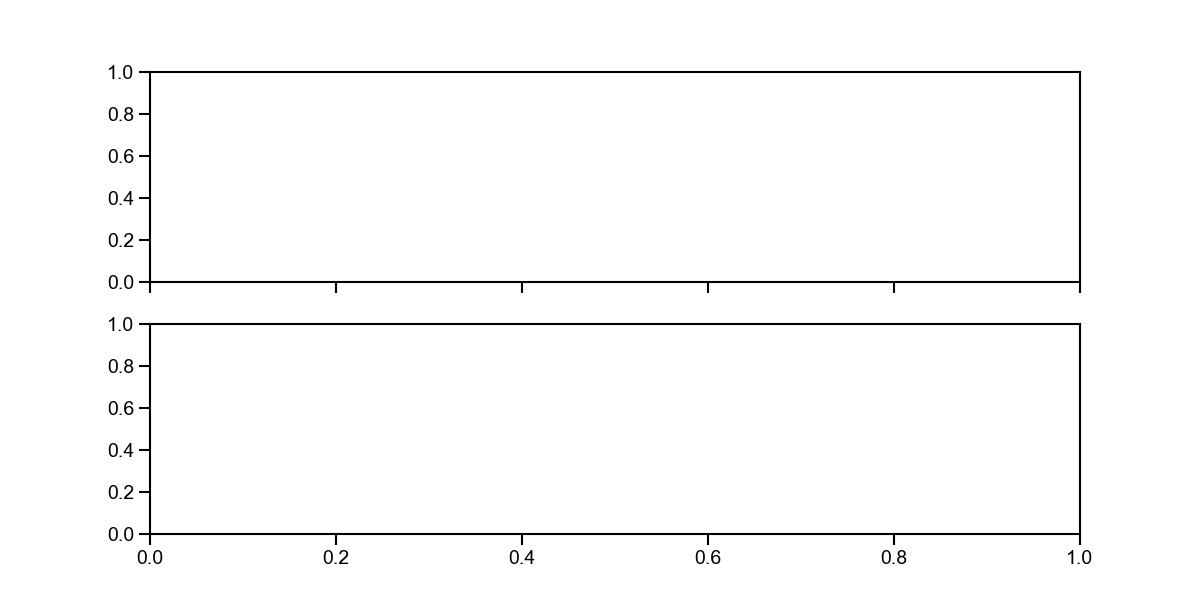

In [80]:

# Use the function

plot_behaviors_two_panels(trx_data)

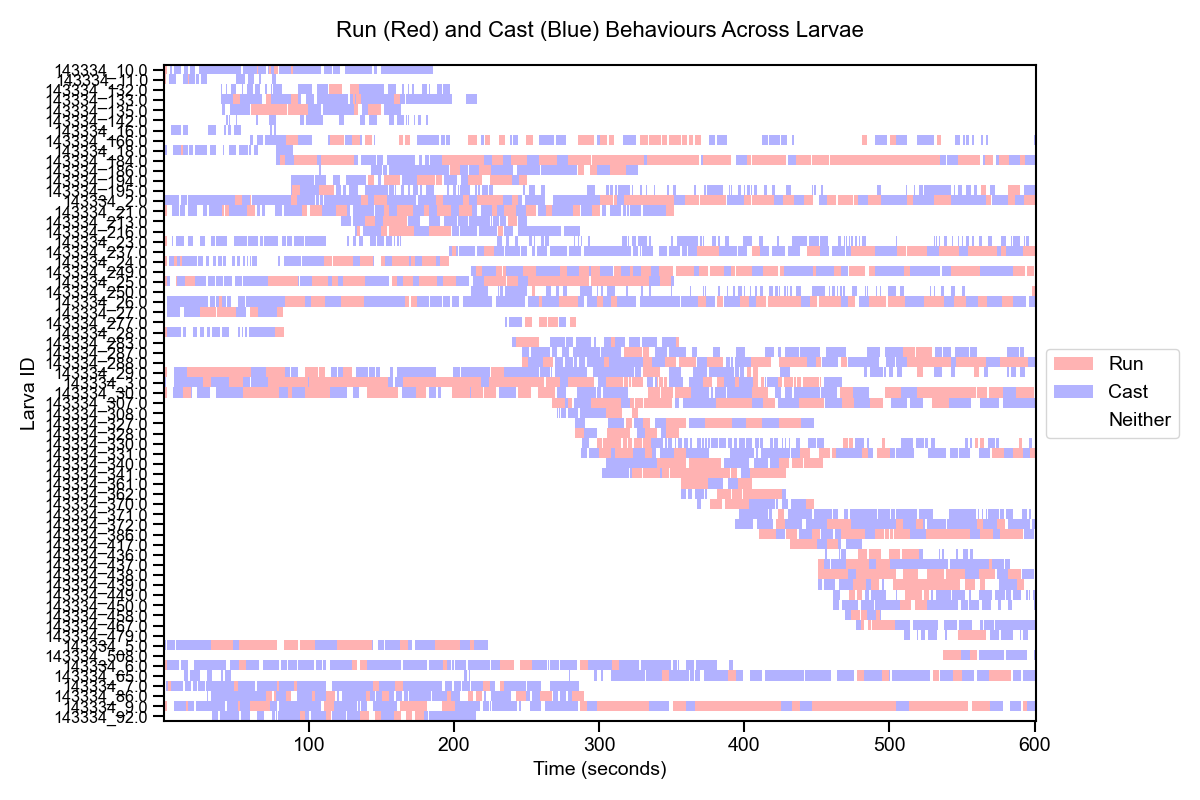

In [106]:
def plot_behavior_matrix(trx_data):
    """Plot run and cast behaviours in a single matrix with one row per larva."""
    
    # Get sorted larva IDs
    larva_ids = sorted(trx_data['data'].keys())
    
    # Create figure
    plt.figure(figsize=(12, 8))
    
    # Find time range
    min_time = min(min(trx_data['data'][lid]['t']) for lid in larva_ids)
    max_time = max(max(trx_data['data'][lid]['t']) for lid in larva_ids)
    
    # Create matrix for behaviors
    n_larvae = len(larva_ids)
    
    # Create a masked array to handle missing data points
    behavior_matrix = np.full((n_larvae, 1000, 3), fill_value=1.0)  # White background
    
    # Fill matrix with behavioral states
    for i, larva_id in enumerate(larva_ids):
        larva_time = np.array(trx_data['data'][larva_id]['t'])
        run_data = (np.array(trx_data['data'][larva_id]['run_large']) + 1) / 2
        cast_data = (np.array(trx_data['data'][larva_id]['cast_large']) + 1) / 2
        
        # Normalize time to indices
        time_indices = ((larva_time - min_time) / (max_time - min_time) * 999).astype(int)
        
        # Set colors directly at time points
        for t_idx, (run, cast) in zip(time_indices, zip(run_data, cast_data)):
            if run > 0.5:  # Run behavior
                behavior_matrix[i, t_idx] = [1, 0.7, 0.7]  # Light red
            elif cast > 0.5:  # Cast behavior
                behavior_matrix[i, t_idx] = [0.7, 0.7, 1]  # Light blue
            else:  # Neither
                behavior_matrix[i, t_idx] = [1, 1, 1]  # White
    
    # Plot matrix
    plt.imshow(behavior_matrix, aspect='auto', interpolation='nearest',
               extent=[min_time, max_time, n_larvae, 0])
    
    # Set y-axis labels
    plt.yticks(np.arange(0.5, n_larvae + 0.5), larva_ids, fontsize='small')
    
    # Customize plot
    plt.title('Run (Red) and Cast (Blue) Behaviours Across Larvae', pad=20)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Larva ID')
    
    # Create custom legend patches
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=(1, 0.7, 0.7), label='Run'),
        Patch(facecolor=(0.7, 0.7, 1), label='Cast'),
        Patch(facecolor=(1, 1, 1), label='Neither')
    ]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()

# Generate visualization
plot_behavior_matrix(trx_data)

In [82]:
def plot_behaviors_and_save_video(trx_data, output_path='larva_behaviours.mp4', fps=2):
    """Plot behavioural states and save as video."""
    plt.ioff()
    larva_ids = sorted(trx_data['data'].keys())
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
    
    # Define color schemes for both panels
    run_cast_colors = {
        'run': '#e41a1c',
        'run_large': '#ff7f7f',
        'run_strong': '#8b0000',
        'cast': '#377eb8',
        'cast_large': '#7fb5d6',
        'cast_strong': '#00008b'
    }
    
    other_colors = {
        'back': '#4daf4a',
        'back_large': '#90ee90',
        'back_strong': '#006400',
        'hunch': '#984ea3',
        'hunch_large': '#dda0dd',
        'hunch_strong': '#4b0082',
        'roll': '#ff7f00',
        'roll_large': '#ffa500',
        'roll_strong': '#8b4513',
        'stop': '#666666',
        'stop_large': '#a9a9a9',
        'stop_strong': '#1a1a1a'
    }
    
    def plot_behaviors(ax, behaviors_dict, data, time):
        """Helper function to plot behaviours on a given axis"""
        for behavior, color in behaviors_dict.items():
            if behavior in data:
                behavior_data = (np.array(data[behavior]) + 1) / 2
                mask = behavior_data > 0.5
                
                edges = np.diff(mask.astype(int))
                starts = np.where(edges == 1)[0] + 1
                ends = np.where(edges == -1)[0] + 1
                
                if mask[0]: starts = np.r_[0, starts]
                if mask[-1]: ends = np.r_[ends, len(mask)-1]
                
                for start, end in zip(starts, ends):
                    ax.axvspan(time[start], time[end], 
                             color=color, alpha=0.3,
                             label=behavior.replace('_', ' ').title() if start == starts[0] else "")
    
    # Set up the video writer
    writer = animation.FFMpegWriter(fps=fps)
    
    # Create directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    with writer.saving(fig, output_path, dpi=100):
        for idx, larva_id in enumerate(larva_ids):
            ax1.clear()
            ax2.clear()
            
            time = np.array(trx_data['data'][larva_id]['t'])
            
            # Plot both behavior panels
            plot_behaviors(ax1, run_cast_colors, trx_data['data'][larva_id], time)
            plot_behaviors(ax2, other_colors, trx_data['data'][larva_id], time)
            
            # Set panel properties
            ax1.set_title('Run and Cast Behaviours')
            ax2.set_title('Other Behaviours')
            ax2.set_xlabel('Time (s)')
            
            # Remove y-ticks from both panels
            ax1.set_yticks([])
            ax2.set_yticks([])
            
            # Add legends
            ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            
            # Set y-axis limits
            ax1.set_ylim(0, 1)
            ax2.set_ylim(0, 1)
            
            plt.suptitle(f'Behavioural States - Larva {larva_id}', y=1.0, fontsize=14)
            plt.tight_layout()
            
            writer.grab_frame()
            print(f"Processing larva {idx+1}/{len(larva_ids)}", end='\r')
        
        print("\nVideo saved successfully!")

# Required imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Install ffmpeg if needed:
# In terminal: brew install ffmpeg

# Generate the video
plot_behaviors_and_save_video(trx_data, '../results/larva_behaviors.mp4', fps=2)

/var/folders/qs/_71td1zx7kjd4t5xhw9wndn00000gp/T/ipykernel_42741/1496346569.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


Processing larva 65/65
Video saved successfully!


In [46]:
    # behaviors = {
    #     'run': '#e41a1c',
    #     'run_large': '#ff7f7f',
    #     'run_strong': '#8b0000',
    #     'cast': '#377eb8',
    #     'cast_large': '#7fb5d6',
    #     'cast_strong': '#00008b',
    #     # 'back': '#4daf4a',
    #     # 'back_large': '#90ee90',
    #     # 'back_strong': '#006400',
    #     # 'hunch': '#984ea3',
    #     # 'hunch_large': '#dda0dd',
    #     # 'hunch_strong': '#4b0082',
    #     # 'roll': '#ff7f00',
    #     # 'roll_large': '#ffa500',
    #     # 'roll_strong': '#8b4513',
    #     # 'stop': '#666666',
    #     # 'stop_large': '#a9a9a9',
    #     # 'stop_strong': '#1a1a1a'
    # }
    

In [47]:
def filter_larvae_by_duration(trx_data, threshold):
    """
    Filter larvae based on a minimum duration threshold (optimized version).
    
    Args:
        trx_data (dict): The tracking data with 'data' and 'metadata' keys
        threshold (float): The minimum duration (in seconds)
    
    Returns:
        dict: Filtered tracking data containing only larvae above threshold with updated metadata
    """
    # Initialize filtered data structure
    filtered_data = {
        "data": {},
        "metadata": {
            "files_processed": trx_data["metadata"]["files_processed"].copy(),
            "total_larvae": 0,
            "experiments": {}
        }
    }
    
    # Process larvae with progress bar
    from tqdm.notebook import tqdm
    
    for larva_id in tqdm(trx_data["data"], desc=f"Filtering larvae (>{threshold}s)"):
        larva_data = trx_data["data"][larva_id]
        
        # Fast duration calculation
        time_data = larva_data['t']
        try:
            total_duration = time_data[-1] - time_data[0]
            
            if total_duration >= threshold:
                filtered_data["data"][larva_id] = larva_data
                
                # Update experiment metadata
                exp_date = larva_data.get('experiment_date')
                if exp_date:
                    if exp_date not in filtered_data["metadata"]["experiments"]:
                        filtered_data["metadata"]["experiments"][exp_date] = {
                            "n_larvae": 0,
                            "date_str": exp_date
                        }
                    filtered_data["metadata"]["experiments"][exp_date]["n_larvae"] += 1
        
        except (IndexError, TypeError) as e:
            continue
    
    # Update total larvae count
    filtered_data["metadata"]["total_larvae"] = len(filtered_data["data"])
    
    return filtered_data

In [48]:
# from src.trx_processor import process_all_trx_files

# base_path = "/Users/sharbat/Projects/anemotaxis/data/FCF_attP2-40@UAS_TNT_2_0003/p_5gradient2_2s1x600s0s#n#n#n"
# all_trx_data = process_all_trx_files(base_path, n_processes=6)

In [107]:
# Filter larvae with minimum duration of 300 seconds
# threshold = 100  # 5 minutes
# filtered_trx_data = filter_larvae_by_duration(trx_data, threshold)

# # Check results
# print(f"Original total larvae: {all_trx_data['metadata']['total_larvae']}")
# print(f"Filtered total larvae: {filtered_trx_data['metadata']['total_larvae']}")
# print(f"Retention rate: {filtered_trx_data['metadata']['total_larvae'] / all_trx_data['metadata']['total_larvae']:.1%}")

In [108]:
def plot_behavioural_metrics(filtered_data, max_larvae=50):
    """Plot behavioral metrics for all larvae in filtered dataset.
    
    Args:
        filtered_data (dict): Filtered tracking data with metadata
        max_larvae (int): Maximum number of larvae to plot at once
    """
    # Define behavior groups and their colours
    behaviours = {
        'run': '#e41a1c',
        'run_large': '#ff7f7f',
        'run_strong': '#8b0000',
        'cast': '#377eb8',
        'cast_large': '#7fb5d6',
        'cast_strong': '#00008b'
    }
    
    # Get all larva IDs and handle pagination if needed
    all_larva_ids = sorted(filtered_data["data"].keys())
    total_larvae = len(all_larva_ids)
    num_pages = (total_larvae + max_larvae - 1) // max_larvae
    
    for page in range(num_pages):
        start_idx = page * max_larvae
        end_idx = min((page + 1) * max_larvae, total_larvae)
        larva_ids = all_larva_ids[start_idx:end_idx]
        
        # Create figure
        plt.figure(figsize=(15, 8))
        
        # Calculate x positions with spacing
        x = np.arange(len(larva_ids)) * 2
        width = 0.3
        
        # Plot each behaviour type side by side
        for i, (behaviour, colour) in enumerate(behaviours.items()):
            durations = []
            for larva_id in larva_ids:
                larva_data = filtered_data["data"][larva_id]
                if behaviour in larva_data:
                    behavior_data = np.array(larva_data[behaviour])
                    # Calculate active frames (convert from -1/1 to 0/1)
                    active_frames = np.sum((behavior_data + 1) / 2)
                    time_data = np.array(larva_data['t'])
                    frame_duration = np.mean(np.diff(time_data))
                    durations.append(active_frames * frame_duration)
                else:
                    durations.append(0)
            
            # Plot bars with offset
            plt.bar(x + width * (i - len(behaviours)/2), durations,
                   width, label=behaviour.replace('_', ' ').title(),
                   color=colour, alpha=0.7)
        
        # Customize plot
        plt.title(f'Behavioral Durations (Page {page+1}/{num_pages})')
        plt.xlabel('Larva ID')
        plt.ylabel('Duration (seconds)')
        plt.xticks(x, [id.split('_')[-1] for id in larva_ids], 
                  rotation=45, fontsize=8)
        
        # Add legend
        plt.legend(loc='upper right',
                  ncol=2,
                  fontsize='small',
                  framealpha=0.9)
        
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


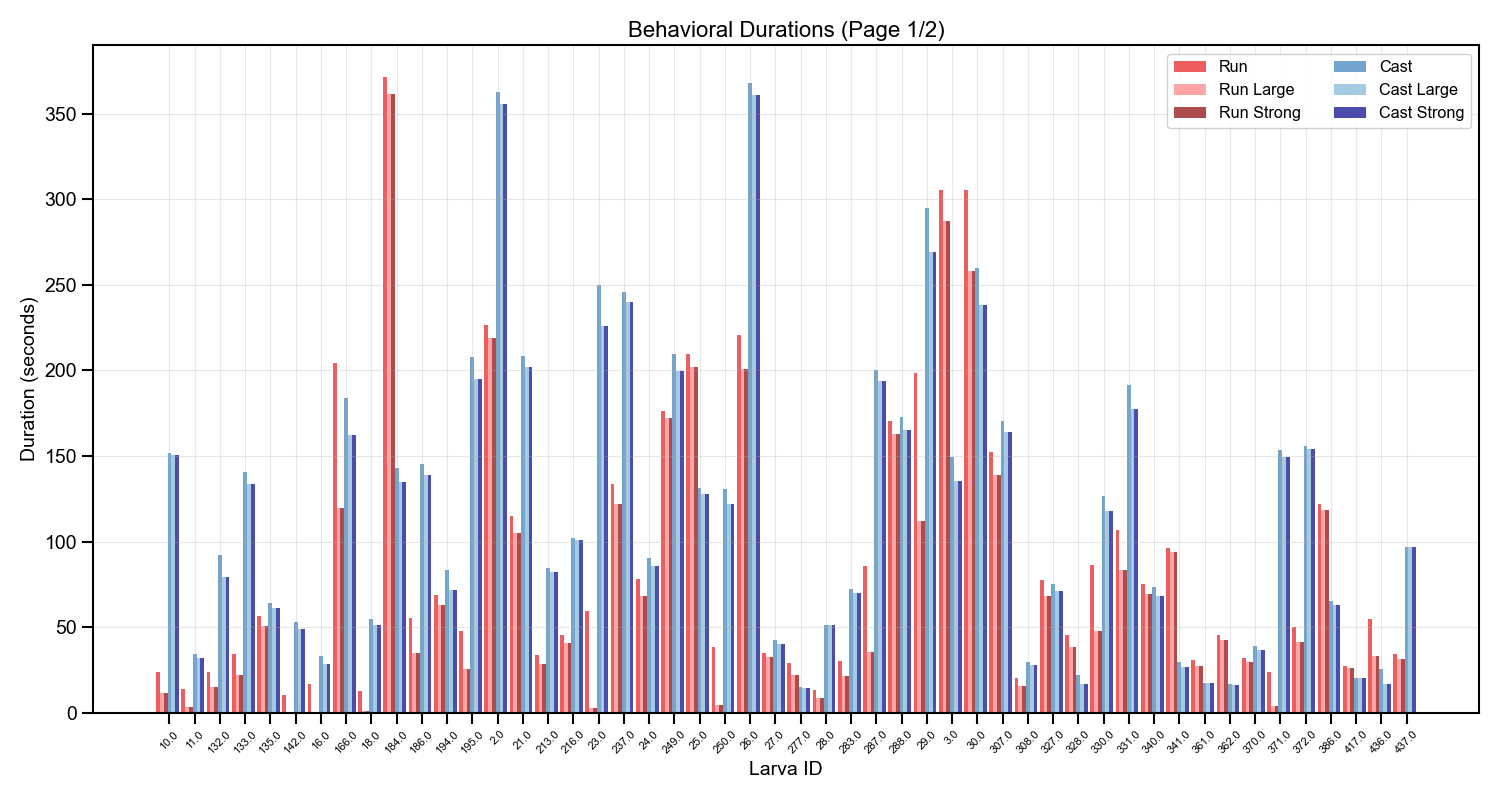

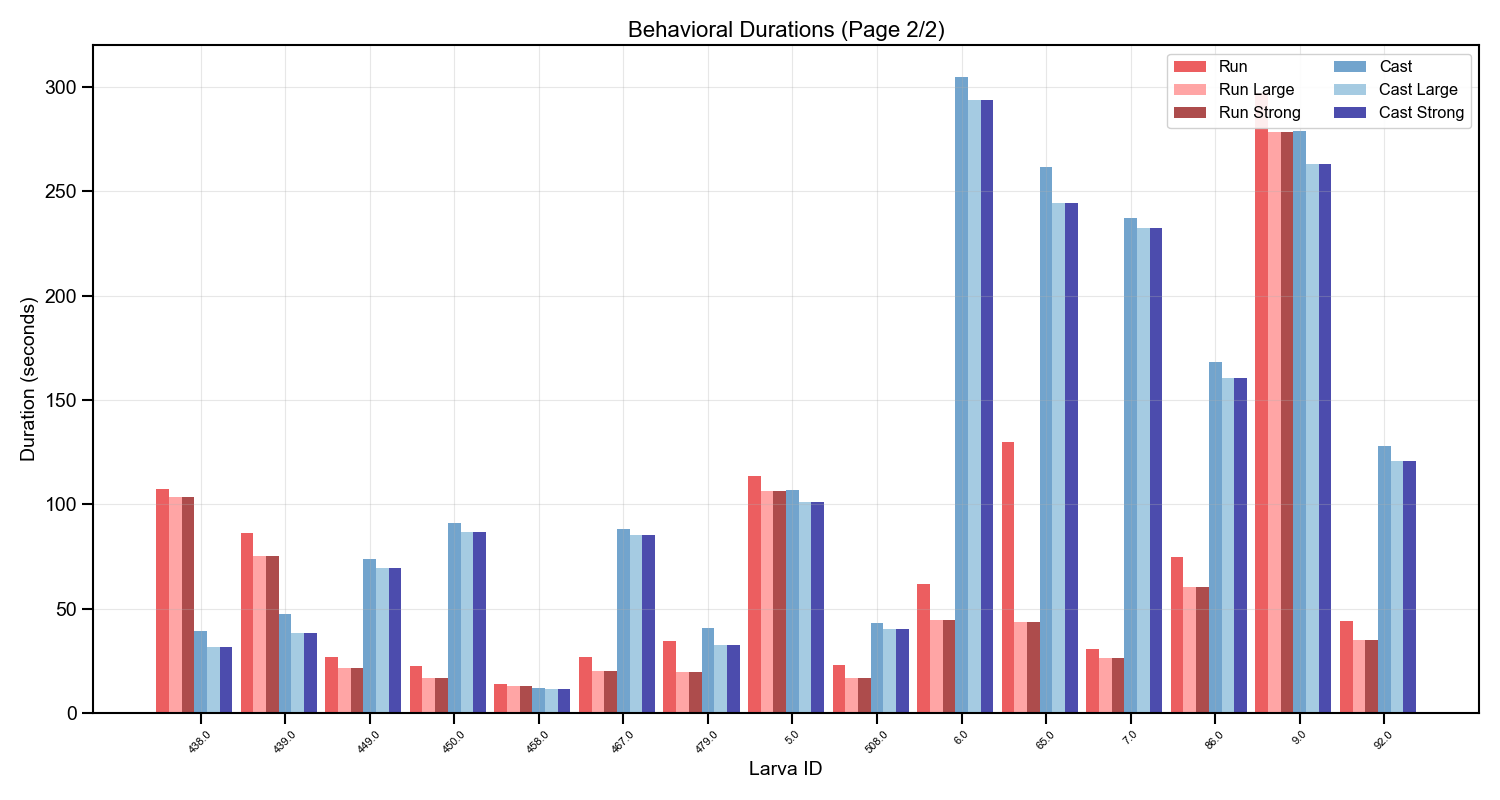

In [111]:
# # Usage
threshold = 200  # 3 minutes
# filtered_trx_data = filter_larvae_by_duration(trx_data, threshold)
plot_behavioural_metrics(trx_data)

In [ ]:
def plot_spine_behaviors(trx_data, larva_id):
    """Plot head, tail, and center points during run and cast behaviours."""
    plt.ioff()
    
    # Get data for this larva
    larva = trx_data['data'][larva_id]
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_centre = np.array(larva['x_center'])
    y_centre = np.array(larva['y_center'])
    x_contour = np.array(larva['x_contour'])
    y_contour = np.array(larva['y_contour'])
    time = np.array(larva['t'])
    
    # Get behavioural states (-1/1 encoded)
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure with two subplots
    fig = plt.figure(figsize=(12,6))
    gs = plt.GridSpec(1, 2)
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])
    
    # Initialize empty plots for both behaviors
    # Run plots
    run_fill = ax1.fill([], [], 'r', alpha=0.1)[0]
    run_contour, = ax1.plot([], [], 'r-', lw=2, alpha=0.6)
    run_lines, = ax1.plot([], [], 'r-', lw=1, alpha=0.6)
    run_head, = ax1.plot([], [], 'ro', ms=8, label='Head')
    run_tail, = ax1.plot([], [], 'rs', ms=8, label='Tail')
    run_centre, = ax1.plot([], [], 'r^', ms=8, label='Centre')
    
    # Cast plots
    cast_fill = ax2.fill([], [], 'b', alpha=0.1)[0]
    cast_contour, = ax2.plot([], [], 'b-', lw=2, alpha=0.6)
    cast_lines, = ax2.plot([], [], 'b-', lw=1, alpha=0.6)
    cast_head, = ax2.plot([], [], 'bo', ms=8, label='Head')
    cast_tail, = ax2.plot([], [], 'bs', ms=8, label='Tail')
    cast_centre, = ax2.plot([], [], 'b^', ms=8, label='Centre')
    
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    
    def update(frame):
        # Get spine points for current frame
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        contour_x = x_contour[:, frame]
        contour_y = y_contour[:, frame]
        
        x_points = [head_x, centre_x, tail_x]
        y_points = [head_y, centre_y, tail_y]
        
        points = np.array([[head_x, head_y], [tail_x, tail_y], [centre_x, centre_y]])
        center = np.mean(points, axis=0)
        max_dist = np.max(np.linalg.norm(points - center, axis=1))
        window_size = max_dist * 3
        
        if frame in run_frames:
            run_fill.set_xy(np.column_stack([contour_x, contour_y]))
            run_contour.set_data(contour_x, contour_y)
            run_lines.set_data(x_points, y_points)
            run_head.set_data([head_x], [head_y])
            run_tail.set_data([tail_x], [tail_y])
            run_centre.set_data([centre_x], [centre_y])
            ax1.set_xlim(center[0] - window_size, center[0] + window_size)
            ax1.set_ylim(center[1] - window_size, center[1] + window_size)
            ax1.set_title(f'Run Behaviour (t={time[frame]:.2f}s)', fontsize=12)
        else:
            run_fill.set_xy(np.empty((0, 2)))
            run_contour.set_data([], [])
            run_lines.set_data([], [])
            run_head.set_data([], [])
            run_tail.set_data([], [])
            run_centre.set_data([], [])
            ax1.set_title('Run Behaviour (inactive)', fontsize=12)
        
        if frame in cast_frames:
            cast_fill.set_xy(np.column_stack([contour_x, contour_y]))
            cast_contour.set_data(contour_x, contour_y)
            cast_lines.set_data(x_points, y_points)
            cast_head.set_data([head_x], [head_y])
            cast_tail.set_data([tail_x], [tail_y])
            cast_centre.set_data([centre_x], [centre_y])
            ax2.set_xlim(center[0] - window_size, center[0] + window_size)
            ax2.set_ylim(center[1] - window_size, center[1] + window_size)
            ax2.set_title(f'Cast Behaviour (t={time[frame]:.2f}s)', fontsize=12)
        else:
            cast_fill.set_xy(np.empty((0, 2)))
            cast_contour.set_data([], [])
            cast_lines.set_data([], [])
            cast_head.set_data([], [])
            cast_tail.set_data([], [])
            cast_centre.set_data([], [])
            ax2.set_title('Cast Behaviour (inactive)', fontsize=12)
        
        return (run_fill, run_contour, run_lines, run_head, run_tail, run_centre,
                cast_fill, cast_contour, cast_lines, cast_head, cast_tail, cast_centre)
    
    # Create interactive controls
    play = widgets.Play(
        value=0,
        min=0,
        max=len(time) - 1,
        step=1,
        interval=50,
        description="Play"
    )
    
    slider = widgets.IntSlider(
        min=0,
        max=len(time) - 1,
        description='Frame:',
        value=0,
        style={'description_width': 'initial'},
        readout_format='d',
        layout=widgets.Layout(width='1000px')
    )
    
    # Link play and slider
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    def update_plot(change):
        if change['type'] == 'change' and change['name'] == 'value':
            update(change['new'])
            fig.canvas.draw_idle()
    
    # Add legends
    ax1.legend()
    ax2.legend()
    
    # Connect events
    slider.observe(update_plot)
    
    # Display controls and figure
    display(widgets.HBox([play, slider]))
    
    # Initialize plot
    update_plot({'type': 'change', 'name': 'value', 'new': 0})
    
    plt.tight_layout()
    display(fig.canvas)

def save_spine_behaviors_video(trx_data, larva_id, output_path='../results/spine_behaviors.mp4', fps=20):
    """Save spine behaviors animation as video."""
    plt.ioff()
    
    # Get data for this larva
    larva = trx_data['data'][larva_id]
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_centre = np.array(larva['x_center'])
    y_centre = np.array(larva['y_center'])
    x_contour = np.array(larva['x_contour'])
    y_contour = np.array(larva['y_contour'])
    time = np.array(larva['t'])
    
    # Get behavioural states
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure
    fig = plt.figure(figsize=(12,6))
    gs = plt.GridSpec(1, 2)
    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[0, 1])
    
    # Initialize plots
    # Run plots
    run_fill = ax1.fill([], [], 'r', alpha=0.1)[0]
    run_contour, = ax1.plot([], [], 'r-', lw=2, alpha=0.6)
    run_lines, = ax1.plot([], [], 'r-', lw=1, alpha=0.6)
    run_head, = ax1.plot([], [], 'ro', ms=8, label='Head')
    run_tail, = ax1.plot([], [], 'rs', ms=8, label='Tail')
    run_centre, = ax1.plot([], [], 'r^', ms=8, label='Centre')
    
    # Cast plots
    cast_fill = ax2.fill([], [], 'b', alpha=0.1)[0]
    cast_contour, = ax2.plot([], [], 'b-', lw=2, alpha=0.6)
    cast_lines, = ax2.plot([], [], 'b-', lw=1, alpha=0.6)
    cast_head, = ax2.plot([], [], 'bo', ms=8, label='Head')
    cast_tail, = ax2.plot([], [], 'bs', ms=8, label='Tail')
    cast_centre, = ax2.plot([], [], 'b^', ms=8, label='Centre')
    
    ax1.set_aspect('equal')
    ax2.set_aspect('equal')
    
    def update(frame):
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        contour_x = x_contour[:, frame]
        contour_y = y_contour[:, frame]
        
        x_points = [head_x, centre_x, tail_x]
        y_points = [head_y, centre_y, tail_y]
        
        points = np.array([[head_x, head_y], [tail_x, tail_y], [centre_x, centre_y]])
        center = np.mean(points, axis=0)
        max_dist = np.max(np.linalg.norm(points - center, axis=1))
        window_size = max_dist * 3
        
        if frame in run_frames:
            run_fill.set_xy(np.column_stack([contour_x, contour_y]))
            run_contour.set_data(contour_x, contour_y)
            run_lines.set_data(x_points, y_points)
            run_head.set_data([head_x], [head_y])
            run_tail.set_data([tail_x], [tail_y])
            run_centre.set_data([centre_x], [centre_y])
            ax1.set_xlim(center[0] - window_size, center[0] + window_size)
            ax1.set_ylim(center[1] - window_size, center[1] + window_size)
            ax1.set_title(f'Run Behaviour (t={time[frame]:.2f}s)', fontsize=12)
        else:
            run_fill.set_xy(np.empty((0, 2)))
            run_contour.set_data([], [])
            run_lines.set_data([], [])
            run_head.set_data([], [])
            run_tail.set_data([], [])
            run_centre.set_data([], [])
            ax1.set_title('Run Behaviour (inactive)', fontsize=12)
        
        if frame in cast_frames:
            cast_fill.set_xy(np.column_stack([contour_x, contour_y]))
            cast_contour.set_data(contour_x, contour_y)
            cast_lines.set_data(x_points, y_points)
            cast_head.set_data([head_x], [head_y])
            cast_tail.set_data([tail_x], [tail_y])
            cast_centre.set_data([centre_x], [centre_y])
            ax2.set_xlim(center[0] - window_size, center[0] + window_size)
            ax2.set_ylim(center[1] - window_size, center[1] + window_size)
            ax2.set_title(f'Cast Behaviour (t={time[frame]:.2f}s)', fontsize=12)
        else:
            cast_fill.set_xy(np.empty((0, 2)))
            cast_contour.set_data([], [])
            cast_lines.set_data([], [])
            cast_head.set_data([], [])
            cast_tail.set_data([], [])
            cast_centre.set_data([], [])
            ax2.set_title('Cast Behaviour (inactive)', fontsize=12)
        
        return (run_fill, run_contour, run_lines, run_head, run_tail, run_centre,
                cast_fill, cast_contour, cast_lines, cast_head, cast_tail, cast_centre)
    
    # Add legends
    ax1.legend()
    ax2.legend()
    
    # Create animation
    anim = animation.FuncAnimation(
        fig, update,
        frames=range(len(time)),
        interval=1000/fps,
        blit=True
    )
    
    # Set up writer and save
    writer = animation.FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    print(f"Saving video for larva {larva_id}...")
    anim.save(output_path, writer=writer)
    print("Video saved successfully!")
    plt.close()


# Example usage:
first_larva = sorted(trx_data['data'].keys())[2]
plot_spine_behaviors(trx_data, first_larva)

# Save the video
save_spine_behaviors_video(filtered_trx_data, first_larva, '../results/spine_behaviors.mp4', fps=20)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [117]:
np.array(trx_data['data'][first_larva]['x_contour'])

array([110.565, 110.565, 110.565, ...,     nan,     nan,     nan],
      shape=(894000,))

## Important for direction calculation
As Tihana said, sometimes head and tail are exchanged, so in that case, direction calculation may be misinterpreted. CHECK FOR THIS

In [ ]:
def classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames):
    """
    Classify cast directions as left or right based on head position relative to tail-centre vector.
    Returns dictionary with cast direction counts and percentages.
    """
    directions = []
    
    for frame in cast_frames:
        # Get coordinates
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        centre_x, centre_y = x_centre[frame], y_centre[frame]
        
        # Create vectors
        tail_to_centre = np.array([centre_x - tail_x, centre_y - tail_y])
        tail_to_head = np.array([head_x - tail_x, head_y - tail_y])
        
        # Calculate cross product
        cross_product = np.cross(tail_to_centre, tail_to_head)
        
        # Classify direction (positive cross product = left cast)
        directions.append('left' if cross_product > 0 else 'right')
    
    # Calculate statistics
    total_casts = len(directions)
    left_casts = directions.count('left')
    right_casts = directions.count('right')
    
    stats = {
        'total_casts': total_casts,
        'left_casts': left_casts,
        'right_casts': right_casts,
        'left_percentage': (left_casts / total_casts * 100) if total_casts > 0 else 0,
        'right_percentage': (right_casts / total_casts * 100) if total_casts > 0 else 0
    }
    
    return stats

def analyze_all_larvae_cast_directions(trx_data):
    """Analyze cast directions for all larvae."""
    results = {}
    
    for larva_id in sorted(trx_data['data'].keys()):
        larva = trx_data['data'][larva_id]
        
        # Get necessary data
        x_spine = np.array(larva['x_spine'])
        y_spine = np.array(larva['y_spine'])
        x_centre = np.array(larva['x_center'])
        y_centre = np.array(larva['y_center'])
        cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
        
        # Calculate statistics
        stats = classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames)
        results[larva_id] = stats
    
    # Print summary
    print("\nCast Direction Analysis for All Larvae:")
    print("-" * 50)
    for larva_id, stats in results.items():
        print(f"\nLarva {larva_id}:")
        print(f"Total casts: {stats['total_casts']}")
        print(f"Left casts: {stats['left_casts']} ({stats['left_percentage']:.1f}%)")
        print(f"Right casts: {stats['right_casts']} ({stats['right_percentage']:.1f}%)")
    
    return results

# Run analysis
cast_direction_results = analyze_all_larvae_cast_directions(filtered_trx_data)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
# def plot_cast_statistics(results):
#     """Plot cast direction statistics for all larvae with percentages."""
    
#     # Get data for plotting
#     larva_ids = list(results.keys())
#     left_casts = [results[lid]['left_casts'] for lid in larva_ids]
#     right_casts = [results[lid]['right_casts'] for lid in larva_ids]
#     total_per_larva = [l + r for l, r in zip(left_casts, right_casts)]
    
#     # Calculate percentages
#     left_percentages = [l/t*100 if t > 0 else 0 for l, t in zip(left_casts, total_per_larva)]
#     right_percentages = [r/t*100 if t > 0 else 0 for r, t in zip(right_casts, total_per_larva)]
    
#     # Create figure with three subplots
#     fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), 
#                                        height_ratios=[3, 3, 1])
    
#     # Plot 1: Raw numbers
#     x = np.arange(len(larva_ids))
#     width = 0.35
    
#     ax1.bar(x - width/2, left_casts, width, label='Left Casts', 
#             color='lightblue')
#     ax1.bar(x + width/2, right_casts, width, label='Right Casts', 
#             color='salmon')
    
#     ax1.set_ylabel('Number of Casts')
#     ax1.set_title('Cast Directions by Larva (Raw Numbers)')
#     ax1.set_xticks(x)
#     ax1.set_xticklabels(larva_ids, rotation=45, fontsize=10)
#     ax1.legend()
    
#     # Plot 2: Percentages
#     ax2.bar(x - width/2, left_percentages, width, 
#             label='Left Casts %', color='lightblue')
#     ax2.bar(x + width/2, right_percentages, width, 
#             label='Right Casts %', color='salmon')
    
#     ax2.set_ylabel('Percentage of Casts')
#     ax2.set_title('Cast Directions by Larva (Percentages)')
#     ax2.set_xticks(x)
#     ax2.set_xticklabels(larva_ids, rotation=45, fontsize=10)
#     ax2.legend()
#     ax2.set_ylim(0, 100)
    
#     # Statistics table
#     total_left = sum(left_casts)
#     total_right = sum(right_casts)
#     total_casts = total_left + total_right
    
#     stats_text = [
#         f"Total Casts: {total_casts}",
#         f"Left Casts: {total_left} ({total_left/total_casts*100:.1f}%)",
#         f"Right Casts: {total_right} ({total_right/total_casts*100:.1f}%)",
#         f"Left/Right Ratio: {total_left/total_right:.2f}",
#         f"Chi-square p-value: {stats.chisquare([total_left, total_right])[1]:.3f}"
#     ]
    
#     ax3.axis('off')
#     ax3.text(0.1, 0.5, '\n'.join(stats_text), 
#              fontsize=12, fontfamily='monospace',
#              verticalalignment='center')
    
#     plt.tight_layout()
#     plt.show()

# # Required imports
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats

# # Run analysis and plot results
# cast_direction_results = analyze_all_larvae_cast_directions(trx_data)
# plot_cast_statistics(cast_direction_results)

In [ ]:
# # Filter larvae based on duration threshold
# filtered_trx_data = filter_larvae_by_duration(trx_data, threshold)

# # Run analysis and plot results for filtered larvae
# cast_direction_results = analyze_all_larvae_cast_directions(filtered_trx_data)
# plot_cast_statistics(cast_direction_results)

## NOW, look at upstream v/s downstream head casts
Instead of left and right head casts, which ... interestingly seem unbiased, define upstream and downstream, by getting the cross product with the unit vector in the wind direction (x-axis).

In [56]:
# def analyze_all_larvae_cast_directions(trx_data):
#     """Analyze cast directions for all larvae."""
#     results = {}
    
#     for larva_id in sorted(trx_data['data'].keys()):
#         larva = trx_data['data'][larva_id]
        
#         # Get necessary data
#         x_spine = np.array(larva['x_spine'])
#         y_spine = np.array(larva['y_spine'])
#         x_centre = np.array(larva['x_center'])
#         y_centre = np.array(larva['y_center'])
#         cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
        
#         # Calculate statistics
#         stats = classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames)
#         results[larva_id] = stats
    
#         # Print summary with updated keys
#         print(f"\nLarva {larva_id}:")
#         print(f"Total casts: {stats['total_casts']}")
#         print(f"Upstream casts: {stats['upstream_casts']} ({stats['upstream_percentage']:.1f}%)")
#         print(f"Downstream casts: {stats['downstream_casts']} ({stats['downstream_percentage']:.1f}%)")
    
#     return results

In [57]:
# path

In [58]:
# def classify_cast_direction(x_spine, y_spine, x_centre, y_centre, cast_frames):
#     """
#     Classify cast directions as downstream/upstream based on head position 
#     relative to tail-centre vector and x-axis reference.
#     """
#     directions = []
#     x_axis = np.array([-1, 0])  # Reference vector pointing right (negative x-direction = downstream)
    
#     for frame in cast_frames:
#         # Get coordinates
#         tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
#         head_x, head_y = x_spine[0, frame], y_spine[0, frame]
#         centre_x, centre_y = x_centre[frame], y_centre[frame]
        
#         # Create vectors
#         tail_to_centre = np.array([centre_x - tail_x, centre_y - tail_y])
#         centre_to_head = np.array([head_x - centre_x, head_y - centre_y])
        
#         # Calculate cross product with x-axis
#         cross_product = np.cross(x_axis, centre_to_head)
        
#         # Reverse the classification: positive cross product = upstream
#         directions.append('upstream' if cross_product > 0 else 'downstream')
    
#     # Calculate statistics
#     total_casts = len(directions)
#     upstream_casts = directions.count('upstream')
#     downstream_casts = directions.count('downstream')
    
#     stats = {
#         'total_casts': total_casts,
#         'upstream_casts': upstream_casts,
#         'downstream_casts': downstream_casts,
#         'upstream_percentage': (upstream_casts / total_casts * 100) if total_casts > 0 else 0,
#         'downstream_percentage': (downstream_casts / total_casts * 100) if total_casts > 0 else 0
#     }
    
#     return stats

# def plot_cast_statistics(results):
#     """Plot cast direction statistics for all larvae with percentages."""
    
#     # Get data for plotting
#     larva_ids = list(results.keys())
#     upstream_casts = [results[lid]['upstream_casts'] for lid in larva_ids]
#     downstream_casts = [results[lid]['downstream_casts'] for lid in larva_ids]
#     total_per_larva = [u + d for u, d in zip(upstream_casts, downstream_casts)]
    
#     # Calculate percentages
#     upstream_percentages = [u/t*100 if t > 0 else 0 for u, t in zip(upstream_casts, total_per_larva)]
#     downstream_percentages = [d/t*100 if t > 0 else 0 for d, t in zip(downstream_casts, total_per_larva)]
    
#     # Create figure with three subplots
#     fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), 
#                                        height_ratios=[3, 3, 1])
    
#     # Plot 1: Raw numbers
#     x = np.arange(len(larva_ids))
#     width = 0.35
    
#     ax1.bar(x - width/2, upstream_casts, width, label='Upstream Casts', 
#             color='lightgreen')
#     ax1.bar(x + width/2, downstream_casts, width, label='Downstream Casts', 
#             color='lightpink')
    
#     ax1.set_ylabel('Number of Casts')
#     ax1.set_title('Cast Directions by Larva (Raw Numbers)')
#     ax1.set_xticks(x)
#     ax1.set_xticklabels(larva_ids, rotation=45, fontsize=10)
#     ax1.legend()
    
#     # Plot 2: Percentages
#     ax2.bar(x - width/2, upstream_percentages, width, 
#             label='Upstream Casts %', color='lightgreen')
#     ax2.bar(x + width/2, downstream_percentages, width, 
#             label='Downstream Casts %', color='lightpink')
    
#     ax2.set_ylabel('Percentage of Casts')
#     ax2.set_title('Cast Directions by Larva (Percentages)')
#     ax2.set_xticks(x)
#     ax2.set_xticklabels(larva_ids, rotation=45,fontsize=10)
#     ax2.legend()
#     ax2.set_ylim(0, 100)
    
#     # Statistics table
#     total_upstream = sum(upstream_casts)
#     total_downstream = sum(downstream_casts)
#     total_casts = total_upstream + total_downstream
    
#     stats_text = [
#         f"Total Casts: {total_casts}",
#         f"Upstream Casts: {total_upstream} ({total_upstream/total_casts*100:.1f}%)",
#         f"Downstream Casts: {total_downstream} ({total_downstream/total_casts*100:.1f}%)",
#         f"Upstream/Downstream Ratio: {total_upstream/total_downstream:.2f}",
#         f"Chi-square p-value: {stats.chisquare([total_upstream, total_downstream])[1]:.3f}"
#     ]
    
#     ax3.axis('off')
#     ax3.text(0.1, 0.5, '\n'.join(stats_text), 
#              fontsize=12, fontfamily='monospace',
#              verticalalignment='center')
    
#     plt.tight_layout()
#     plt.show()

# # Required imports
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats

# # Run analysis and plot results
# cast_direction_results = analyze_all_larvae_cast_directions(trx_data)
# plot_cast_statistics(cast_direction_results)

In [59]:
# # Run analysis and plot results for filtered larvae
# cast_direction_results = analyze_all_larvae_cast_directions(filtered_trx_data)
# plot_cast_statistics(cast_direction_results)

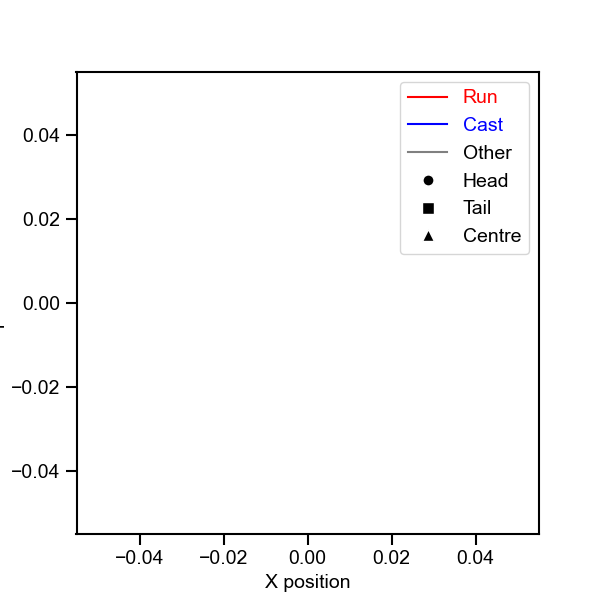

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [88]:
# Required imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import ipywidgets as widgets
from IPython.display import display
from matplotlib.lines import Line2D

def plot_behavioral_contour(trx_data, larva_id='1.0'):
    """Plot filled larva contour with colors indicating behavioral state and spine points."""
    plt.ioff()
    
    # Get data
    larva = trx_data['data'][larva_id]
    x_contour = np.array(larva['x_contour'])
    y_contour = np.array(larva['y_contour'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    time = np.array(larva['t'])
    
    # Get behavioral states
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure

    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Initialize empty contour and fill
    contour_line, = ax.plot([], [], 'k-', linewidth=2)
    contour_fill = ax.fill([], [], color='gray', alpha=0.3)[0]
    
    # Initialize spine points
    spine_line, = ax.plot([], [], '-', lw=1, alpha=0.6)
    head_point, = ax.plot([], [], 'o', ms=8)
    tail_point, = ax.plot([], [], 's', ms=8)
    center_point, = ax.plot([], [], '^', ms=8)
    
    # Create legend with colored text
    legend_elements = [
        Line2D([0], [0], color='red', label='Run'),
        Line2D([0], [0], color='blue', label='Cast'),
        Line2D([0], [0], color='gray', label='Other'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='Head'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='Tail'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='Centre')
    ]
    leg = ax.legend(handles=legend_elements)
    leg.get_texts()[0].set_color('red')
    leg.get_texts()[1].set_color('blue')
    
    window_size = 2
    
    def update(frame):
        # Get contour and spine points for current frame
        x_frame = x_contour[:, frame]
        y_frame = y_contour[:, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        center_x, center_y = x_center[frame], y_center[frame]
        
        # Set color based on behavioral state
        if frame in run_frames:
            color = 'red'
        elif frame in cast_frames:
            color = 'blue'
        else:
            color = 'gray'
        
        # Update contour
        contour_line.set_data(x_frame, y_frame)
        contour_line.set_color(color)
        contour_fill.set_xy(np.column_stack([x_frame, y_frame]))
        contour_fill.set_color(color)
        
        # Update spine points
        spine_line.set_data([head_x, center_x, tail_x], [head_y, center_y, tail_y])
        head_point.set_data([head_x], [head_y])
        tail_point.set_data([tail_x], [tail_y])
        center_point.set_data([center_x], [center_y])
        
        # Set colors for spine points and line
        spine_line.set_color(color)
        head_point.set_color(color)
        tail_point.set_color(color)
        center_point.set_color(color)
        
        # Center view on larva
        ax.set_xlim(center_x - window_size, center_x + window_size)
        ax.set_ylim(center_y - window_size, center_y + window_size)
        
        ax.set_title(f'Time: {time[frame]:.2f}s')
        return (contour_line, contour_fill, spine_line, 
                head_point, tail_point, center_point)
    
    # Create interactive controls
    play = widgets.Play(
        value=0,
        min=0,
        max=len(time) - 1,
        step=1,
        interval=50,
        description="Play"
    )
    
    slider = widgets.IntSlider(
        min=0,
        max=len(time) - 1,
        description='Frame:',
        value=0,
        style={'description_width': 'initial'},
        readout_format='d',
        layout=widgets.Layout(width='1000px')
    )
    
    # Link play and slider
    widgets.jslink((play, 'value'), (slider, 'value'))
    
    def update_plot(change):
        if change['type'] == 'change' and change['name'] == 'value':
            update(change['new'])
            fig.canvas.draw_idle()
    
    # Set axes properties
    ax.set_aspect('equal')
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    
    # Connect events
    slider.observe(update_plot)
    
    # Display controls and figure
    display(widgets.HBox([play, slider]))
    display(fig.canvas)
    
    # Initialize plot
    update_plot({'type': 'change', 'name': 'value', 'new': 0})
    
    plt.tight_layout()

def save_behavioral_contour_video(trx_data, larva_id='1.0', output_path='../results/behavioral_contour.mp4', fps=20):
    """Save color-coded behavioral contour animation with spine points as video."""
    plt.ioff()
    
    # Get data
    larva = trx_data['data'][larva_id]
    x_contour = np.array(larva['x_contour'])
    y_contour = np.array(larva['y_contour'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    time = np.array(larva['t'])
    
    # Get behavioral states
    run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
    cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Initialize empty contour and fill
    contour_line, = ax.plot([], [], 'k-', linewidth=2)
    contour_fill = ax.fill([], [], color='gray', alpha=0.3)[0]
    
    # Initialize spine points
    spine_line, = ax.plot([], [], '-', lw=1, alpha=0.6)
    head_point, = ax.plot([], [], 'o', ms=8)
    tail_point, = ax.plot([], [], 's', ms=8)
    center_point, = ax.plot([], [], '^', ms=8)
    
    # Create legend with colored text
    legend_elements = [
        Line2D([0], [0], color='red', label='Run'),
        Line2D([0], [0], color='blue', label='Cast'),
        Line2D([0], [0], color='gray', label='Other'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='Head'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='Tail'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='Centre')
    ]
    leg = ax.legend(handles=legend_elements)
    leg.get_texts()[0].set_color('red')
    leg.get_texts()[1].set_color('blue')
    
    window_size = 2
    
    def update(frame):
        # Get contour and spine points for current frame
        x_frame = x_contour[:, frame]
        y_frame = y_contour[:, frame]
        head_x, head_y = x_spine[0, frame], y_spine[0, frame]
        tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
        center_x, center_y = x_center[frame], y_center[frame]
        
        # Set color based on behavioral state
        if frame in run_frames:
            color = 'red'
        elif frame in cast_frames:
            color = 'blue'
        else:
            color = 'gray'
        
        # Update contour
        contour_line.set_data(x_frame, y_frame)
        contour_line.set_color(color)
        contour_fill.set_xy(np.column_stack([x_frame, y_frame]))
        contour_fill.set_color(color)
        
        # Update spine points
        spine_line.set_data([head_x, center_x, tail_x], [head_y, center_y, tail_y])
        head_point.set_data([head_x], [head_y])
        tail_point.set_data([tail_x], [tail_y])
        center_point.set_data([center_x], [center_y])
        
        # Set colors for spine points and line
        spine_line.set_color(color)
        head_point.set_color(color)
        tail_point.set_color(color)
        center_point.set_color(color)
        
        # Center view on larva
        ax.set_xlim(center_x - window_size, center_x + window_size)
        ax.set_ylim(center_y - window_size, center_y + window_size)
        
        ax.set_title(f'Time: {time[frame]:.2f}s')
        return (contour_line, contour_fill, spine_line, 
                head_point, tail_point, center_point)
    
    # Set axes properties
    ax.set_aspect('equal')
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    
    # Create animation
    anim = animation.FuncAnimation(
        fig, update,
        frames=range(len(time)),
        interval=1000/fps,
        blit=True
    )
    
    # Set up writer and save
    writer = animation.FFMpegWriter(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    print(f"Saving video for larva {larva_id}...")
    anim.save(output_path, writer=writer)
    print("Video saved successfully!")
    plt.close()

# Example usage
first_larva = sorted(trx_data['data'].keys())[1]
plot_behavioral_contour(trx_data, first_larva)


In [61]:
# save_behavioral_contour_video(trx_data, first_larva, '../results/behavioral_contour.mp4', fps=50)

In [62]:
# def plot_behavioral_contour_with_global_trajectory(trx_data, larva_id='1.0'):
#     """Plot filled larva contour with colors indicating behavioral state and spine points,
#     alongside global trajectory."""
#     plt.ioff()
    
#     # Get data
#     larva = trx_data['data'][larva_id]
#     x_contour = np.array(larva['x_contour'])
#     y_contour = np.array(larva['y_contour'])
#     x_center = np.array(larva['x_center'])
#     y_center = np.array(larva['y_center'])
#     x_spine = np.array(larva['x_spine'])
#     y_spine = np.array(larva['y_spine'])
#     time = np.array(larva['t'])
    
#     # Get behavioral states
#     run_frames = np.where((np.array(larva['run']) + 1) / 2)[0]
#     cast_frames = np.where((np.array(larva['cast']) + 1) / 2)[0]
    
#     # Create figure with two subplots
#     fig = plt.figure(figsize=(12, 6))
#     gs = fig.add_gridspec(1, 2, width_ratios=[1, 1])
#     ax1 = fig.add_subplot(gs[0])  # Contour plot
#     ax2 = fig.add_subplot(gs[1])  # Global trajectory
    
#     # Initialize empty contour and fill (left panel)
#     contour_line, = ax1.plot([], [], 'k-', linewidth=2)
#     contour_fill = ax1.fill([], [], color='gray', alpha=0.3)[0]
    
#     # Initialize spine points (left panel)
#     spine_line, = ax1.plot([], [], '-', lw=1, alpha=0.6)
#     head_point, = ax1.plot([], [], 'o', ms=8)
#     tail_point, = ax1.plot([], [], 's', ms=8)
#     center_point, = ax1.plot([], [], '^', ms=8)
    
#     # Initialize trajectory plot (right panel)
#     trajectory_line, = ax2.plot(x_center, y_center, 'k-', alpha=0.3, linewidth=1)
#     current_pos, = ax2.plot([], [], 'o', ms=8)
    
#     # Create legend with colored text
#     legend_elements = [
#         Line2D([0], [0], color='red', label='Run'),
#         Line2D([0], [0], color='blue', label='Cast'),
#         Line2D([0], [0], color='gray', label='Other'),
#         Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=8, label='Head'),
#         Line2D([0], [0], marker='s', color='w', markerfacecolor='k', markersize=8, label='Tail'),
#         Line2D([0], [0], marker='^', color='w', markerfacecolor='k', markersize=8, label='Centre')
#     ]
#     leg = ax1.legend(handles=legend_elements)
#     leg.get_texts()[0].set_color('red')
#     leg.get_texts()[1].set_color('blue')
    
#     window_size = 2
    
#     def update(frame):
#         # Get contour and spine points for current frame
#         x_frame = x_contour[:, frame]
#         y_frame = y_contour[:, frame]
#         head_x, head_y = x_spine[0, frame], y_spine[0, frame]
#         tail_x, tail_y = x_spine[-1, frame], y_spine[-1, frame]
#         center_x, center_y = x_center[frame], y_center[frame]
        
#         # Set color based on behavioral state
#         if frame in run_frames:
#             color = 'red'
#         elif frame in cast_frames:
#             color = 'blue'
#         else:
#             color = 'gray'
        
#         # Update contour (left panel)
#         contour_line.set_data(x_frame, y_frame)
#         contour_line.set_color(color)
#         contour_fill.set_xy(np.column_stack([x_frame, y_frame]))
#         contour_fill.set_color(color)
        
#         # Update spine points (left panel)
#         spine_line.set_data([head_x, center_x, tail_x], [head_y, center_y, tail_y])
#         head_point.set_data([head_x], [head_y])
#         tail_point.set_data([tail_x], [tail_y])
#         center_point.set_data([center_x], [center_y])
        
#         # Update current position on trajectory (right panel)
#         current_pos.set_data([center_x], [center_y])
#         current_pos.set_color(color)
        
#         # Set colors for spine points and line
#         spine_line.set_color(color)
#         head_point.set_color(color)
#         tail_point.set_color(color)
#         center_point.set_color(color)
        
#         # Center view on larva (left panel)
#         ax1.set_xlim(center_x - window_size, center_x + window_size)
#         ax1.set_ylim(center_y - window_size, center_y + window_size)
        
#         ax1.set_title(f'Time: {time[frame]:.2f}s')
#         return (contour_line, contour_fill, spine_line, 
#                 head_point, tail_point, center_point, current_pos)
    
#     # Create interactive controls
#     play = widgets.Play(
#         value=0,
#         min=0,
#         max=len(time) - 1,
#         step=1,
#         interval=50,
#         description="Play"
#     )
    
#     slider = widgets.IntSlider(
#         min=0,
#         max=len(time) - 1,
#         description='Frame:',
#         value=0,
#         style={'description_width': 'initial'},
#         readout_format='d',
#         layout=widgets.Layout(width='1000px')
#     )
    
#     # Link play and slider
#     widgets.jslink((play, 'value'), (slider, 'value'))
    
#     def update_plot(change):
#         if change['type'] == 'change' and change['name'] == 'value':
#             update(change['new'])
#             fig.canvas.draw_idle()
    
#     # Set axes properties
#     ax1.set_aspect('equal')
#     ax1.set_xlabel('X position')
#     ax1.set_ylabel('Y position')
#     ax1.set_title('Larva contour')
    
#     ax2.set_aspect('equal')
#     ax2.set_xlabel('X position')
#     ax2.set_ylabel('Y position')
#     ax2.set_title('Global trajectory')
    
#     # Connect events
#     slider.observe(update_plot)
    
#     # Display controls and figure
#     display(widgets.HBox([play, slider]))
#     display(fig.canvas)
    
#     # Initialize plot
#     update_plot({'type': 'change', 'name': 'value', 'new': 0})
    
#     plt.tight_layout()

In [63]:
# first_larva = sorted(trx_data['data'].keys())[0]
# plot_behavioral_contour_with_global_trajectory(trx_data, first_larva)

## Calculating probability of run v/s cast as a function of orientation

Define upstream as **against the wind** and define downstream as **with the wind** with the assumption that wind is blowing in the positive X-axis direction.

Now define orientation of the body as follows :

- `angle_width` around the 4 cardinal directions.

In [64]:
# Common code to add to each plotting function before the statistics section:
def get_stacked_significance_height(y_max, test_index, total_tests):
    """Calculate height for stacked significance bars"""
    base_height = y_max * 1.1  # Start 10% above max data
    spacing = y_max * 0.08     # Space between bars is 8% of y_max
    return base_height + (test_index * spacing)


In [65]:
def define_quadrants(angle_width=15):
    """Define quadrant ranges based on specified angle width around cardinal directions.
    
    Args:
        angle_width (float): Half-width of angle range around each cardinal direction
    
    Returns:
        dict: Quadrant definitions and their ranges
    """
    return {
        'upstream': (-angle_width, angle_width),  # around 0°
        'right': (90-angle_width, 90+angle_width),  # around 90°
        'downstream': (180-angle_width, 180+angle_width),  # around 180°/-180°
        'left': (-90-angle_width, -90+angle_width),  # around -90°
        'ambiguous': ()
    }

def get_quadrant(angle, quadrants):
    """Determine which quadrant an angle belongs to.
    
    Args:
        angle (float): Angle in degrees [-180, 180]
        quadrants (dict): Quadrant definitions with ranges
    
    Returns:
        str: Quadrant name ('upstream', 'right', 'downstream', 'left', or 'ambiguous')
    """
    # Normalize angle to [-180, 180]
    angle = ((angle + 180) % 360) - 180
    
    # Check upstream (-15° to +15°)
    if quadrants['upstream'][0] <= angle <= quadrants['upstream'][1]:
        return 'upstream'
    
    # Check right (75° to 105°)
    elif quadrants['right'][0] <= angle <= quadrants['right'][1]:
        return 'right'
    
    # Check left (-105° to -75°)
    elif quadrants['left'][0] <= angle <= quadrants['left'][1]:
        return 'left'
    
    # Check downstream (165° to 180° and -180° to -165°)
    # This handles the discontinuity at ±180°
    elif abs(angle) >= 180 - quadrants['downstream'][1]:
        return 'downstream'
    
    return 'ambiguous'

def calculate_orientation_behavior_probability(trx_data, larva_id, angle_width=15, initial_frames=12):
    """Calculate probabilities of run and cast behaviors based on orientation quadrants.
    
    Args:
        trx_data (dict): Tracking data
        larva_id (str): Larva identifier
        angle_width (float): Half-width of angle range for quadrant definition
        initial_frames (int): Frames to use for orientation calculation
    
    Returns:
        dict: Behavior probabilities by quadrant
    """
    larva = trx_data['data'][larva_id]
    quadrants = define_quadrants(angle_width)
    
    # Get behavioral states and coordinates
    try:
        run = np.array(larva['run'])
        cast = np.array(larva['cast'])
        x_spine = np.array(larva['x_spine'])
        y_spine = np.array(larva['y_spine'])
        x_center = np.array(larva['x_center'])
        y_center = np.array(larva['y_center'])
    except KeyError as e:
        print(f"Missing data for larva {larva_id}: {e}")
        return None
    
    # Calculate vectors and angles
    tail_to_center = np.array([
        x_center - x_spine[-1],  # dx
        y_center - y_spine[-1]   # dy
    ]).T

    center_to_head = np.array([
        x_spine[0] - x_center,   # dx
        y_spine[0] - y_center    # dy
    ]).T

    # Calculate angles relative to negative x-axis (-180° points left, 0° points right)
    orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], -tail_to_center[:, 0]))
    cast_angles = np.degrees(np.arctan2(center_to_head[:, 1], -center_to_head[:, 0]))
    
    # Initialize counters
    counts = {quad: {'total': 0, 'run': 0, 'upstream_cast': 0, 'downstream_cast': 0} 
             for quad in quadrants}
    
    # Process run bouts
    run_starts = np.where((run[1:] - run[:-1]) > 0)[0] + 1
    for start in run_starts:
        end = min(start + initial_frames, len(orientation_angles))
        mean_angle = np.mean(orientation_angles[start:end])
        quad = get_quadrant(mean_angle, quadrants)
        
        counts[quad]['total'] += 1
        counts[quad]['run'] += 1
    
    # Process cast bouts
    cast_starts = np.where((cast[1:] - cast[:-1]) > 0)[0] + 1
    for start in cast_starts:
        end = min(start + initial_frames, len(orientation_angles))
        mean_angle = np.mean(orientation_angles[start:end])
        cast_angle = np.mean(cast_angles[start:end])
        quad = get_quadrant(mean_angle, quadrants)
        
        counts[quad]['total'] += 1
        if -90 <= cast_angle <= 90:
            counts[quad]['downstream_cast'] += 1
        else:
            counts[quad]['upstream_cast'] += 1
    
    # Calculate probabilities
    probabilities = {}
    for quad in quadrants:
        total = counts[quad]['total']
        if total > 0:
            probabilities[quad] = {
                'run': counts[quad]['run'] / total,
                'cast': (counts[quad]['upstream_cast'] + counts[quad]['downstream_cast']) / total,
                'upstream_cast': counts[quad]['upstream_cast'] / total,
                'downstream_cast': counts[quad]['downstream_cast'] / total
            }
        else:
            probabilities[quad] = {
                'run': 0, 'cast': 0,
                'upstream_cast': 0, 'downstream_cast': 0
            }
    
    return probabilities

def plot_run_vs_cast(trx_data, angle_width=15, initial_frames=12):
    """Plot run vs cast probabilities by orientation with stacked significance bars."""
    # Initialize structures
    orientation_labels = {
        'upstream': f'Against wind\n(upstream)\n±{angle_width}°',
        'right': f'Right\n±{angle_width}°',
        'downstream': f'With wind\n(downstream)\n±{angle_width}°',
        'left': f'Left\n±{angle_width}°'
    }
    orientations = ['upstream', 'right', 'downstream', 'left']
    behaviors = ['run', 'cast']
    data = {behavior: {ori: [] for ori in orientations} for behavior in behaviors}
    
    # Collect non-zero probabilities
    for larva_id in trx_data['data'].keys():
        probs = calculate_orientation_behavior_probability(trx_data, larva_id, angle_width, initial_frames)
        if probs:
            for ori in orientations:
                for behavior in behaviors:
                    if probs[ori][behavior] > 0:
                        data[behavior][ori].append(probs[ori][behavior])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10,6))
    positions = np.arange(len(orientations))
    colors = {'run': 'red', 'cast': 'blue'}
    offsets = {'run': -0.2, 'cast': 0.2}
    
    # Plot violins
    for behavior in behaviors:
        parts = ax.violinplot(
            [data[behavior][ori] for ori in orientations],
            positions=positions + offsets[behavior],
            widths=0.3,
            showextrema=False
        )
        for pc in parts['bodies']:
            pc.set_facecolor(colors[behavior])
            pc.set_alpha(0.3)
            pc.set_edgecolor(colors[behavior])
    
    # Add quartile and mean markers
    for i, ori in enumerate(orientations):
        for behavior in behaviors:
            pos = i + offsets[behavior]
            d = data[behavior][ori]
            if len(d) > 0:
                q1, median, q3 = np.percentile(d, [25, 50, 75])
                mean = np.mean(d)
                
                ax.plot([pos-0.1, pos+0.1], [q1, q1], '-', color=colors[behavior], linewidth=2)
                ax.plot([pos-0.1, pos+0.1], [q3, q3], '-', color=colors[behavior], linewidth=2)
                ax.plot([pos-0.15, pos+0.15], [median, median], '-', color=colors[behavior], linewidth=2.5)
                ax.plot(pos, mean, '*', color=colors[behavior], markersize=10)
    
    # Add scatter points
    for i, ori in enumerate(orientations):
        for behavior in behaviors:
            d = data[behavior][ori]
            if len(d) > 0:
                ax.scatter(
                    np.full_like(d, i + offsets[behavior]) +
                    np.random.normal(0, 0.02, size=len(d)),
                    d, color=colors[behavior], alpha=0.2, s=20
                )
    
    # Collect significance tests
    significance_tests = []
    
    # Within-orientation comparisons
    for i, ori in enumerate(orientations):
        if len(data['run'][ori]) > 0 and len(data['cast'][ori]) > 0:
            t_stat, p_val = stats.ttest_ind(data['run'][ori], data['cast'][ori])
            if p_val < 0.05:
                significance_tests.append({
                    'x1': i + offsets['run'],
                    'x2': i + offsets['cast'],
                    'p_val': p_val,
                    'type': 'within',
                    'height_index': 0
                })
    
    # Cross-orientation comparisons
    for behavior in behaviors:
        for i, ori1 in enumerate(orientations[:-1]):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                if len(data[behavior][ori1]) > 0 and len(data[behavior][ori2]) > 0:
                    t_stat, p_val = stats.ttest_ind(data[behavior][ori1], data[behavior][ori2])
                    if p_val < 0.05:
                        significance_tests.append({
                            'x1': i + offsets[behavior],
                            'x2': j + offsets[behavior],
                            'p_val': p_val,
                            'type': 'across',
                            'behavior': behavior,
                            'height_index': len(significance_tests) + 1
                        })
    
    # Calculate max y value
    y_max = max([max(max(data[beh][ori]) if data[beh][ori] else 0 
                 for ori in orientations) for beh in behaviors])
    
    # Plot significance bars
    for test in significance_tests:
        # Calculate height for this bar
        y_level = y_max + (0.15 * test['height_index'])
        x1, x2 = test['x1'], test['x2']
        
        # Set color based on comparison type
        color = 'black' if test['type'] == 'within' else colors[test['behavior']]
        
        # Draw significance bar
        ax.plot([x1, x1, x2, x2],
                [y_level, y_level + 0.05, y_level + 0.05, y_level],
                color=color, linewidth=1)
        
        # Add significance symbol
        symbol = '***' if test['p_val'] < 0.001 else '**' if test['p_val'] < 0.01 else '*'
        ax.text((x1 + x2)/2, y_level + 0.06, symbol,
                ha='center', va='bottom', color=color)
    
    # Update y-axis limit to show all bars
    ax.set_ylim(-0.1, y_max + (0.15 * (len(significance_tests) + 1)))
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels([orientation_labels[ori] for ori in orientations])
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Probability')
    ax.set_title('Run vs Cast Probabilities by Orientation')
    
    # Create legend
    legend_elements = [
        plt.Line2D([0], [0], color=c, marker='o', label=b.title(),
                   markersize=10, linestyle='none', alpha=0.6)
        for b, c in colors.items()
    ]
    legend_elements.append(plt.Line2D([0], [0], color='k', marker='*',
                                    label='Mean', markersize=10, linestyle='none'))
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
def plot_cast_directions(trx_data, angle_width=15, initial_frames=12):
    """Plot upstream vs downstream cast probabilities by orientation."""
    # Initialize structures
    orientation_labels = {
        'upstream': f'Against wind\n(upstream)\n±{angle_width}°',
        'right': f'Right\n±{angle_width}°',
        'downstream': f'With wind\n(downstream)\n±{angle_width}°',
        'left': f'Left\n±{angle_width}°'
    }
    orientations = ['upstream', 'right', 'downstream', 'left']
    cast_types = ['upstream_cast', 'downstream_cast']
    cast_labels = {
        'upstream_cast': 'Against wind (upstream)', 
        'downstream_cast': 'With wind (downstream)'
    }
    
    # Collect data
    data = {cast: {ori: [] for ori in orientations} for cast in cast_types}
    for larva_id in trx_data['data'].keys():
        probs = calculate_orientation_behavior_probability(trx_data, larva_id, angle_width, initial_frames)
        if probs:
            for ori in orientations:
                for cast_type in cast_types:
                    if probs[ori][cast_type] > 0:
                        data[cast_type][ori].append(probs[ori][cast_type])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10,6))
    positions = np.arange(len(orientations))
    colors = {'upstream_cast': '#4DBBD5', 'downstream_cast': '#00A087'}
    offsets = {'upstream_cast': -0.2, 'downstream_cast': 0.2}
    
    # Plot violins
    for cast_type in cast_types:
        parts = ax.violinplot(
            [data[cast_type][ori] for ori in orientations],
            positions=positions + offsets[cast_type],
            widths=0.3,
            showextrema=False
        )
        for pc in parts['bodies']:
            pc.set_facecolor(colors[cast_type])
            pc.set_alpha(0.3)
            pc.set_edgecolor(colors[cast_type])
    
    # Add quartile and mean markers
    for i, ori in enumerate(orientations):
        for cast_type in cast_types:
            pos = i + offsets[cast_type]
            d = data[cast_type][ori]
            if len(d) > 0:
                q1, median, q3 = np.percentile(d, [25, 50, 75])
                mean = np.mean(d)
                
                ax.plot([pos-0.1, pos+0.1], [q1, q1], '-', color=colors[cast_type], linewidth=2)
                ax.plot([pos-0.1, pos+0.1], [q3, q3], '-', color=colors[cast_type], linewidth=2)
                ax.plot([pos-0.15, pos+0.15], [median, median], '-', color=colors[cast_type], linewidth=2.5)
                ax.plot(pos, mean, '*', color=colors[cast_type], markersize=10)
    
    # Add scatter points
    for i, ori in enumerate(orientations):
        for cast_type in cast_types:
            d = data[cast_type][ori]
            if len(d) > 0:
                ax.scatter(
                    np.full_like(d, i + offsets[cast_type]) +
                    np.random.normal(0, 0.02, size=len(d)),
                    d, color=colors[cast_type], alpha=0.2, s=20
                )
    
    # Collect all significance tests
    significance_tests = []
    
    # Within-orientation comparisons
    for i, ori in enumerate(orientations):
        if len(data['upstream_cast'][ori]) > 0 and len(data['downstream_cast'][ori]) > 0:
            t_stat, p_val = stats.ttest_ind(data['upstream_cast'][ori], data['downstream_cast'][ori])
            if p_val < 0.05:
                significance_tests.append({
                    'x1': i + offsets['upstream_cast'],
                    'x2': i + offsets['downstream_cast'],
                    'p_val': p_val,
                    'type': 'within',
                    'span': abs(offsets['upstream_cast'] - offsets['downstream_cast'])
                })
    
    # Cross-orientation comparisons
    for cast_type in cast_types:
        for i, ori1 in enumerate(orientations[:-1]):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                if len(data[cast_type][ori1]) > 0 and len(data[cast_type][ori2]) > 0:
                    t_stat, p_val = stats.ttest_ind(data[cast_type][ori1], data[cast_type][ori2])
                    if p_val < 0.05:
                        significance_tests.append({
                            'x1': i + offsets[cast_type],
                            'x2': j + offsets[cast_type],
                            'p_val': p_val,
                            'type': 'across',
                            'cast_type': cast_type,
                            'span': j - i
                        })
    
    # Sort significance tests by span (shorter comparisons first)
    significance_tests.sort(key=lambda x: x['span'])
    
    # Calculate max y value and spacing
    y_max = max([max(max(data[cast][ori]) if data[cast][ori] else 0 
                 for ori in orientations) for cast in cast_types])
    bar_spacing = y_max * 0.15  # Space between significance bars
    base_height = y_max * 1.1   # Starting height for bars
    
    # Plot significance bars with stacking
    for idx, test in enumerate(significance_tests):
        y_level = base_height + (idx * bar_spacing)
        x1, x2 = test['x1'], test['x2']
        
        # Set color based on comparison type
        if test['type'] == 'within':
            color = 'black'
        else:
            color = colors[test['cast_type']]
        
        # Draw significance bar
        ax.plot([x1, x1, x2, x2],
                [y_level, y_level + bar_spacing*0.3, y_level + bar_spacing*0.3, y_level],
                color=color, linewidth=1)
        
        # Add significance symbol
        symbol = '***' if test['p_val'] < 0.001 else '**' if test['p_val'] < 0.01 else '*'
        ax.text((x1 + x2)/2, y_level + bar_spacing*0.4, symbol,
                ha='center', va='bottom', color=color)
    
    # Update y-axis limit to show all bars
    ax.set_ylim(-0.1, base_height + (len(significance_tests) + 1) * bar_spacing)
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels([orientation_labels[ori] for ori in orientations])
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Probability')
    ax.set_title('Cast Direction Probabilities by Orientation')
    
    # Create legend
    legend_elements = [
        plt.Line2D([0], [0], color=c, marker='o', label=cast_labels[cast],
                   markersize=10, linestyle='none', alpha=0.6)
        for cast, c in colors.items()
    ]
    legend_elements.append(plt.Line2D([0], [0], color='k', marker='*',
                                    label='Mean', markersize=10, linestyle='none'))
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

In [66]:
def plot_cast_directions_by_experiment(trx_data, angle_width=15, initial_frames=12):
    """Plot cast direction probabilities separately for each experiment."""
    
    # Group larvae by experiment
    experiments = {}
    for larva_id, larva_data in trx_data['data'].items():
        exp_date = larva_data['experiment_date']
        if exp_date not in experiments:
            experiments[exp_date] = {'data': {}}
        experiments[exp_date]['data'][larva_id] = larva_data
    
    # Calculate number of rows and columns for subplots
    n_experiments = len(experiments)
    n_cols = min(2, n_experiments)
    n_rows = (n_experiments + n_cols - 1) // n_cols
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.reshape(-1, 1) if n_cols == 1 else axes.reshape(1, -1)
    
    # Common variables
    orientation_labels = {
        'upstream': f'Against wind\n(upstream)\n±{angle_width}°',
        'right': f'Right\n±{angle_width}°',
        'downstream': f'With wind\n(downstream)\n±{angle_width}°',
        'left': f'Left\n±{angle_width}°'
    }
    orientations = ['upstream', 'right', 'downstream', 'left']
    cast_types = ['upstream_cast', 'downstream_cast']
    cast_labels = {
        'upstream_cast': 'Against wind (upstream)', 
        'downstream_cast': 'With wind (downstream)'
    }
    colors = {'upstream_cast': '#4DBBD5', 'downstream_cast': '#00A087'}
    offsets = {'upstream_cast': -0.2, 'downstream_cast': 0.2}
    
    # Plot each experiment
    for idx, (exp_date, exp_data) in enumerate(sorted(experiments.items())):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        
        # Collect data for this experiment
        data = {cast: {ori: [] for ori in orientations} for cast in cast_types}
        
        for larva_id in exp_data['data'].keys():
            probs = calculate_orientation_behavior_probability(
                {'data': exp_data['data']}, larva_id, angle_width, initial_frames)
            if probs:
                for ori in orientations:
                    for cast_type in cast_types:
                        if probs[ori][cast_type] > 0:
                            data[cast_type][ori].append(probs[ori][cast_type])
        
        positions = np.arange(len(orientations))
        
        # Plot violins only if there's data
        for cast_type in cast_types:
            datasets = [data[cast_type][ori] for ori in orientations]
            if any(len(d) > 0 for d in datasets):
                # Replace empty lists with [0] to avoid violin plot error
                plot_data = [d if len(d) > 0 else [0] for d in datasets]
                parts = ax.violinplot(
                    plot_data,
                    positions=positions + offsets[cast_type],
                    widths=0.3,
                    showextrema=False
                )
                for pc in parts['bodies']:
                    pc.set_facecolor(colors[cast_type])
                    pc.set_alpha(0.3)
                    pc.set_edgecolor(colors[cast_type])
        
        # Add quartile and mean markers
        for i, ori in enumerate(orientations):
            for cast_type in cast_types:
                pos = i + offsets[cast_type]
                d = data[cast_type][ori]
                if len(d) > 0:
                    q1, median, q3 = np.percentile(d, [25, 50, 75])
                    mean = np.mean(d)
                    
                    ax.plot([pos-0.1, pos+0.1], [q1, q1], '-', color=colors[cast_type], linewidth=2)
                    ax.plot([pos-0.1, pos+0.1], [q3, q3], '-', color=colors[cast_type], linewidth=2)
                    ax.plot([pos-0.15, pos+0.15], [median, median], '-', color=colors[cast_type], linewidth=2.5)
                    ax.plot(pos, mean, '*', color=colors[cast_type], markersize=10)
        
        # Add scatter points
        for i, ori in enumerate(orientations):
            for cast_type in cast_types:
                d = data[cast_type][ori]
                if len(d) > 0:
                    ax.scatter(
                        np.full_like(d, i + offsets[cast_type]) +
                        np.random.normal(0, 0.02, size=len(d)),
                        d, color=colors[cast_type], alpha=0.2, s=20
                    )
        
        # Add significance tests if enough data
        if len(exp_data['data']) >= 5:
            significance_tests = []
            
            # Within-orientation comparisons
            for i, ori in enumerate(orientations):
                if len(data['upstream_cast'][ori]) > 0 and len(data['downstream_cast'][ori]) > 0:
                    t_stat, p_val = stats.ttest_ind(data['upstream_cast'][ori], 
                                                  data['downstream_cast'][ori])
                    if p_val < 0.05:
                        significance_tests.append({
                            'x1': i + offsets['upstream_cast'],
                            'x2': i + offsets['downstream_cast'],
                            'p_val': p_val,
                            'type': 'within'
                        })
            
            # Calculate y_max properly
            y_max = 0
            for cast_type in cast_types:
                for ori in orientations:
                    if data[cast_type][ori]:  # if list is not empty
                        y_max = max(y_max, max(data[cast_type][ori]))
            
            if y_max == 0:  # If no data was found
                y_max = 1  # Set default scale
            
            # Plot significance bars
            for test_idx, test in enumerate(significance_tests):
                y_level = y_max * (1.1 + 0.1 * test_idx)
                x1, x2 = test['x1'], test['x2']
                
                ax.plot([x1, x1, x2, x2],
                       [y_level, y_level + y_max*0.05, y_level + y_max*0.05, y_level],
                       'k-', linewidth=1)
                
                symbol = '***' if test['p_val'] < 0.001 else '**' if test['p_val'] < 0.01 else '*'
                ax.text((x1 + x2)/2, y_level + y_max*0.07, symbol, ha='center')
                
            ax.set_ylim(-0.1, y_max * (1.3 + 0.1 * len(significance_tests)))
        
        # Customize subplot
        ax.set_xticks(positions)
        ax.set_xticklabels([orientation_labels[ori] for ori in orientations])
        ax.set_xlabel('Orientation')
        ax.set_ylabel('Probability')
        ax.set_title(f'Experiment: {exp_date}\n(n={len(exp_data["data"])} larvae)')
        
        # Add legend to first plot only
        if idx == 0:
            legend_elements = [
                plt.Line2D([0], [0], color=c, marker='o', label=cast_labels[cast],
                          markersize=10, linestyle='none', alpha=0.6)
                for cast, c in colors.items()
            ]
            legend_elements.append(plt.Line2D([0], [0], color='k', marker='*',
                                            label='Mean', markersize=10, linestyle='none'))
            ax.legend(handles=legend_elements, loc='upper right')
    
    # Hide empty subplots if any
    for idx in range(len(experiments), n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [67]:
def plot_run_vs_cast_by_experiment(trx_data, angle_width=15, initial_frames=12):
    """Plot run vs cast probabilities separately for each experiment."""
    
    # Group larvae by experiment
    experiments = {}
    for larva_id, larva_data in trx_data['data'].items():
        exp_date = larva_data['experiment_date']
        if exp_date not in experiments:
            experiments[exp_date] = {'data': {}}
        experiments[exp_date]['data'][larva_id] = larva_data
    
    # Calculate number of rows and columns for subplots
    n_experiments = len(experiments)
    n_cols = min(2, n_experiments)
    n_rows = (n_experiments + n_cols - 1) // n_cols
    
    # Create figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.reshape(-1, 1) if n_cols == 1 else axes.reshape(1, -1)
    
    # Common variables
    orientation_labels = {
        'upstream': f'Against wind\n(upstream)\n±{angle_width}°',
        'right': f'Right\n±{angle_width}°',
        'downstream': f'With wind\n(downstream)\n±{angle_width}°',
        'left': f'Left\n±{angle_width}°'
    }
    orientations = ['upstream', 'right', 'downstream', 'left']
    behaviors = ['run', 'cast']
    colors = {'run': 'red', 'cast': 'blue'}
    offsets = {'run': -0.2, 'cast': 0.2}
    
    # Plot each experiment
    for idx, (exp_date, exp_data) in enumerate(sorted(experiments.items())):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]
        
        # Collect data for this experiment
        data = {behavior: {ori: [] for ori in orientations} for behavior in behaviors}
        
        for larva_id in exp_data['data'].keys():
            probs = calculate_orientation_behavior_probability(
                {'data': exp_data['data']}, larva_id, angle_width, initial_frames)
            if probs:
                for ori in orientations:
                    for behavior in behaviors:
                        if probs[ori][behavior] > 0:
                            data[behavior][ori].append(probs[ori][behavior])
        
        positions = np.arange(len(orientations))
        
        # Plot violins only if there's data
        for behavior in behaviors:
            datasets = [data[behavior][ori] for ori in orientations]
            if any(len(d) > 0 for d in datasets):
                # Replace empty lists with [0] to avoid violin plot error
                plot_data = [d if len(d) > 0 else [0] for d in datasets]
                parts = ax.violinplot(
                    plot_data,
                    positions=positions + offsets[behavior],
                    widths=0.3,
                    showextrema=False
                )
                for pc in parts['bodies']:
                    pc.set_facecolor(colors[behavior])
                    pc.set_alpha(0.3)
                    pc.set_edgecolor(colors[behavior])
        
        # Add quartile and mean markers
        for i, ori in enumerate(orientations):
            for behavior in behaviors:
                pos = i + offsets[behavior]
                d = data[behavior][ori]
                if len(d) > 0:
                    q1, median, q3 = np.percentile(d, [25, 50, 75])
                    mean = np.mean(d)
                    
                    ax.plot([pos-0.1, pos+0.1], [q1, q1], '-', color=colors[behavior], linewidth=2)
                    ax.plot([pos-0.1, pos+0.1], [q3, q3], '-', color=colors[behavior], linewidth=2)
                    ax.plot([pos-0.15, pos+0.15], [median, median], '-', color=colors[behavior], linewidth=2.5)
                    ax.plot(pos, mean, '*', color=colors[behavior], markersize=10)
        
        # Add scatter points
        for i, ori in enumerate(orientations):
            for behavior in behaviors:
                d = data[behavior][ori]
                if len(d) > 0:
                    ax.scatter(
                        np.full_like(d, i + offsets[behavior]) +
                        np.random.normal(0, 0.02, size=len(d)),
                        d, color=colors[behavior], alpha=0.2, s=20
                    )
        
        # Add significance tests if enough data
        if len(exp_data['data']) >= 5:
            significance_tests = []
            
            # Within-orientation comparisons
            for i, ori in enumerate(orientations):
                if len(data['run'][ori]) > 0 and len(data['cast'][ori]) > 0:
                    t_stat, p_val = stats.ttest_ind(data['run'][ori], data['cast'][ori])
                    if p_val < 0.05:
                        significance_tests.append({
                            'x1': i + offsets['run'],
                            'x2': i + offsets['cast'],
                            'p_val': p_val,
                            'type': 'within'
                        })
            
            # Calculate y_max properly
            y_max = 0
            for behavior in behaviors:
                for ori in orientations:
                    if data[behavior][ori]:  # if list is not empty
                        y_max = max(y_max, max(data[behavior][ori]))
            
            if y_max == 0:  # If no data was found
                y_max = 1  # Set default scale
            
            # Plot significance bars
            for test_idx, test in enumerate(significance_tests):
                y_level = y_max * (1.1 + 0.1 * test_idx)
                x1, x2 = test['x1'], test['x2']
                
                ax.plot([x1, x1, x2, x2],
                       [y_level, y_level + y_max*0.05, y_level + y_max*0.05, y_level],
                       'k-', linewidth=1)
                
                symbol = '***' if test['p_val'] < 0.001 else '**' if test['p_val'] < 0.01 else '*'
                ax.text((x1 + x2)/2, y_level + y_max*0.07, symbol, ha='center')
                
            ax.set_ylim(-0.1, y_max * (1.3 + 0.1 * len(significance_tests)))
        
        # Customize subplot
        ax.set_xticks(positions)
        ax.set_xticklabels([orientation_labels[ori] for ori in orientations])
        ax.set_xlabel('Orientation')
        ax.set_ylabel('Probability')
        ax.set_title(f'Experiment: {exp_date}\n(n={len(exp_data["data"])} larvae)')
        
        # Add legend to first plot only
        if idx == 0:
            legend_elements = [
                plt.Line2D([0], [0], color=c, marker='o', label=b.title(),
                          markersize=10, linestyle='none', alpha=0.6)
                for b, c in colors.items()
            ]
            legend_elements.append(plt.Line2D([0], [0], color='k', marker='*',
                                            label='Mean', markersize=10, linestyle='none'))
            ax.legend(handles=legend_elements, loc='upper right')
    
    # Hide empty subplots if any
    for idx in range(len(experiments), n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## BE VERY CAREFUL
The definitions of how you calculate the probability might be ignoring those which have very low or zero probability. We might need to adjust for that

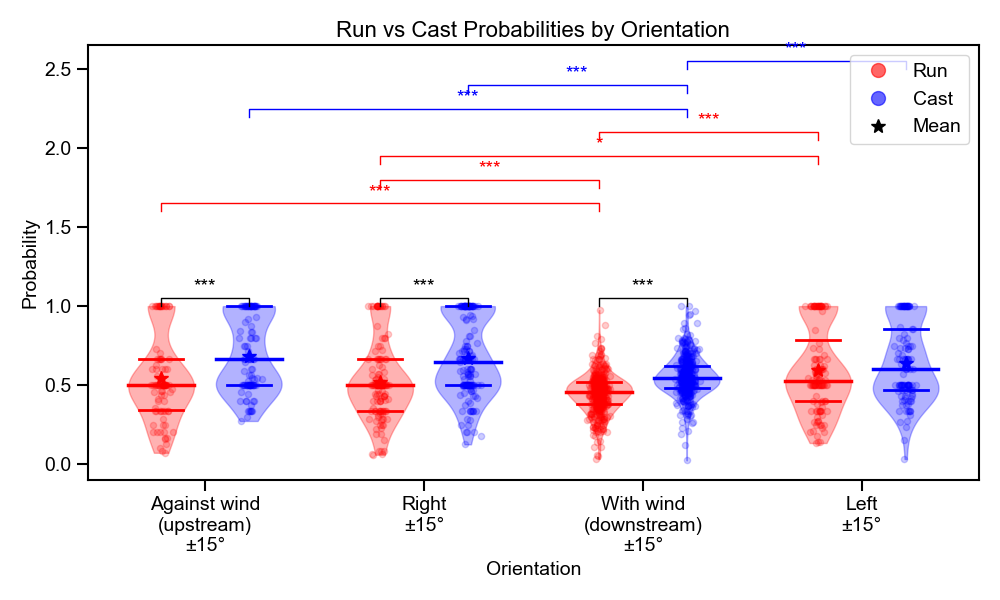

In [ ]:
# Plot run vs cast first
plot_run_vs_cast(filtered_trx_data, angle_width=15, initial_frames=6)

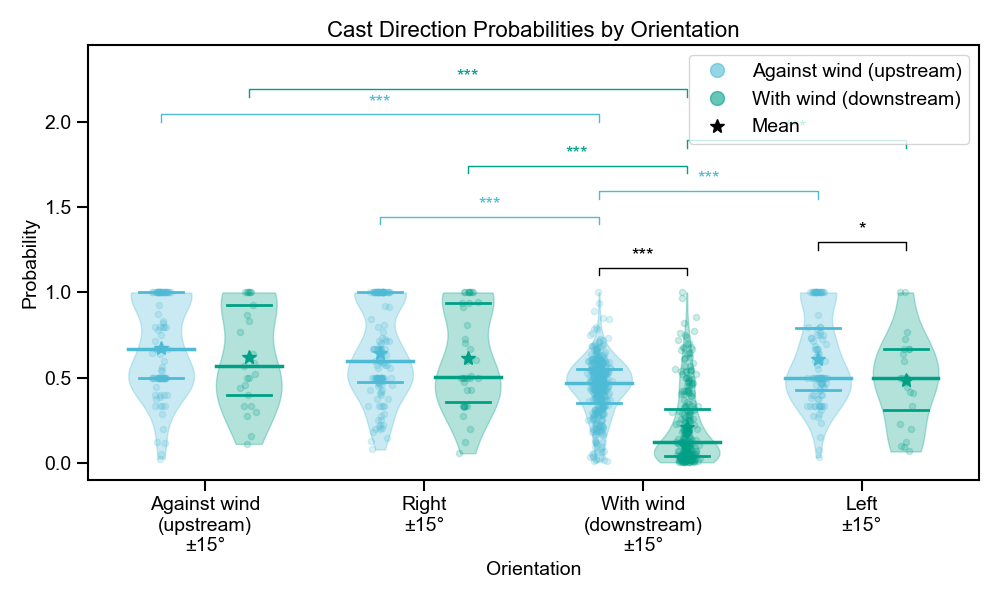

In [69]:
# Then plot cast directions
plot_cast_directions(filtered_trx_data, angle_width=15, initial_frames=6)

/Users/sharbat/miniconda3/envs/anemotaxis/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


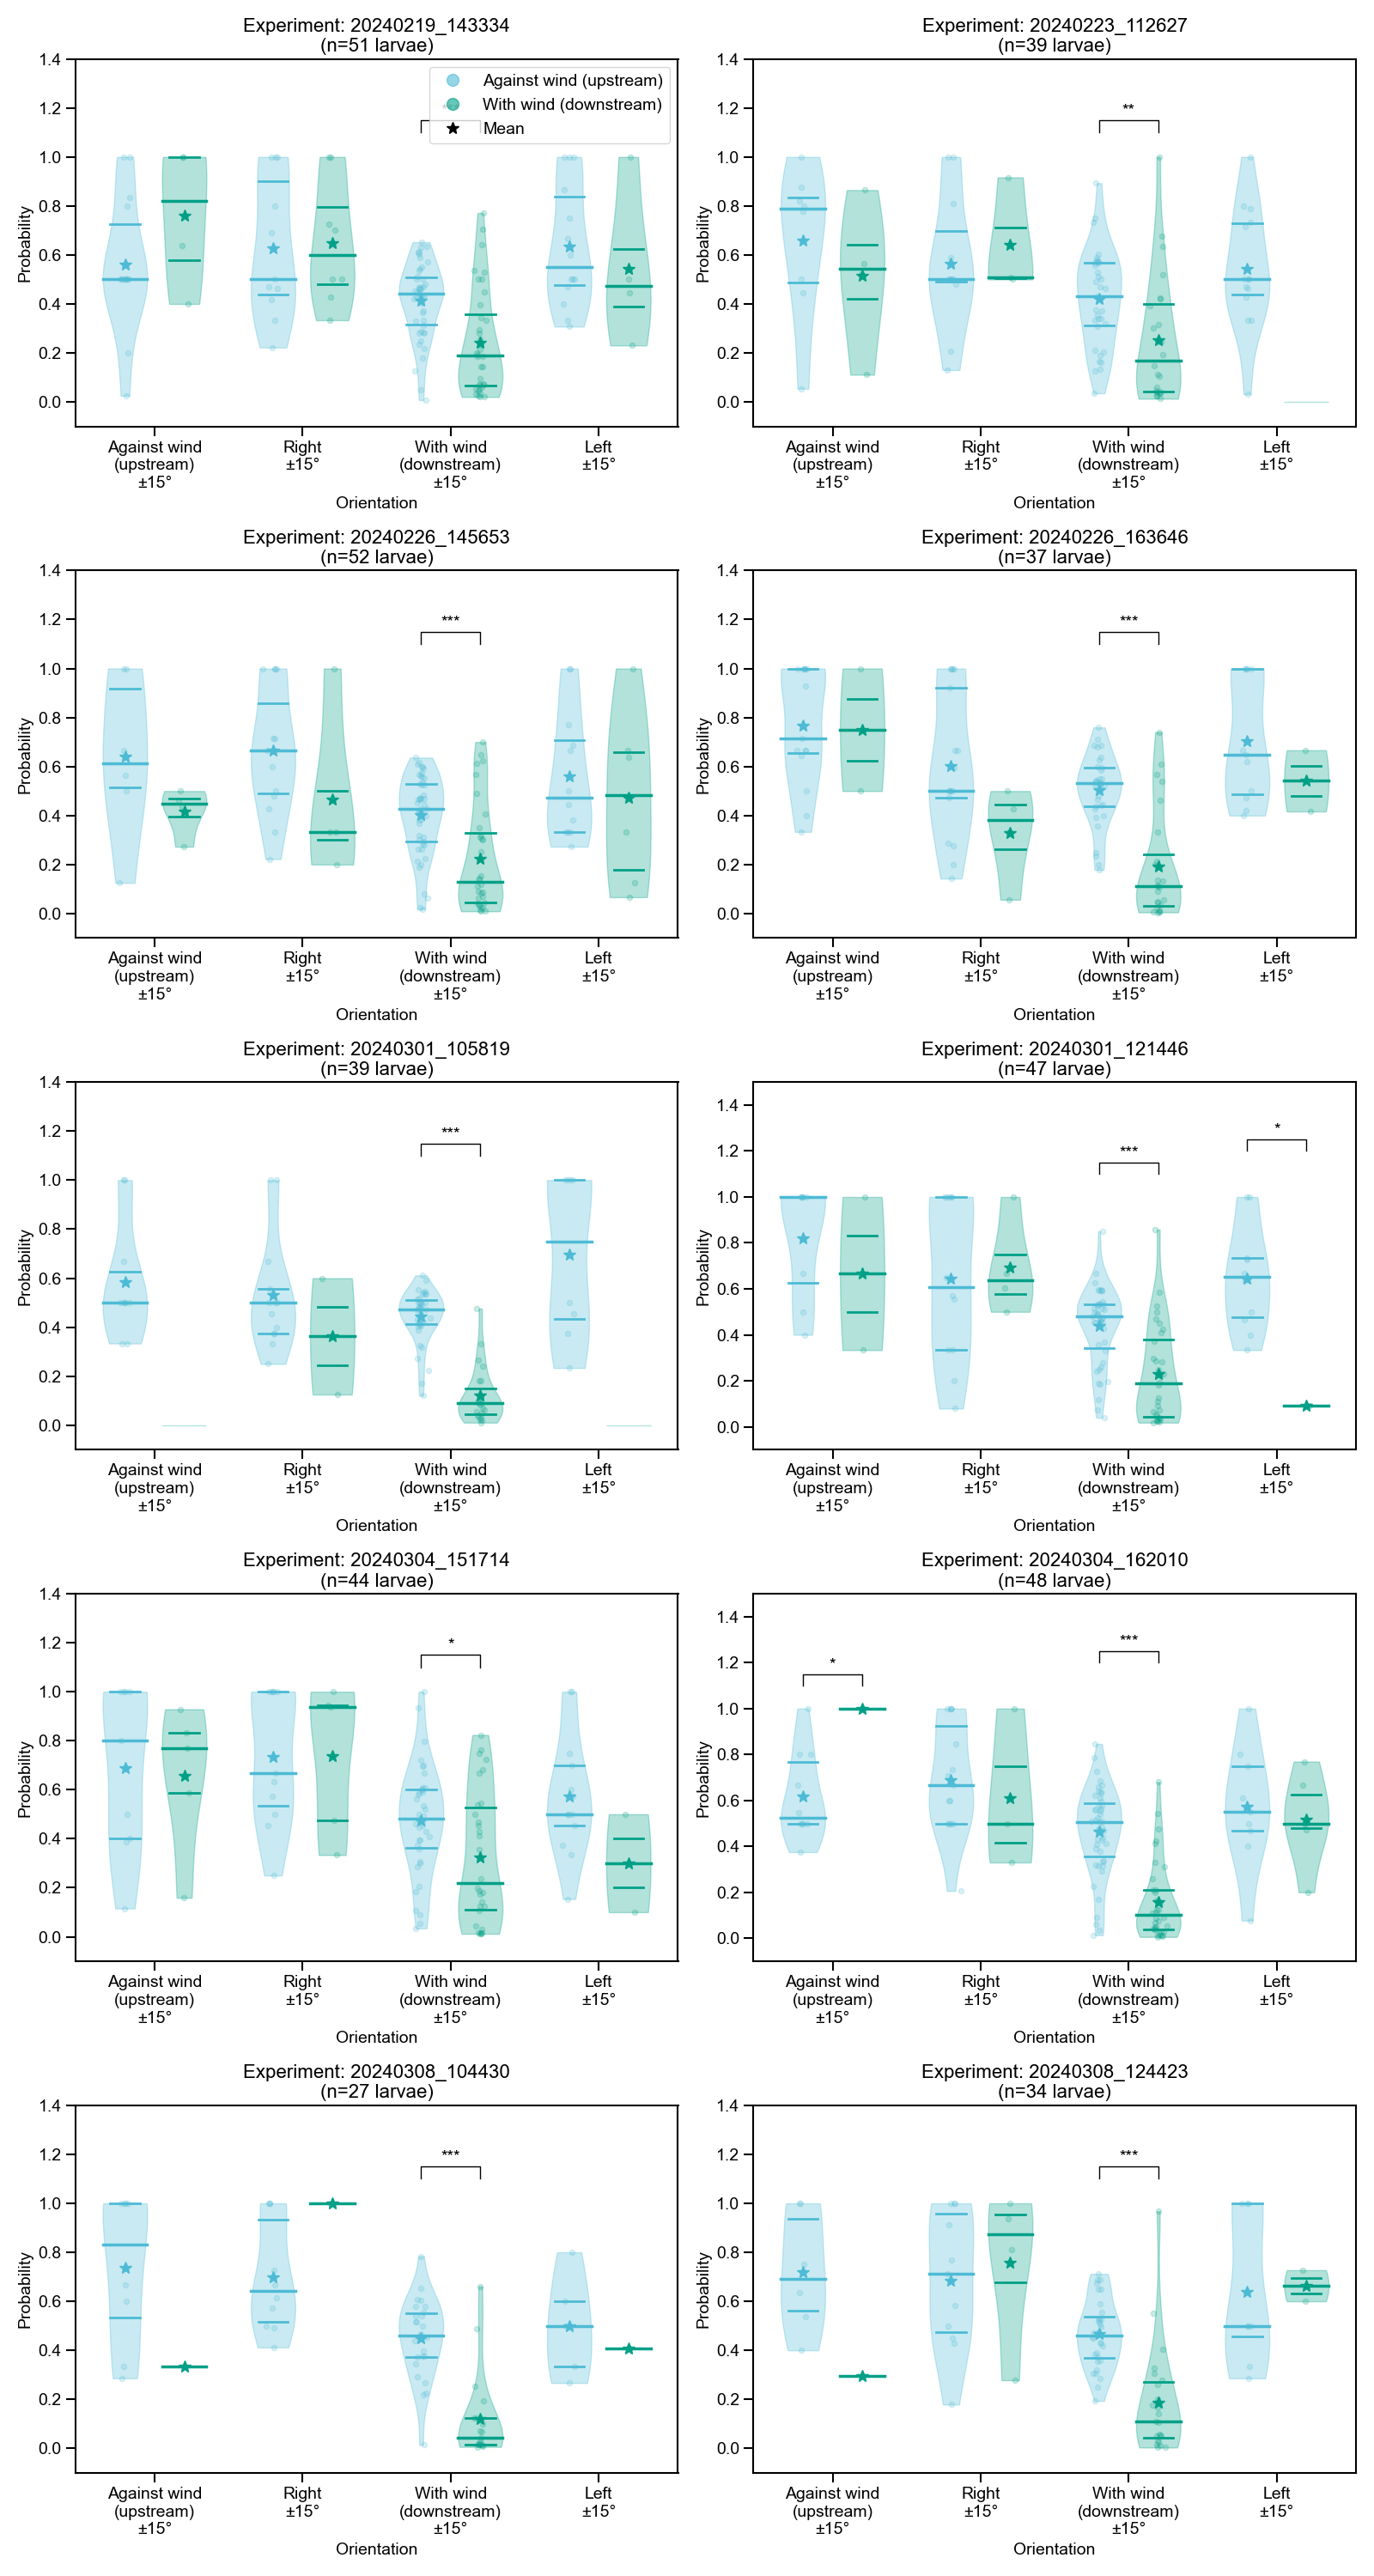

In [70]:
plot_cast_directions_by_experiment(filtered_trx_data, angle_width=15, initial_frames=6)

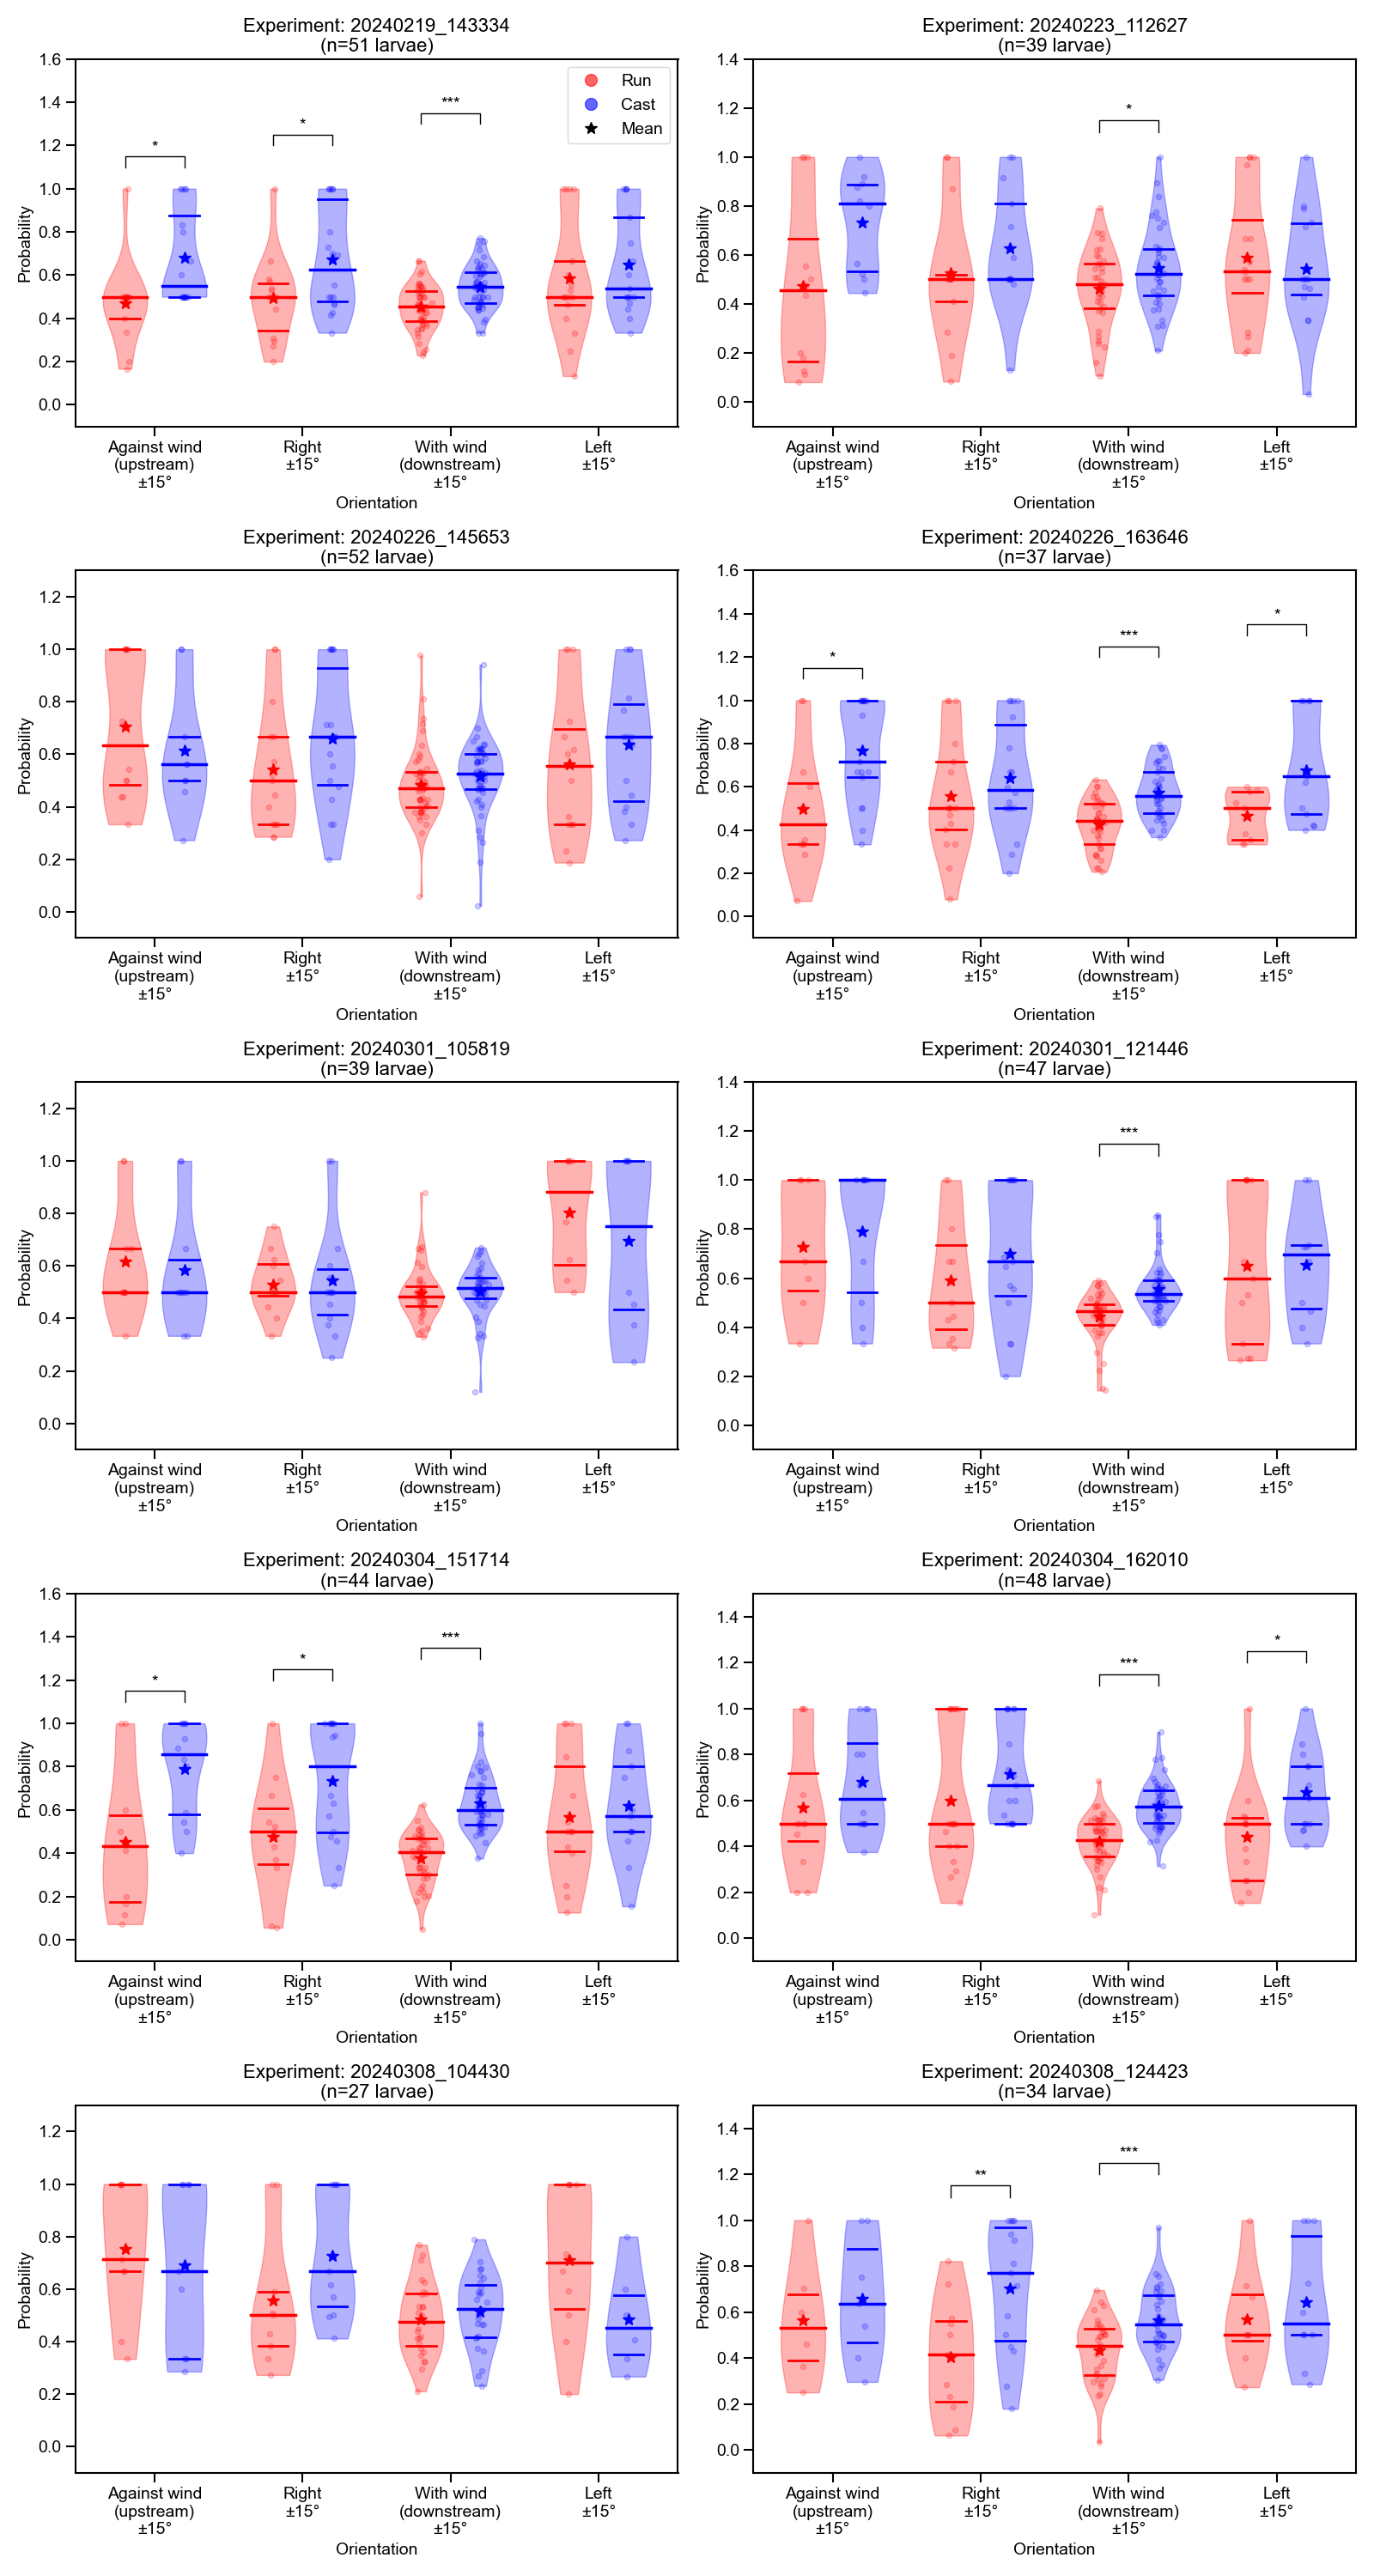

In [72]:
plot_run_vs_cast_by_experiment(filtered_trx_data, angle_width=15, initial_frames=6)

## Calculating probability of upstream cast v/s downstream cast as a function of orientation

Define upstream as **against the wind** and define downstream as **with the wind** with the assumption that wind is blowing in the positive X-axis direction.

Same definition of orientation of the body as follows :

- `angle_width` around the 4 cardinal directions.

In [ ]:
def calculate_orientation_behavior_probability(trx_data, larva_id, initial_frames=12):
    """
    Calculate probabilities of run and cast behaviors based on orientation quadrants.
    Orientation is determined from the initial frames of each behavioral bout.
    
    Args:
        trx_data (dict): Tracking data for all larvae.
        larva_id (str): ID of the larva to analyze.
        initial_frames (int): Number of initial frames to use for orientation.
    
    Returns:
        dict: Probabilities of behaviors by orientation quadrant.
    """
    larva = trx_data['data'][larva_id]
    
    # Get behavioral states
    run = np.array(larva['run'])
    cast = np.array(larva['cast'])
    
    # Find behavioral bout transitions
    run_starts = np.where((run[1:] - run[:-1]) > 0)[0] + 1
    cast_starts = np.where((cast[1:] - cast[:-1]) > 0)[0] + 1
    
    # Extract coordinates
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    
    # Calculate orientation vectors
    tail_to_center = np.array([
        x_center - x_spine[-1, :],
        y_center - y_spine[-1, :]
    ]).T
    
    center_to_head = np.array([
        x_spine[0, :] - x_center,
        y_spine[0, :] - y_center
    ]).T
    
    # Calculate angles
    orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], -tail_to_center[:, 0]))
    cast_angles = np.degrees(np.arctan2(center_to_head[:, 1], -center_to_head[:, 0]))
    
    # Define quadrant ranges
    quadrants = {
        'upstream': (-45, 45),
        'right': (75, 105),
        'downstream': (-180, -135, 135, 180),
        'left': (-105, -75),
        'ambiguous': ()
    }
    
    # Initialize counters
    counts = {quad: {'total': 0, 'run': 0, 'upstream_cast': 0, 'downstream_cast': 0} 
             for quad in quadrants}
    
    def get_quadrant(angle):
        if -45 <= angle <= 45:
            return 'upstream'
        elif 75 <= angle <= 105:
            return 'right'
        elif angle > 135 or angle <= -135:
            return 'downstream'
        elif -105 <= angle <= -75:
            return 'left'
        return 'ambiguous'
    
    # Process run bouts
    for start in run_starts:
        end = min(start + initial_frames, len(orientation_angles))
        mean_angle = np.mean(orientation_angles[start:end])
        quad = get_quadrant(mean_angle)
        
        counts[quad]['total'] += 1
        counts[quad]['run'] += 1
    
    # Process cast bouts
    for start in cast_starts:
        end = min(start + initial_frames, len(orientation_angles))
        mean_orientation = np.mean(orientation_angles[start:end])
        mean_cast = np.mean(cast_angles[start:end])
        quad = get_quadrant(mean_orientation)
        
        counts[quad]['total'] += 1
        
        # Classify cast direction based on mean head angle
        if -90 <= mean_cast <= 90:  # Head pointing downstream
            counts[quad]['downstream_cast'] += 1
        else:  # Head pointing upstream
            counts[quad]['upstream_cast'] += 1
    
    # Calculate probabilities
    probabilities = {}
    for quad in quadrants:
        total = counts[quad]['total']
        if total > 0:
            probabilities[quad] = {
                'run': counts[quad]['run'] / total,
                'upstream_cast': counts[quad]['upstream_cast'] / total,
                'downstream_cast': counts[quad]['downstream_cast'] / total
            }
        else:
            probabilities[quad] = {'run': 0, 'upstream_cast': 0, 'downstream_cast': 0}
    
    return probabilities

In [ ]:
def analyze_and_plot_orientation_behaviors(trx_data):
    """
    Analyze and plot orientation behaviors with violin plots and print statistical results.
    Shows significance testing between orientations for runs, upstream casts, and downstream casts.
    """
    # Initialize data structures
    orientation_labels = {
        'upstream': 'upstream\n(-45° to +45°)',
        'right': 'right\n(+75° to +105°)',
        'downstream': 'downstream\n(-135° to +135°)',
        'left': 'left\n(-105° to -75°)'
    }
    orientations = ['upstream', 'right', 'downstream', 'left']
    behaviors = ['run', 'upstream_cast', 'downstream_cast']
    
    # Initialize data dictionary
    violin_data = {behavior: {ori: [] for ori in orientations} for behavior in behaviors}
    
    # Collect probabilities for each larva
    for larva_id in trx_data['data'].keys():
        probs = calculate_orientation_behavior_probability(trx_data, larva_id)
        for ori in orientations:
            for behavior in behaviors:
                violin_data[behavior][ori].append(probs[ori][behavior])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot violins
    positions = np.arange(len(orientations))
    colors = {'run': 'red', 'upstream_cast': 'green', 'downstream_cast': 'blue'}
    offsets = {'run': -0.25, 'upstream_cast': 0, 'downstream_cast': 0.25}
    
    violin_parts = {}
    for behavior in behaviors:
        violin_parts[behavior] = ax.violinplot(
            [violin_data[behavior][ori] for ori in orientations],
            positions=positions + offsets[behavior],
            widths=0.2
        )
        # Style violins
        for pc in violin_parts[behavior]['bodies']:
            pc.set_facecolor(colors[behavior])
            pc.set_alpha(0.6)
        for partname in ['cbars', 'cmins', 'cmaxes']:
            violin_parts[behavior][partname].set_edgecolor(colors[behavior])
        
        # Add scatter points
        for i, ori in enumerate(orientations):
            ax.scatter(
                np.full_like(violin_data[behavior][ori], i + offsets[behavior]) +
                np.random.normal(0, 0.02, size=len(violin_data[behavior][ori])),
                violin_data[behavior][ori],
                color=colors[behavior],
                alpha=0.3,
                s=20
            )
    
    # Statistical testing function
    def test_significance(data1, data2, label1, label2):
        t_stat, p_val = stats.ttest_ind(data1, data2)
        print(f"\nComparison: {label1} vs {label2}")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_val:.3e}")
        return p_val
    
    print("\nStatistical Test Results:")
    print("========================")
    
    # Collect significant comparisons
    significance_tests = []
    
    # Test between orientations for each behavior
    for behavior in behaviors:
        print(f"\n{behavior.upper()} - Between orientation comparisons:")
        for i, ori1 in enumerate(orientations):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                p_val = test_significance(
                    violin_data[behavior][ori1],
                    violin_data[behavior][ori2],
                    f"{behavior} ({ori1})",
                    f"{behavior} ({ori2})"
                )
                if p_val < 0.05:
                    significance_tests.append({
                        'x1': i + offsets[behavior],
                        'x2': j + offsets[behavior],
                        'p_val': p_val,
                        'color': colors[behavior],
                        'y_offset': len(significance_tests) * 0.1
                    })
    
    # Sort significance tests by p-value
    significance_tests.sort(key=lambda x: x['p_val'])
    
    # Plot significance bars
    y_max = max([max(max(violin_data[beh][ori]) for ori in orientations) 
                 for beh in behaviors])
    base_height = y_max + 0.1
    
    # Plot significance bars with different heights
    for test in significance_tests:
        y_level = base_height + test['y_offset']
        x1, x2 = test['x1'], test['x2']
        
        # Draw significance bar
        ax.plot([x1, x1, x2, x2], 
                [y_level, y_level + 0.05, y_level + 0.05, y_level],
                color=test['color'], linewidth=1)
        
        # Add significance symbol
        if test['p_val'] < 0.001:
            symbol = '***'
        elif test['p_val'] < 0.01:
            symbol = '**'
        else:
            symbol = '*'
        
        ax.text((x1 + x2)/2, y_level + 0.05, symbol,
                ha='center', va='bottom', color=test['color'])
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels([orientation_labels[ori] for ori in orientations])
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Probability')
    ax.set_ylim(-0.2, base_height + len(significance_tests) * 0.1 + 0.2)
    ax.set_title('Behavioral Probabilities by Orientation Quadrant')
    
    # Create custom legend
    legend_elements = [
        plt.Line2D([0], [0], color=colors['run'], marker='o', 
                   label='Run', markersize=10, linestyle='none', alpha=0.6),
        plt.Line2D([0], [0], color=colors['upstream_cast'], marker='o', 
                   label='Upstream Cast', markersize=10, linestyle='none', alpha=0.6),
        plt.Line2D([0], [0], color=colors['downstream_cast'], marker='o', 
                   label='Downstream Cast', markersize=10, linestyle='none', alpha=0.6)
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Analyze and plot orientation behaviors
analyze_and_plot_orientation_behaviors(filtered_trx_data)

## Calculate amplitude of head cast (left or right) as a function of orientation


In [ ]:
def calculate_orientation_behavior_probability(trx_data, larva_id, angle_width=15, initial_frames=12):
    """
    Calculate probabilities of run and cast behaviors based on orientation quadrants.
    
    Args:
        trx_data (dict): Tracking data for all larvae
        larva_id (str): ID of the larva to analyze
        angle_width (float): Half-width of angle range for quadrant definition
        initial_frames (int): Number of initial frames to use for orientation
    
    Returns:
        dict: Probabilities of behaviors by orientation quadrant
    """
    larva = trx_data['data'][larva_id]
    
    # Get behavioral states
    run = np.array(larva['run'])
    cast = np.array(larva['cast'])
    
    # Find behavioral bout transitions
    run_starts = np.where((run[1:] - run[:-1]) > 0)[0] + 1
    cast_starts = np.where((cast[1:] - cast[:-1]) > 0)[0] + 1
    
    # Extract coordinates
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    
    # Calculate orientation vectors
    tail_to_center = np.array([
        x_center - x_spine[-1, :],
        y_center - y_spine[-1, :]
    ]).T
    
    center_to_head = np.array([
        x_spine[0, :] - x_center,
        y_spine[0, :] - y_center
    ]).T
    
    # Calculate angles
    orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], -tail_to_center[:, 0]))
    cast_angles = np.degrees(np.arctan2(center_to_head[:, 1], -center_to_head[:, 0]))
    
    # Define quadrant ranges using angle_width
    quadrants = {
        'upstream': (-angle_width, angle_width),  # Against wind (upstream)
        'right': (90-angle_width, 90+angle_width),
        'downstream': (180-angle_width, 180, -180, -180+angle_width),  # With wind (downstream)
        'left': (-90-angle_width, -90+angle_width),
        'ambiguous': ()
    }
    
    # Initialize counters
    counts = {quad: {'total': 0, 'run': 0, 'upstream_cast': 0, 'downstream_cast': 0} 
             for quad in quadrants}
    
    def get_quadrant(angle):
        """Determine orientation quadrant based on angle."""
        if -angle_width <= angle <= angle_width:
            return 'upstream'  # Against wind (upstream)
        elif 90-angle_width <= angle <= 90+angle_width:
            return 'right'
        elif angle >= 180-angle_width or angle <= -180+angle_width:
            return 'downstream'  # With wind (downstream)
        elif -90-angle_width <= angle <= -90+angle_width:
            return 'left'
        return 'ambiguous'
    
    # Process run bouts
    for start in run_starts:
        end = min(start + initial_frames, len(orientation_angles))
        mean_angle = np.mean(orientation_angles[start:end])
        quad = get_quadrant(mean_angle)
        
        if quad != 'ambiguous':
            counts[quad]['total'] += 1
            counts[quad]['run'] += 1
    
    # Process cast bouts
    for start in cast_starts:
        end = min(start + initial_frames, len(orientation_angles))
        mean_orientation = np.mean(orientation_angles[start:end])
        mean_cast = np.mean(cast_angles[start:end])
        quad = get_quadrant(mean_orientation)
        
        if quad != 'ambiguous':
            counts[quad]['total'] += 1
            
            # Classify cast direction (upstream/downstream) based on head angle
            if -90 <= mean_cast <= 90:
                counts[quad]['downstream_cast'] += 1  # With wind cast
            else:
                counts[quad]['upstream_cast'] += 1  # Against wind cast
    
    # Calculate probabilities
    probabilities = {}
    for quad in quadrants:
        total = counts[quad]['total']
        if total > 0:
            probabilities[quad] = {
                'run': counts[quad]['run'] / total,
                'upstream_cast': counts[quad]['upstream_cast'] / total,  # Against wind cast
                'downstream_cast': counts[quad]['downstream_cast'] / total  # With wind cast
            }
        else:
            probabilities[quad] = {'run': 0, 'upstream_cast': 0, 'downstream_cast': 0}
    
    return probabilities

In [ ]:
def analyze_and_print_amplitude_statistics(violin_data, orientations, cast_types):
    """
    Perform comprehensive statistical analysis of cast amplitudes.
    """
    print("\nStatistical Analysis of Cast Amplitudes")
    print("=====================================")
    
    # 1. Compare upstream vs downstream casts within each orientation
    print("\n1. Within-orientation comparisons (Upstream vs Downstream casts):")
    print("-----------------------------------------------------------")
    for ori in orientations:
        up_data = violin_data['upstream_cast'][ori]
        down_data = violin_data['downstream_cast'][ori]
        if len(up_data) > 0 and len(down_data) > 0:
            t_stat, p_val = stats.ttest_ind(up_data, down_data)
            print(f"\nOrientation: {ori}")
            print(f"Upstream cast mean ± std: {np.mean(up_data):.2f} ± {np.std(up_data):.2f}")
            print(f"Downstream cast mean ± std: {np.mean(down_data):.2f} ± {np.std(down_data):.2f}")
            print(f"t-statistic: {t_stat:.3f}")
            print(f"p-value: {p_val:.3e}")
    
    # 2. Compare orientations for each cast type
    print("\n2. Between-orientation comparisons:")
    print("--------------------------------")
    for cast_type in cast_types:
        print(f"\nCast type: {cast_type}")
        for i, ori1 in enumerate(orientations):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                data1 = violin_data[cast_type][ori1]
                data2 = violin_data[cast_type][ori2]
                if len(data1) > 0 and len(data2) > 0:
                    t_stat, p_val = stats.ttest_ind(data1, data2)
                    print(f"\n{ori1} vs {ori2}:")
                    print(f"{ori1} mean ± std: {np.mean(data1):.2f} ± {np.std(data1):.2f}")
                    print(f"{ori2} mean ± std: {np.mean(data2):.2f} ± {np.std(data2):.2f}")
                    print(f"t-statistic: {t_stat:.3f}")
                    print(f"p-value: {p_val:.3e}")
    
    # 3. Additional descriptive statistics
    print("\n3. Overall descriptive statistics:")
    print("--------------------------------")
    for cast_type in cast_types:
        print(f"\n{cast_type}:")
        for ori in orientations:
            data = violin_data[cast_type][ori]
            if len(data) > 0:
                print(f"\n{ori}:")
                print(f"N = {len(data)}")
                print(f"Mean ± SEM: {np.mean(data):.2f} ± {stats.sem(data):.2f}")
                print(f"Median: {np.median(data):.2f}")
                print(f"25th percentile: {np.percentile(data, 25):.2f}")
                print(f"75th percentile: {np.percentile(data, 75):.2f}")

In [ ]:
def analyze_and_plot_cast_amplitudes(trx_data):
    """
    Analyze and plot cast amplitudes with violin plots and statistical significance.
    """
    # Initialize data structures
    orientations = ['upstream', 'right', 'downstream', 'left']
    cast_types = ['upstream_cast', 'downstream_cast']
    
    # Initialize data dictionary
    violin_data = {cast_type: {ori: [] for ori in orientations} for cast_type in cast_types}
    
    # Collect amplitudes for each larva
    for larva_id in trx_data['data'].keys():
        amps = calculate_orientation_cast_amplitudes(trx_data, larva_id)
        for ori in orientations:
            for cast_type in cast_types:
                violin_data[cast_type][ori].extend(amps[ori][cast_type])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Define colors and offsets
    colors = {'upstream_cast': 'green', 'downstream_cast': 'blue'}
    offsets = {'upstream_cast': -0.2, 'downstream_cast': 0.2}
    
    # Plot violins
    positions = np.arange(len(orientations))
    violin_parts = {}
    for cast_type in cast_types:
        violin_parts[cast_type] = ax.violinplot(
            [violin_data[cast_type][ori] for ori in orientations],
            positions=positions + offsets[cast_type],
            widths=0.3
        )
        # Style violins
        for pc in violin_parts[cast_type]['bodies']:
            pc.set_facecolor(colors[cast_type])
            pc.set_alpha(0.6)
        for partname in ['cbars', 'cmins', 'cmaxes']:
            violin_parts[cast_type][partname].set_edgecolor(colors[cast_type])
    
    # Add scatter points
    for i, ori in enumerate(orientations):
        for cast_type in cast_types:
            ax.scatter(
                np.full_like(violin_data[cast_type][ori], i + offsets[cast_type]) +
                np.random.normal(0, 0.02, size=len(violin_data[cast_type][ori])),
                violin_data[cast_type][ori],
                color=colors[cast_type],
                alpha=0.3,
                s=20
            )
    
    # Collect significance tests
    significance_tests = []
    
    # Test between upstream and downstream casts within each orientation
    print("\nWithin-orientation comparisons:")
    for i, ori in enumerate(orientations):
        up_data = violin_data['upstream_cast'][ori]
        down_data = violin_data['downstream_cast'][ori]
        if len(up_data) > 0 and len(down_data) > 0:
            t_stat, p_val = stats.ttest_ind(up_data, down_data)
            print(f"\n{ori} - Upstream vs Downstream casts:")
            print(f"p-value: {p_val:.3e}")
            if p_val < 0.05:
                significance_tests.append({
                    'x1': i + offsets['upstream_cast'],
                    'x2': i + offsets['downstream_cast'],
                    'p_val': p_val,
                    'color': 'black',
                    'y_offset': len(significance_tests) * 0.1,
                    'type': 'within'
                })
    
    # Test between orientations for each cast type
    print("\nBetween-orientation comparisons:")
    for cast_type in cast_types:
        for i, ori1 in enumerate(orientations):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                data1 = violin_data[cast_type][ori1]
                data2 = violin_data[cast_type][ori2]
                if len(data1) > 0 and len(data2) > 0:
                    t_stat, p_val = stats.ttest_ind(data1, data2)
                    print(f"\n{cast_type} - {ori1} vs {ori2}:")
                    print(f"p-value: {p_val:.3e}")
                    if p_val < 0.05:
                        significance_tests.append({
                            'x1': i + offsets[cast_type],
                            'x2': j + offsets[cast_type],
                            'p_val': p_val,
                            'color': colors[cast_type],
                            'y_offset': len(significance_tests) * 0.1,
                            'type': 'between'
                        })
    
    # Sort significance tests by p-value
    significance_tests.sort(key=lambda x: (x['type'] != 'within', x['p_val']))
    
    # Plot significance bars
    y_max = max([max(max(violin_data[ct][ori]) for ori in orientations) 
                 for ct in cast_types])
    base_height = y_max + 10
    
    # Plot significance bars with different heights
    for test in significance_tests:
        y_level = base_height + test['y_offset'] * 100
        x1, x2 = test['x1'], test['x2']
        
        # Draw significance bar
        ax.plot([x1, x1, x2, x2], 
                [y_level, y_level + 5, y_level + 5, y_level],
                color=test['color'], linewidth=1)
        
        # Add significance symbol
        if test['p_val'] < 0.001:
            symbol = '***'
        elif test['p_val'] < 0.01:
            symbol = '**'
        else:
            symbol = '*'
        
        ax.text((x1 + x2)/2, y_level + 5, symbol,
                ha='center', va='bottom', color=test['color'])
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels(orientations)
    ax.set_ylabel('Cast Amplitude (degrees)')
    ax.set_ylim(-50,250)
    ax.set_title('Cast Amplitudes by Orientation Quadrant')
    
    # Create custom legend
    legend_elements = [
        plt.Line2D([0], [0], color=colors['upstream_cast'], marker='o', 
                   label='Upstream Cast', markersize=10, linestyle='none', alpha=0.6),
        plt.Line2D([0], [0], color=colors['downstream_cast'], marker='o', 
                   label='Downstream Cast', markersize=10, linestyle='none', alpha=0.6)
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def calculate_orientation_cast_amplitudes(trx_data, larva_id, angle_width=15, initial_frames=12):
    """Calculate cast amplitudes based on orientation quadrants."""
    larva = trx_data['data'][larva_id]
    
    # Get cast state and find bout starts
    cast = np.array(larva['cast'])
    cast_starts = np.where((cast[1:] - cast[:-1]) > 0)[0] + 1
    
    # Extract coordinates
    x_spine = np.array(larva['x_spine'])
    y_spine = np.array(larva['y_spine'])
    x_center = np.array(larva['x_center'])
    y_center = np.array(larva['y_center'])
    
    # Calculate vectors and angles relative to negative x-axis
    tail_to_center = np.array([
        x_center - x_spine[-1],
        y_center - y_spine[-1]
    ]).T
    
    center_to_head = np.array([
        x_spine[0] - x_center,
        y_spine[0] - y_center
    ]).T
    
    # Calculate angles relative to negative x-axis
    orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], -tail_to_center[:, 0]))
    cast_angles = np.degrees(np.arctan2(center_to_head[:, 1], -center_to_head[:, 0]))
    
    def get_quadrant(angle):
        """Determine orientation quadrant based on angle."""
        if -angle_width <= angle <= angle_width:
            return 'downstream'  # With wind
        elif 90-angle_width <= angle <= 90+angle_width:
            return 'right'
        elif angle >= 180-angle_width or angle <= -180+angle_width:
            return 'upstream'  # Against wind
        elif -90-angle_width <= angle <= -90+angle_width:
            return 'left'
        return 'ambiguous'
    
    # Initialize results dictionary
    amplitudes = {
        'upstream': {'upstream_cast': [], 'downstream_cast': []},
        'right': {'upstream_cast': [], 'downstream_cast': []},
        'downstream': {'upstream_cast': [], 'downstream_cast': []},
        'left': {'upstream_cast': [], 'downstream_cast': []},
        'ambiguous': {'upstream_cast': [], 'downstream_cast': []}
    }
    
    # Process each cast bout
    for start in cast_starts:
        # Calculate mean orientation from initial frames
        end = min(start + initial_frames, len(orientation_angles))
        mean_orientation = np.mean(orientation_angles[start:end])
        quad = get_quadrant(mean_orientation)
        
        # Get the first cast direction
        first_cast_angle = cast_angles[start]
        
        # Find all frames in this cast bout
        if start == cast_starts[-1]:
            bout_frames = np.arange(start, len(cast))
        else:
            bout_frames = np.arange(start, cast_starts[np.where(cast_starts > start)[0][0]])
        
        # Process each frame in the bout
        for frame in bout_frames:
            cast_angle = cast_angles[frame]
            
            # Calculate cast amplitude
            amplitude = np.abs(cast_angle - orientation_angles[frame])
            if amplitude > 180:
                amplitude = 360 - amplitude
            
            # Classify cast direction based on first cast angle
            if -90 <= first_cast_angle <= 90:  # Head pointing downstream
                amplitudes[quad]['downstream_cast'].append(amplitude)
            else:  # Head pointing upstream
                amplitudes[quad]['upstream_cast'].append(amplitude)
    
    return amplitudes

def plot_cast_amplitudes(trx_data, angle_width=15, initial_frames=12):
    """Plot cast amplitudes by orientation with stacked statistical comparisons."""
    # Initialize structures
    orientation_labels = {
        'upstream': f'Against wind\n(upstream)\n±{angle_width}°',
        'right': f'Right\n±{angle_width}°',
        'downstream': f'With wind\n(downstream)\n±{angle_width}°',
        'left': f'Left\n±{angle_width}°'
    }
    orientations = ['upstream', 'right', 'downstream', 'left']
    cast_types = ['upstream_cast', 'downstream_cast']
    cast_labels = {
        'upstream_cast': 'Against wind (upstream) cast',
        'downstream_cast': 'With wind (downstream) cast'
    }
    
    # Collect amplitude data
    data = {cast: {ori: [] for ori in orientations} for cast in cast_types}
    
    # Process each larva
    for larva_id in trx_data['data'].keys():
        amps = calculate_orientation_cast_amplitudes(trx_data, larva_id, angle_width, initial_frames)
        for ori in orientations:
            for cast_type in cast_types:
                if len(amps[ori][cast_type]) > 0:  # Only include non-zero data
                    data[cast_type][ori].extend(amps[ori][cast_type])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10,6))
    positions = np.arange(len(orientations))
    colors = {'upstream_cast': '#4DBBD5', 'downstream_cast': '#00A087'}
    offsets = {'upstream_cast': -0.2, 'downstream_cast': 0.2}
    
    # Plot violins
    for cast_type in cast_types:
        parts = ax.violinplot(
            [data[cast_type][ori] for ori in orientations],
            positions=positions + offsets[cast_type],
            widths=0.3,
            showextrema=False
        )
        for pc in parts['bodies']:
            pc.set_facecolor(colors[cast_type])
            pc.set_alpha(0.3)
            pc.set_edgecolor(colors[cast_type])
    
    # Add quartile and mean markers
    for i, ori in enumerate(orientations):
        for cast_type in cast_types:
            pos = i + offsets[cast_type]
            d = data[cast_type][ori]
            if len(d) > 0:
                q1, median, q3 = np.percentile(d, [25, 50, 75])
                mean = np.mean(d)
                
                ax.plot([pos-0.1, pos+0.1], [q1, q1], '-', color=colors[cast_type], linewidth=2)
                ax.plot([pos-0.1, pos+0.1], [q3, q3], '-', color=colors[cast_type], linewidth=2)
                ax.plot([pos-0.15, pos+0.15], [median, median], '-', color=colors[cast_type], linewidth=2.5)
                ax.plot(pos, mean, '*', color=colors[cast_type], markersize=10)
    
    # Collect all significance tests
    significance_tests = []
    
    # Within-orientation comparisons
    for i, ori in enumerate(orientations):
        if len(data['upstream_cast'][ori]) > 0 and len(data['downstream_cast'][ori]) > 0:
            t_stat, p_val = stats.ttest_ind(data['upstream_cast'][ori], 
                                          data['downstream_cast'][ori])
            if p_val < 0.05:
                significance_tests.append({
                    'x1': i + offsets['upstream_cast'],
                    'x2': i + offsets['downstream_cast'],
                    'p_val': p_val,
                    'type': 'within',
                    'span': abs(offsets['upstream_cast'] - offsets['downstream_cast'])
                })
    
    # Cross-orientation comparisons
    for cast_type in cast_types:
        for i, ori1 in enumerate(orientations[:-1]):
            for j, ori2 in enumerate(orientations[i+1:], i+1):
                if len(data[cast_type][ori1]) > 0 and len(data[cast_type][ori2]) > 0:
                    t_stat, p_val = stats.ttest_ind(data[cast_type][ori1], 
                                                  data[cast_type][ori2])
                    if p_val < 0.05:
                        significance_tests.append({
                            'x1': i + offsets[cast_type],
                            'x2': j + offsets[cast_type],
                            'p_val': p_val,
                            'type': 'across',
                            'cast_type': cast_type,
                            'span': j - i
                        })
    
    # Sort significance tests by span (shorter comparisons first)
    significance_tests.sort(key=lambda x: x['span'])
    
    # Calculate max y value and spacing
    y_max = max([max(max(data[cast][ori]) if data[cast][ori] else 0 
                 for ori in orientations) for cast in cast_types])
    bar_spacing = y_max * 0.15  # Space between significance bars
    base_height = y_max * 1.1   # Starting height for bars
    
    # Plot significance bars with stacking
    for idx, test in enumerate(significance_tests):
        y_level = base_height + (idx * bar_spacing)
        x1, x2 = test['x1'], test['x2']
        
        # Set color based on comparison type
        if test['type'] == 'within':
            color = 'black'
        else:
            color = colors[test['cast_type']]
        
        # Draw significance bar
        ax.plot([x1, x1, x2, x2],
                [y_level, y_level + bar_spacing*0.3, y_level + bar_spacing*0.3, y_level],
                color=color, linewidth=1)
        
        # Add significance symbol
        symbol = '***' if test['p_val'] < 0.001 else '**' if test['p_val'] < 0.01 else '*'
        ax.text((x1 + x2)/2, y_level + bar_spacing*0.4, symbol,
                ha='center', va='bottom', color=color)
    
    # Update y-axis limit to show all bars
    ax.set_ylim(-y_max*0.1, base_height + (len(significance_tests) + 1) * bar_spacing)
    
    # Customize plot
    ax.set_xticks(positions)
    ax.set_xticklabels([orientation_labels[ori] for ori in orientations])
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Cast Amplitude (degrees)')
    ax.set_title('Cast Amplitudes by Orientation')
    
    # Create legend
    legend_elements = [
        plt.Line2D([0], [0], color=c, marker='o', label=cast_labels[cast],
                   markersize=10, linestyle='none', alpha=0.6)
        for cast, c in colors.items()
    ]
    legend_elements.append(plt.Line2D([0], [0], color='k', marker='*',
                                    label='Mean', markersize=10, linestyle='none'))
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_cast_amplitudes(filtered_trx_data, angle_width=15, initial_frames=3)

In [ ]:
def plot_continuous_heading(trx_data, angle_width=15, bin_width=5):
    """Plot heading direction probability distributions separated by behavioral state.
    
    Args:
        trx_data (dict): Tracking data dictionary
        angle_width (float): Width of angle for quadrant definition
        bin_width (int): Width of angle bins in degrees
    """
    # Initialize data structures
    run_angles = []
    cast_angles = []
    quadrant_colors = {
        'upstream': '#E64B35',     # Against wind (red)
        'downstream': '#4DBBD5',   # With wind (blue)
        'right': '#00A087',        # Right (green)
        'left': '#3C5488',         # Left (purple)
    }
    
    # Collect angles separated by behavior
    for larva_id in trx_data['data'].keys():
        larva = trx_data['data'][larva_id]
        
        # Convert coordinates to numpy arrays
        x_spine = np.array(larva['x_spine'])
        y_spine = np.array(larva['y_spine'])
        x_center = np.array(larva['x_center'])
        y_center = np.array(larva['y_center'])
        
        # Calculate orientation angles
        tail_to_center = np.array([
            x_center - x_spine[-1],
            y_center - y_spine[-1]
        ]).T
        orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], tail_to_center[:, 0]))
        
        # Separate angles by behavioral state
        runs = np.array(larva['run'])
        casts = np.array(larva['cast'])
        
        run_angles.extend(orientation_angles[runs == 1])
        cast_angles.extend(orientation_angles[casts == 1])
    
    # Create bins
    bins = np.arange(-180, 181, bin_width)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Calculate probabilities
    run_counts, _ = np.histogram(run_angles, bins=bins, density=True)
    cast_counts, _ = np.histogram(cast_angles, bins=bins, density=True)
    
    # Normalize to probabilities
    run_probs = run_counts * bin_width
    cast_probs = cast_counts * bin_width
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot probabilities
    ax.plot(bin_centers, run_probs, 'r-', linewidth=2, label='Run', alpha=0.7)
    ax.plot(bin_centers, cast_probs, 'b-', linewidth=2, label='Cast', alpha=0.7)
    
    # Color quadrant regions
    ymin, ymax = ax.get_ylim()
    
    # Upstream region (180°)
    ax.fill_between([180-angle_width, 180], ymin, ymax, color=quadrant_colors['upstream'], alpha=0.1)
    ax.fill_between([-180, -180+angle_width], ymin, ymax, color=quadrant_colors['upstream'], alpha=0.1)
    
    # Downstream region (0°)
    ax.fill_between([-angle_width, angle_width], ymin, ymax, color=quadrant_colors['downstream'], alpha=0.1)
    
    # Right region (90°)
    ax.fill_between([90-angle_width, 90+angle_width], ymin, ymax, color=quadrant_colors['right'], alpha=0.1)
    
    # Left region (-90°)
    ax.fill_between([-90-angle_width, -90+angle_width], ymin, ymax, color=quadrant_colors['left'], alpha=0.1)
    
    # Customize plot
    ax.set_xlabel('Orientation (degrees)')
    ax.set_ylabel('Probability')
    ax.set_xlim(-180, 180)
    ax.legend(loc='upper right')
    ax.set_title('Heading Direction Distribution by Behavioral State')
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_continuous_heading(filtered_trx_data, angle_width=10)

In [ ]:
def plot_continuous_cast_amplitudes(trx_data, bin_width=10, initial_frames=12):
    """Plot cast amplitudes as a continuous function of orientation."""
    # Initialize data structures
    upstream_angles = []
    upstream_amplitudes = []
    downstream_angles = []
    downstream_amplitudes = []
    
    # Collect data from all larvae
    for larva_id in trx_data['data'].keys():
        larva = trx_data['data'][larva_id]
        
        # Extract coordinates and convert to numpy arrays
        x_spine = np.array(larva['x_spine'])
        y_spine = np.array(larva['y_spine'])
        x_center = np.array(larva['x_center'])
        y_center = np.array(larva['y_center'])
        
        # Get cast bouts
        cast = np.array(larva['cast'])
        cast_starts = np.where((cast[1:] - cast[:-1]) > 0)[0] + 1
        
        # Calculate vectors and angles
        tail_to_center = np.array([
            x_center - x_spine[-1],
            y_center - y_spine[-1]
        ]).T
        center_to_head = np.array([
            x_spine[0] - x_center,
            y_spine[0] - y_center
        ]).T
        
        # Calculate angles relative to x-axis (0° = downstream)
        orientation_angles = np.degrees(np.arctan2(tail_to_center[:, 1], -tail_to_center[:, 0]))
        cast_angles = np.degrees(np.arctan2(center_to_head[:, 1], -center_to_head[:, 0]))
        
        # Process each cast bout
        for start in cast_starts:
            # Calculate initial orientation
            end = min(start + initial_frames, len(orientation_angles))
            init_orientation = np.mean(orientation_angles[start:end])
            
            # Get the first cast direction
            first_cast_angle = cast_angles[start]
            
            # Find bout end
            if start == cast_starts[-1]:
                bout_end = len(cast)
            else:
                bout_end = cast_starts[np.where(cast_starts > start)[0][0]]
            
            # Calculate maximum amplitude in bout
            bout_frames = np.arange(start, bout_end)
            amplitudes = []
            for frame in bout_frames:
                amplitude = np.abs(cast_angles[frame] - orientation_angles[frame])
                if amplitude > 180:
                    amplitude = 360 - amplitude
                amplitudes.append(amplitude)
            max_amplitude = max(amplitudes)
            
            # Store data based on first cast direction
            if -90 <= first_cast_angle <= 90:  # Downstream cast
                downstream_angles.append(init_orientation)
                downstream_amplitudes.append(max_amplitude)
            else:  # Upstream cast
                upstream_angles.append(init_orientation)
                upstream_amplitudes.append(max_amplitude)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create bins for angle-based averaging
    bins = np.arange(-180, 181, bin_width)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Calculate mean amplitudes and SEMs for each bin
    up_means, up_sems = [], []
    down_means, down_sems = [], []
    
    for start, end in zip(bins[:-1], bins[1:]):
        # Upstream casts
        mask = (np.array(upstream_angles) >= start) & (np.array(upstream_angles) < end)
        if np.any(mask):
            up_means.append(np.mean(np.array(upstream_amplitudes)[mask]))
            up_sems.append(np.std(np.array(upstream_amplitudes)[mask]) / np.sqrt(np.sum(mask)))
        else:
            up_means.append(np.nan)
            up_sems.append(np.nan)
        
        # Downstream casts
        mask = (np.array(downstream_angles) >= start) & (np.array(downstream_angles) < end)
        if np.any(mask):
            down_means.append(np.mean(np.array(downstream_amplitudes)[mask]))
            down_sems.append(np.std(np.array(downstream_amplitudes)[mask]) / np.sqrt(np.sum(mask)))
        else:
            down_means.append(np.nan)
            down_sems.append(np.nan)
    
    # Plot means and SEMs
    up_means = np.array(up_means)
    up_sems = np.array(up_sems)
    down_means = np.array(down_means)
    down_sems = np.array(down_sems)
    
    ax.plot(bin_centers, up_means, color='#4DBBD5', label='Against wind cast')
    ax.fill_between(bin_centers, up_means - up_sems, up_means + up_sems, 
                   color='#4DBBD5', alpha=0.2)
    
    ax.plot(bin_centers, down_means, color='#00A087', label='With wind cast')
    ax.fill_between(bin_centers, down_means - down_sems, down_means + down_sems,
                   color='#00A087', alpha=0.2)
    
    # Customize plot
    ax.set_xlabel('Initial Orientation (degrees)')
    ax.set_ylabel('Cast Amplitude (degrees)')
    ax.set_title('Cast Amplitudes by Initial Orientation')
    ax.set_xlim(-180, 180)
    ax.legend(loc='upper right')
    
    # Add reference lines at 0° and ±180°
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=180, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=-180, color='gray', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_continuous_cast_amplitudes(filtered_trx_data, bin_width=10, initial_frames=12)